In [1]:
library(dplyr)
library(ggplot2)
library(data.table)

setwd("/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM")

source("/mnt/lareaulab/reliscu/code/ggplot_theme.R")

source("/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/code/top_corr_module_fxns.R")

theme_set(default_theme())
options(repr.matrix.max.cols=Inf) 


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last




Goal: verify enriched modules actually represent a given cell type by plotting cell type abundance vs. the module eigengene

In [2]:
# These should match the settings used to get enrichment results in previous step
mod_def <- "PosBC"
unique <- FALSE # Enforce that DE genes be unique to that cell type?
lfc_threshold <- 5 # LFC cutoff for a gene to be considered DE (doesn't apply to pairwise test)

In [3]:
cell_meta <- fread("/mnt/lareaulab/reliscu/projects/NSF_GRFP/data/scRNA-seq/tasic_2018/ALM/tasic_2018_ALM_STAR_sampleinfo.csv", data.table=FALSE)
cell_meta$cell_subclass <- gsub(" ", "_", cell_meta$cell_subclass)
cell_meta$cell_subclass <- gsub("-", "_", cell_meta$cell_subclass)
cell_meta$cell_subclass <- gsub("/", "_", cell_meta$cell_subclass, fixed=TRUE)

In [4]:
sort(table(cell_meta$cell_subclass))


        L4       Peri         CR      Meis2        SMC       VLMC   Serpinf1 
         3          4         11         11         55         72         78 
Macrophage       Endo      Oligo        L6b       Sncg      Astro    L2_3_IT 
        85         96         98        145        148        215        325 
     L6_CT      L5_PT      L6_IT         NP      Pvalb      Lamp5        Sst 
       350        368        394        542        896        913       1139 
       Vip      L5_IT 
      1224       2401 

In [5]:
pairwise_res_list <- readRDS("data/tasic_2018_ALM_STAR_donor_cell_type_pseudobulk_pairwise_DE_genes_dream.RDS")
pairwise_res_list <- pairwise_res_list[!grepl("L4|Peri|CR|Meis",  names(pairwise_res_list))]
pairwise_ctype_genes <- prep_DE_genes(pairwise_res_list, lfc_threshold, pairwise=TRUE, unique=unique)

# Round 1 (30% var network; PosBC module definiton)

In [36]:
network_dir <- "tasic_2018_ALM_STAR_20pcntCells_30pcntVar_200samples_log2_pseudobulk_Modules"

pseudobulk_legend <- read.csv("data/SyntheticDatasets/SyntheticDataset1_20pcntCells_30pcntVar_200samples_legend_10-04-30.csv")
pseudobulk_legend$Cell.type <- gsub("/", "_", pseudobulk_legend$Cell.type, fixed=TRUE)
pseudobulk_legend$Cell.type <- gsub(" ", "_", pseudobulk_legend$Cell.type)

top_qval_mods_df <- read.csv("data/tasic_2018_ALM_STAR_donor_cell_type_pseudobulk_pairwise_DE_genes_dream_20pcntCells_30pcntVar_200samples_log2_pseudobulk_PosBC_top_Qval_modules.csv")

In [37]:
ctype_genes_list <- pairwise_ctype_genes

top_corr_mods_30pcnt_PosBC_df <- get_top_corr_mods(network_dir, pseudobulk_legend, top_qval_mods_df, ctype_genes_list, mod_def)
top_corr_mods_30pcnt_PosBC_df %>% arrange(Old_cor)

,Cell_type,Pseudobulk_SD,Cor,Old_cor,Pval,Old_pval,Module_genes,Old_module_genes,DE_genes,Module,Old_module,Network,Old_network,ME_path,Old_ME_path,kME_path,Old_kME_path
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
rosybrown,CR,0.81,0.2529616,0.09884206,1.000000e+00,2.708551e-04,"Sgk1, Btg1, Lbh, Plxdc2, Pacs2, Kat2b, Dock10, Prkd3, Ybx1, Derl1, Hsd17b11, Numa1, NA, NA, NA","Dlx6os1, Tcf4, Dlx1, Gm56079, Dlx1as, Zfp536, Qpct, Gm56080, Sema3c, Nrtn, Slc2a13, Krt1, Sox2ot, Egfr, Pnoc","Ndnf, Trp73, Clstn2, Nhlh2, Reln, Robo2, Lhx5as1, Lhx1os, Shisal2b, Bri3, Thsd7b, Gm49027, Ankrd35, Ebf3, Pou6f2",rosybrown,magenta,Bicor-None_signum0.214_minSize5_merge_ME_0.9_20151,Bicor-None_signum0.627_minSize3_merge_ME_0.9_20151,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_20pcntCells_30pcntVar_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.214_minSize5_merge_ME_0.9_20151/Module_eigengenes_02-10-31.csv,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_20pcntCells_30pcntVar_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.627_minSize3_merge_ME_0.9_20151/Module_eigengenes_10-40-58.csv,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_20pcntCells_30pcntVar_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.214_minSize5_merge_ME_0.9_20151/kME_table_02-10-31.csv,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_20pcntCells_30pcntVar_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.627_minSize3_merge_ME_0.9_20151/kME_table_10-40-58.csv
lightgoldenrodyellow,Meis2,0.79,0.3005650,0.10423998,1.000000e+00,3.970026e-04,"Gm47882, Hnrnpf, Gm28901, Gm43863, Kitl, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA","Wif1, Fn3k, Mef2a, Pdhb, Gm46637, Fam114a2, Usp21, 2810461L16Rik, NA, NA, NA, NA, NA, NA, NA","2810461L16Rik, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA",lightgoldenrodyellow,lightcyan3,Bicor-None_signum0.627_minSize3_merge_ME_0.9_20151,Bicor-None_signum0.214_minSize5_merge_ME_0.9_20151,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_20pcntCells_30pcntVar_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.627_minSize3_merge_ME_0.9_20151/Module_eigengenes_10-40-58.csv,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_20pcntCells_30pcntVar_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.214_minSize5_merge_ME_0.9_20151/Module_eigengenes_02-10-31.csv,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_20pcntCells_30pcntVar_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.627_minSize3_merge_ME_0.9_20151/kME_table_10-40-58.csv,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_20pcntCells_30pcntVar_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.214_minSize5_merge_ME_0.9_20151/kME_table_02-10-31.csv
palegoldenrod,Serpinf1,3.20,0.2534290,0.17497493,2.350426e-05,1.309953e-07,"Crispld2, Sec14l1, Smoc1, Sorcs2, Hrh2, Ccn3, Dusp4, Prok2, NA, NA, NA, NA, NA, NA, NA","Rxfp1, Ptpro, Shisa9, Popdc3, Necab2, Rassf2, Cdh20, Sp8, Nampt, Arhgef28, Nanos1, Peli2, Gm28865, A730009L09Rik, Ccn3","Ccn3, Sntg1, Cntn4, Necab2, Mgat5b, Cacng5, Gsto1, Pbx3, Col14a1, Mthfd1l, Nt5dc2, Dusp4, Cxcl5, Ahrr, Calcb",palegoldenrod,cornflowerblue,Bicor-None_signum0.214_minSize5_merge_ME_0.9_20151,Bicor-None_signum0.361_minSize4_merge_ME_0.9_20151,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_20pcntCells_30pcntVar_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.214_minSize5_merge_ME_0.9_20151/Module_eigengenes_02-10-31.csv,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyse

In [38]:
top_corr_mods_30pcnt_PosBC_df[top_corr_mods_30pcnt_PosBC_df$Cell_type == "Pvalb",]

,Cell_type,Pseudobulk_SD,Cor,Old_cor,Pval,Old_pval,Module_genes,Old_module_genes,DE_genes,Module,Old_module,Network,Old_network,ME_path,Old_ME_path,kME_path,Old_kME_path
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
salmon,Pvalb,32.12,0.9746772,0.8532387,2.376657e-35,7.129782e-144,"Pvalb, Gm13629, Cox6a2, Nog, Tac1, Esrrg, Inpp5j, Lpl, Syt2, 6330411D24Rik, Man1c1, Kcnip2, Macrod1, Gabrd, Phlda1","Cplx1, Cend1, Rnd2, Sars1, Kcnab3, Kcnc1, Nars1, Ghitm, Atp1b1, Nek7, Slc25a4, Atp5f1b, Uqcrc1, Atp5f1a, Nme7","Cacng2, Cplx1, Scn1a, Hcn1, Asns, Kcnc1, Erbb4, Pvalb, Lgi2, Kcnc2, Fgf12, Ccdc184, Kcnk3, Cox6a2, Gm13629",salmon,brown,Bicor-None_signum0.627_minSize3_merge_ME_0.9_20151,Bicor-None_signum0.627_minSize10_merge_ME_0.9_20151,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_20pcntCells_30pcntVar_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.627_minSize3_merge_ME_0.9_20151/Module_eigengenes_10-40-58.csv,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_20pcntCells_30pcntVar_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.627_minSize10_merge_ME_0.9_20151/Module_eigengenes_11-00-09.csv,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_20pcntCells_30pcntVar_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.627_minSize3_merge_ME_0.9_20151/kME_table_10-40-58.csv,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_20pcntCells_30pcntVar_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.627_minSize10_merge_ME_0.9_20151/kME_table_11-00-09.csv


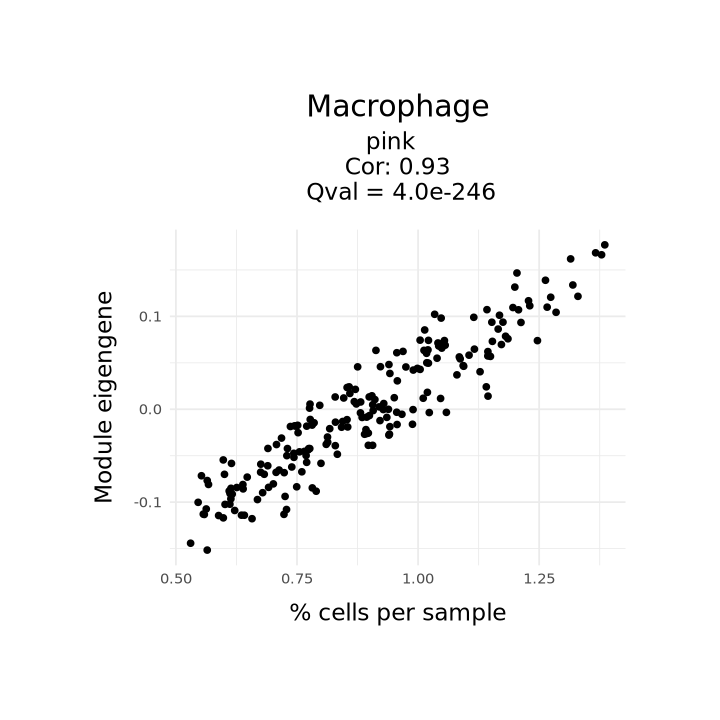

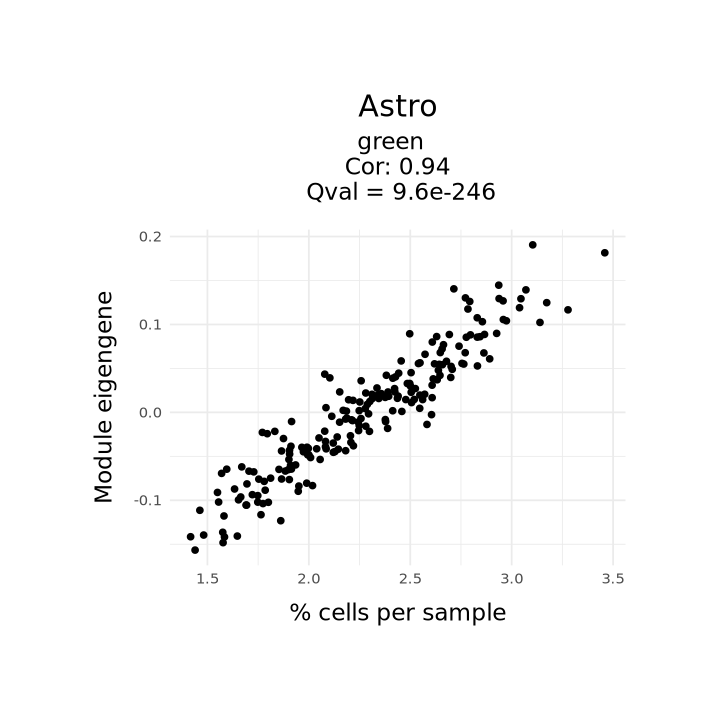

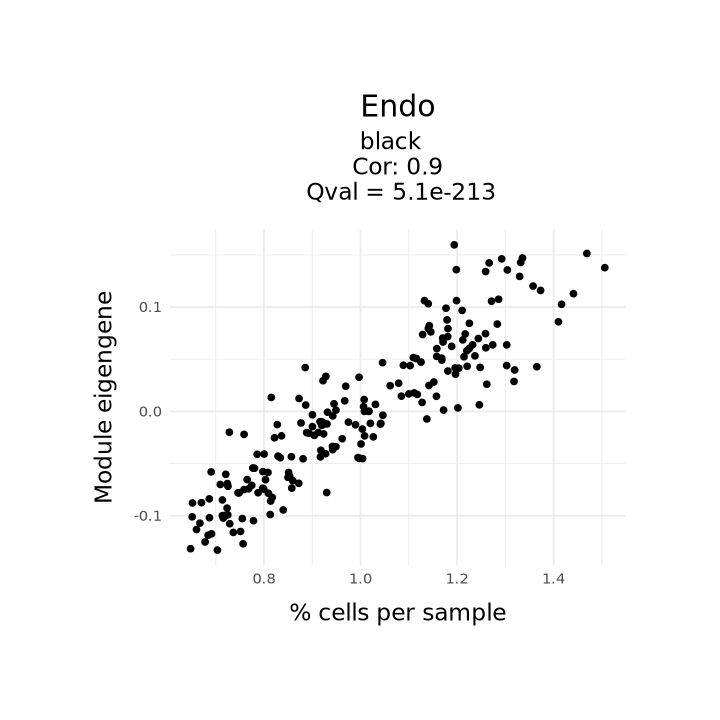

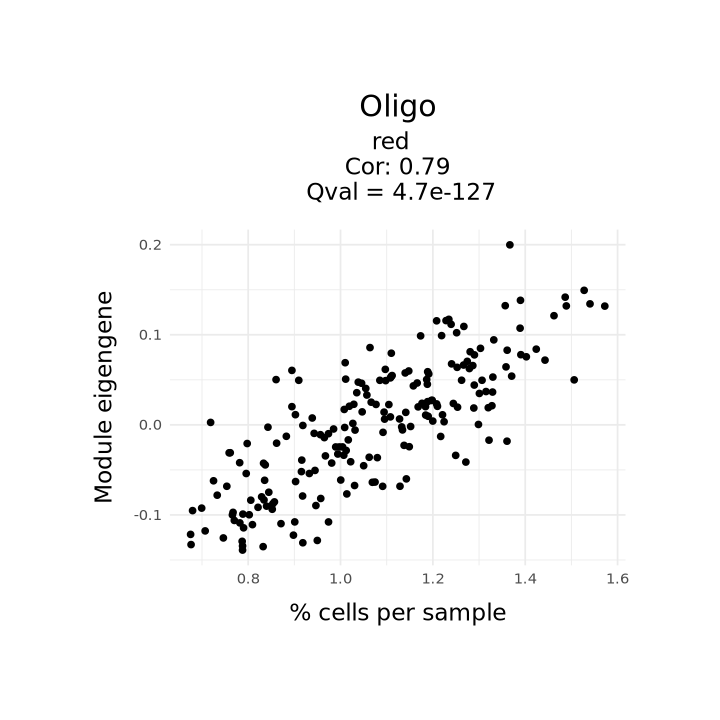

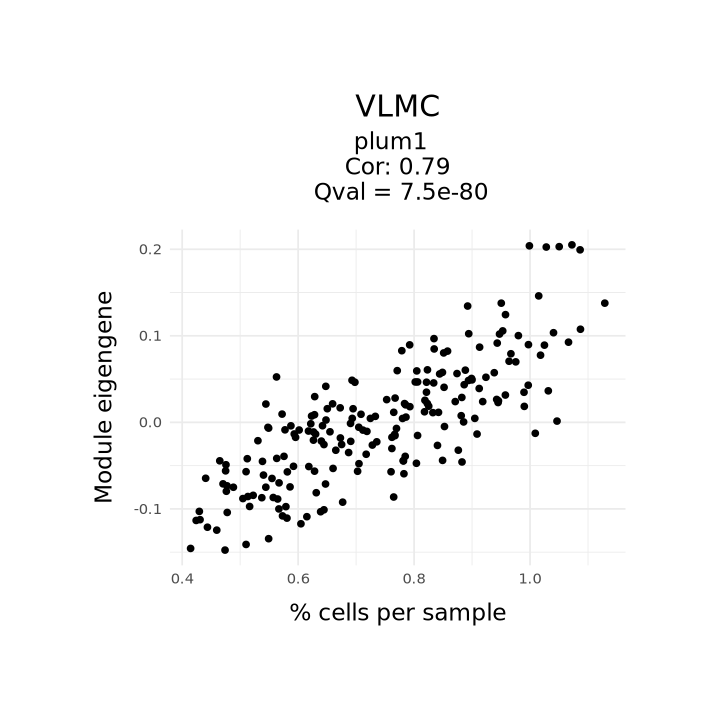

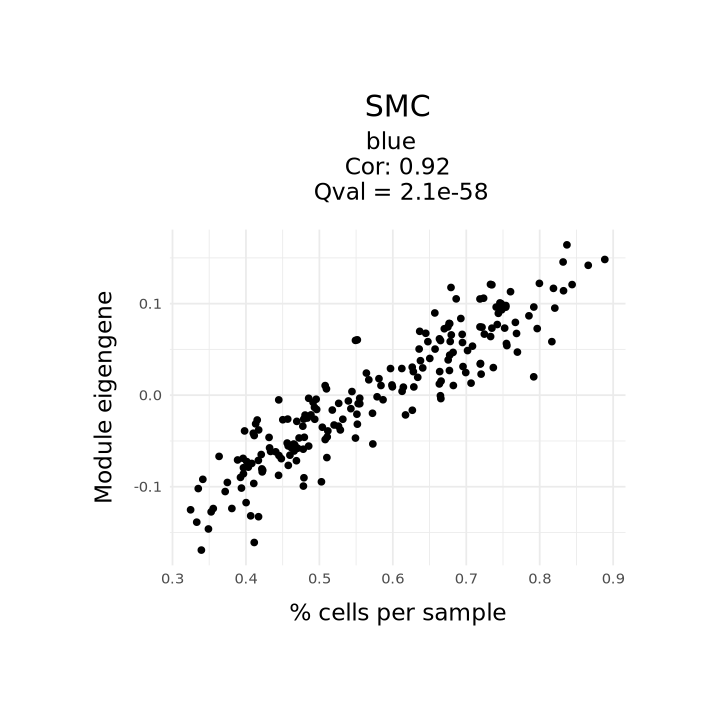

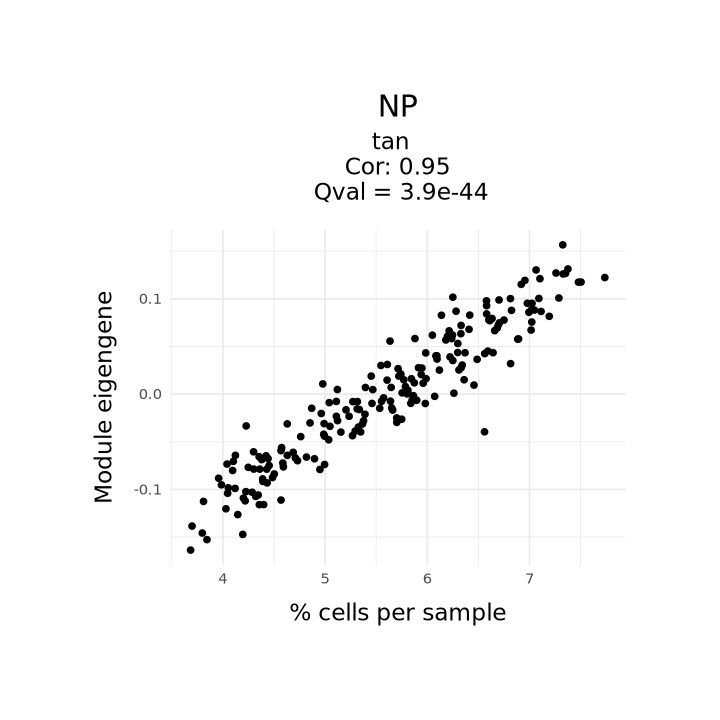

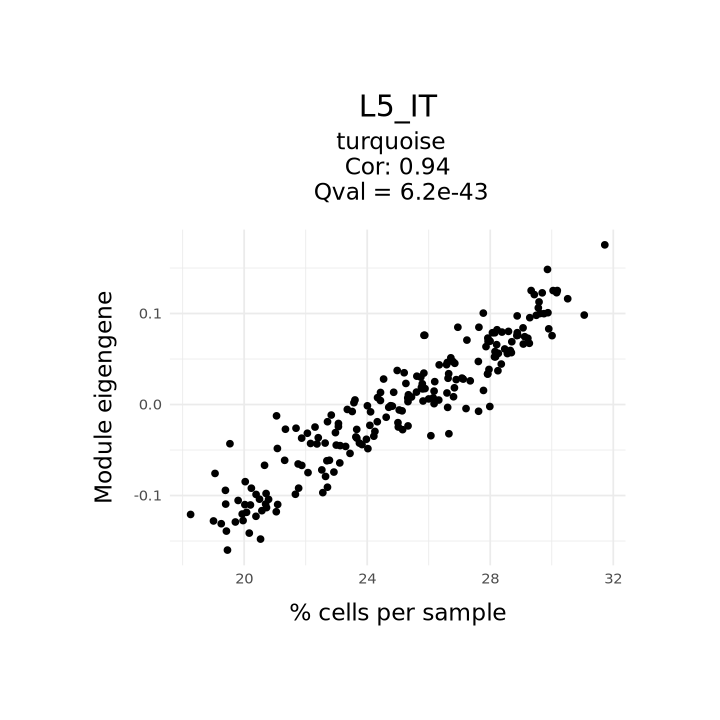

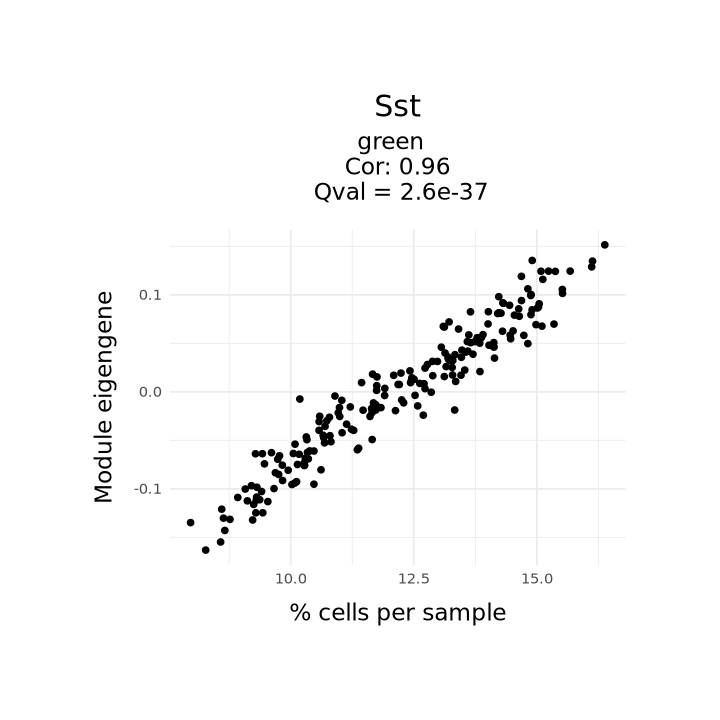

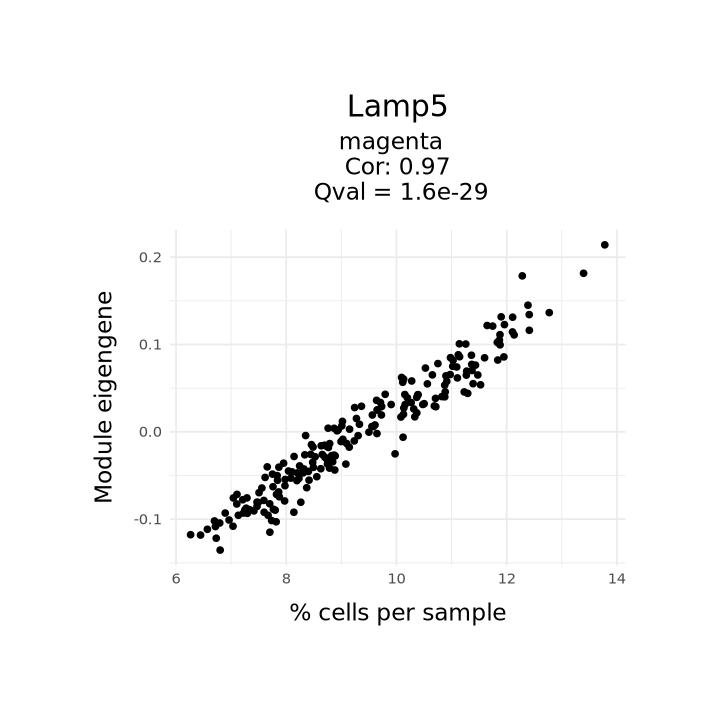

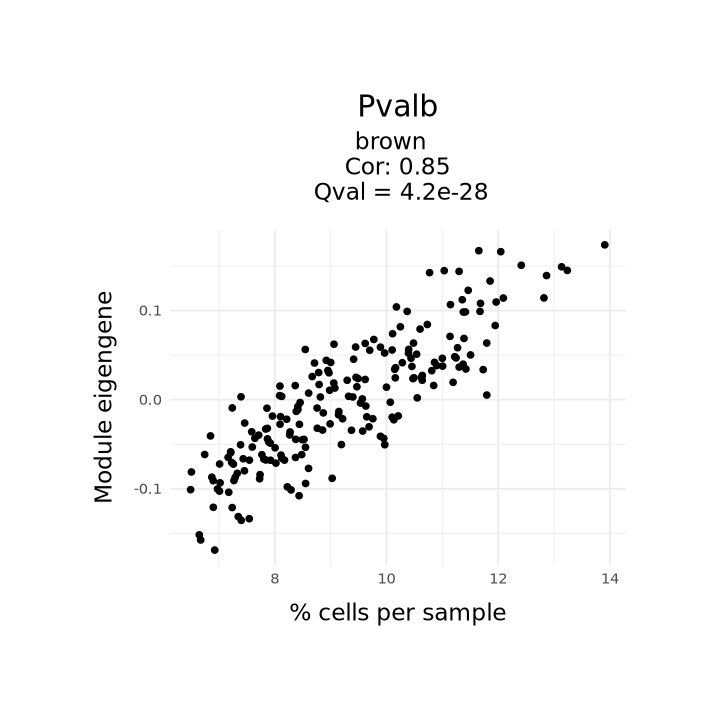

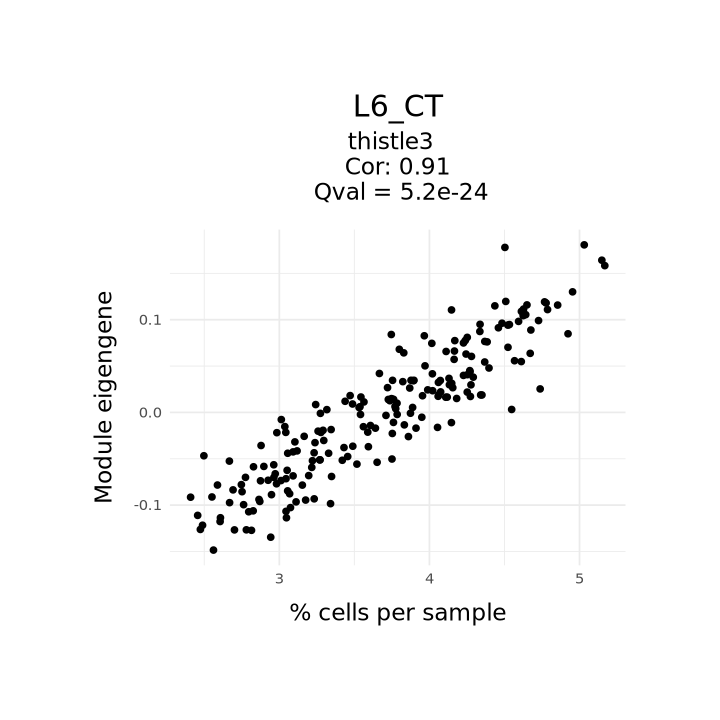

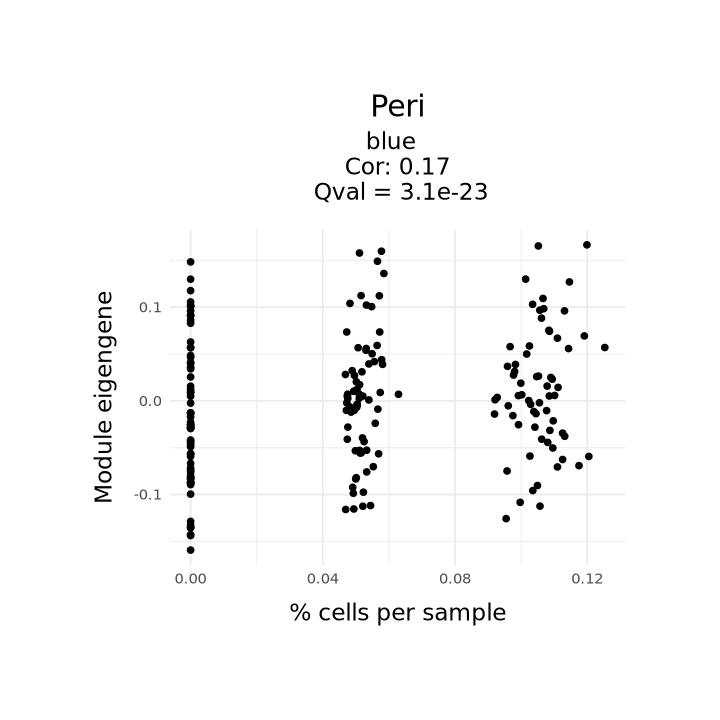

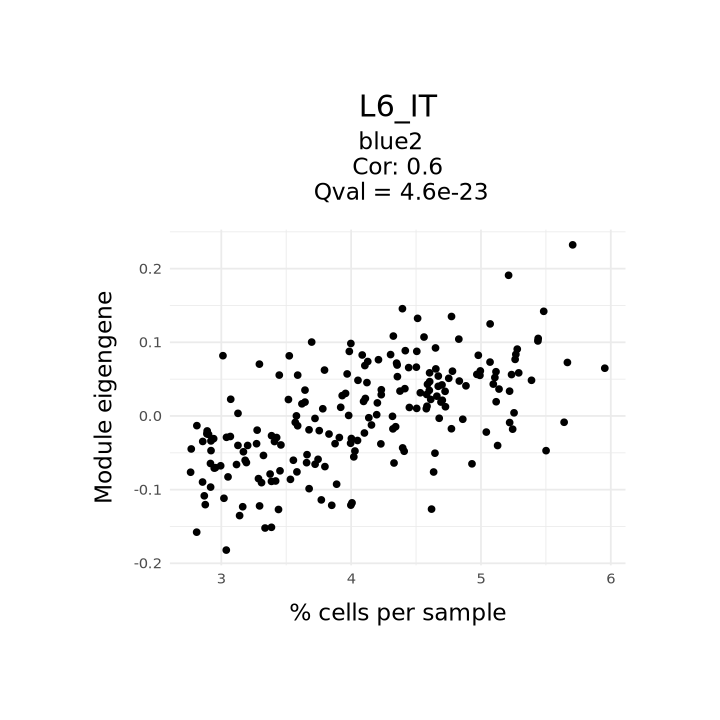

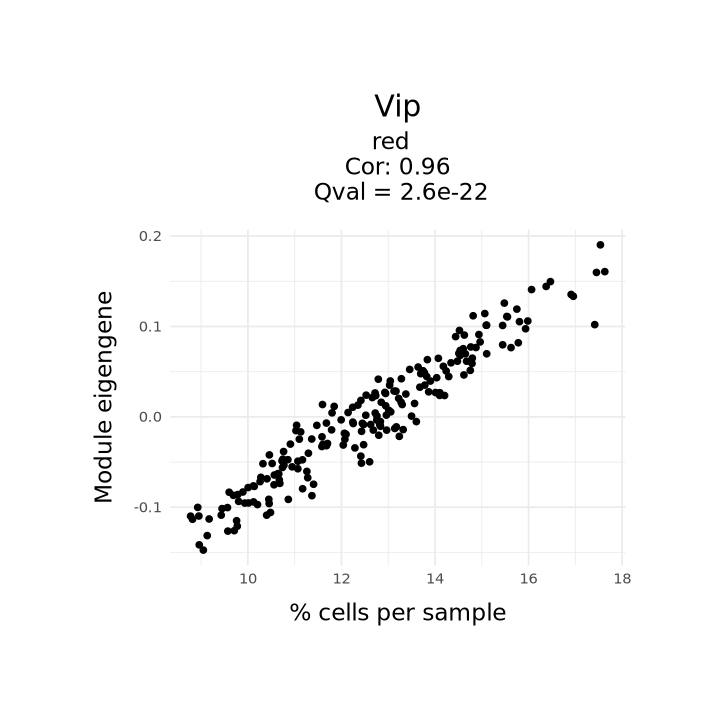

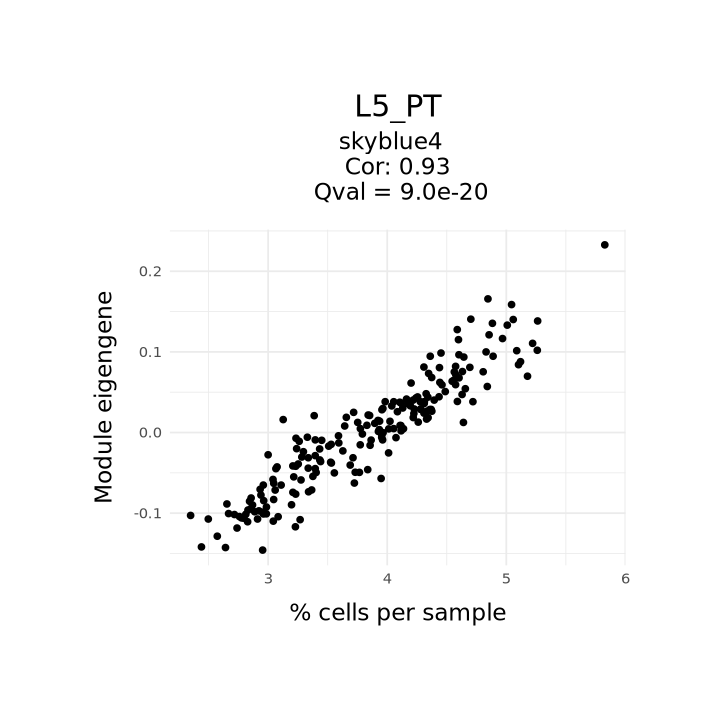

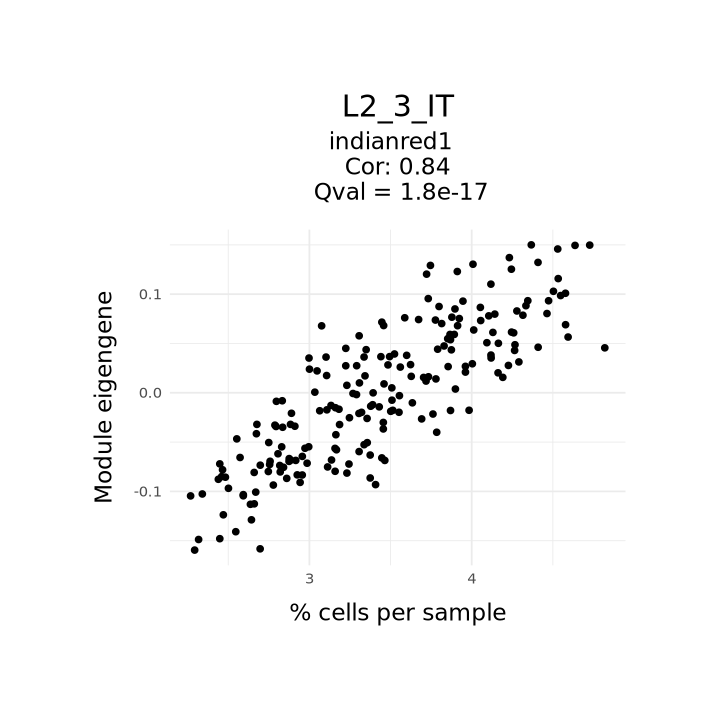

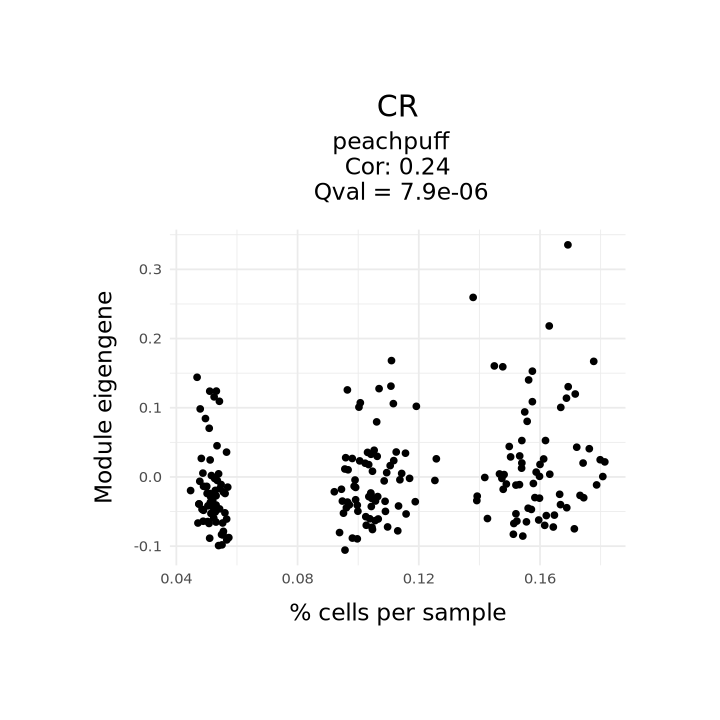

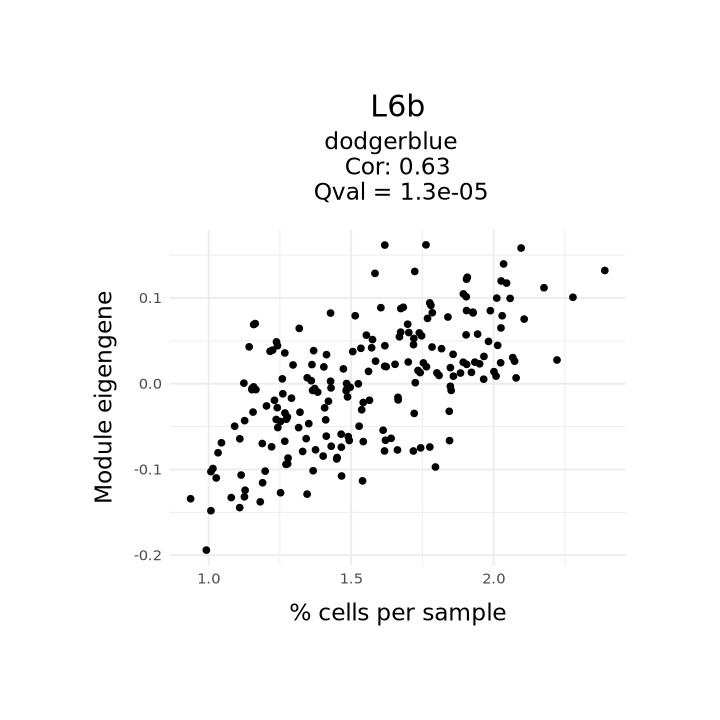

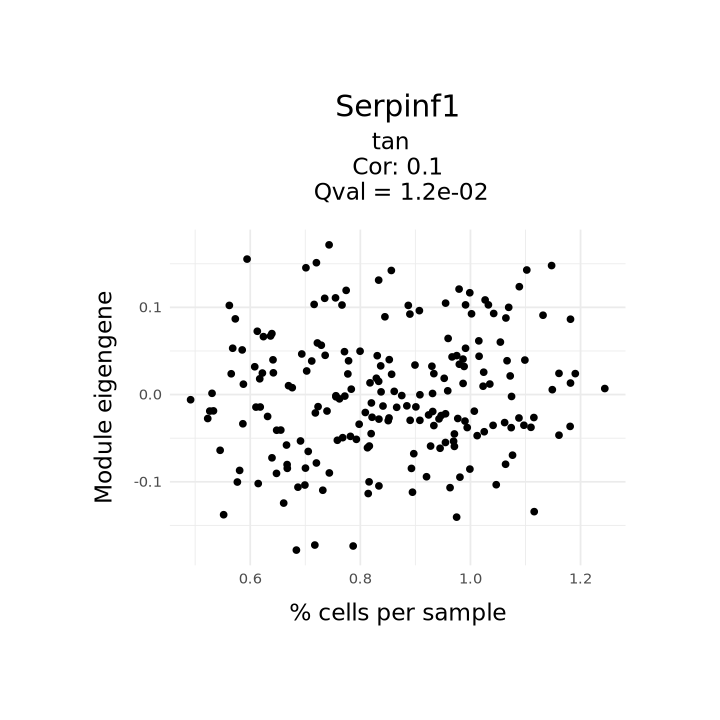

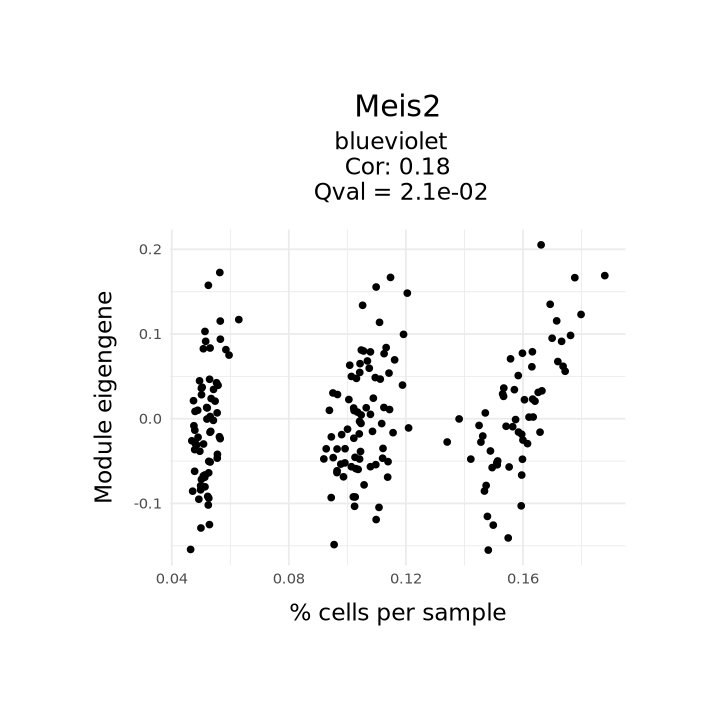

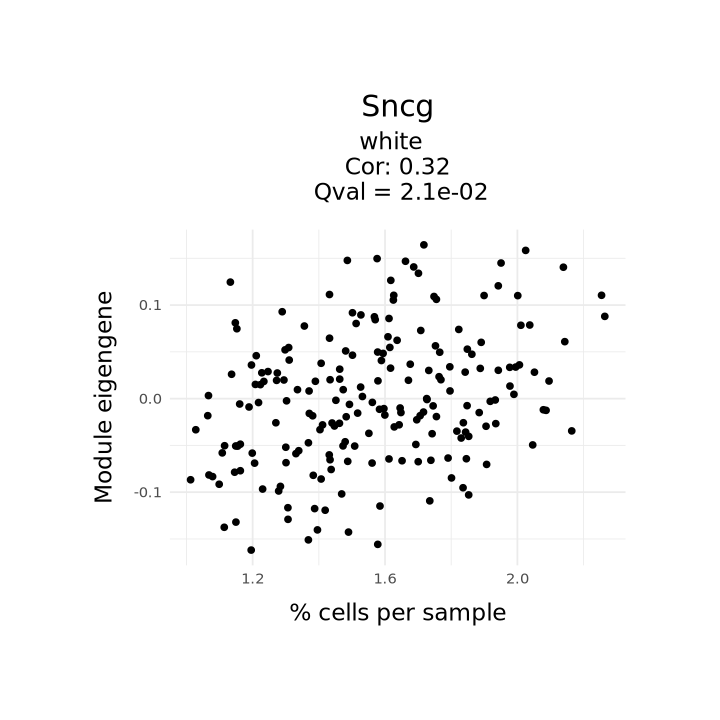

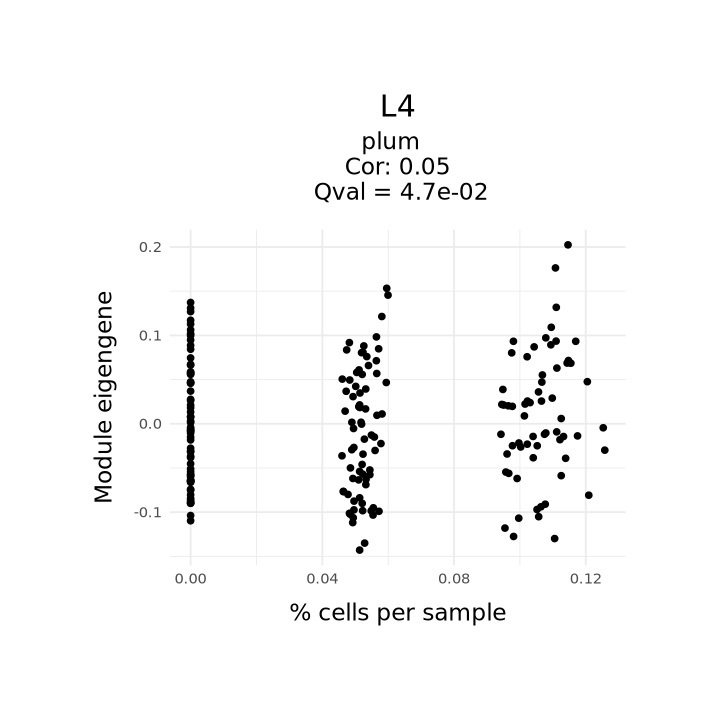

In [33]:
plot_ctype_abundance_vs_top_qval_ME(pseudobulk_legend, top_qval_mods_df)

# Round 2 (25 SD network; PosBC module definition)

In [ ]:
network_dir <- "tasic_2018_ALM_STAR_20pcntCells_25SD_200samples_log2_pseudobulk_Modules"

pseudobulk_legend <- read.csv("data/SyntheticDatasets/SyntheticDataset1_20pcntCells_25SD_200samples_legend_03-56-13.csv")
pseudobulk_legend$Cell.type <- gsub("/", "_", pseudobulk_legend$Cell.type, fixed=TRUE)
pseudobulk_legend$Cell.type <- gsub(" ", "_", pseudobulk_legend$Cell.type)

top_qval_mods_df <- read.csv("data/tasic_2018_ALM_STAR_donor_cell_type_pseudobulk_pairwise_DE_genes_dream_20pcntCells_25SD_200samples_log2_pseudobulk_PosBC_top_Qval_modules.csv")

In [25]:
ctype_genes_list <- pairwise_ctype_genes

top_corr_mods_25SD_PosBC_df <- get_top_corr_mods(network_dir, pseudobulk_legend, top_qval_mods_df, ctype_genes_list, mod_def)
top_corr_mods_25SD_PosBC_df %>% arrange(Old_cor)

,Cell_type,Pseudobulk_SD,Cor,Old_cor,Pval,Old_pval,Module_genes,Old_module_genes,DE_genes,Module,Old_module,Network,Old_network,ME_path,Old_ME_path,kME_path,Old_kME_path
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
cadetblue4,L5_IT,24.62,0.8540066,0.7025569,6.199604e-40,4.417915e-57,"Gfra2, Dkkl1, Cnih3, Opn3, Gtdc1, Tnnc1, Met, Ncam2, Ocm, Sccpdh, BC006965, Wnt9a, Ppef1, Scn7a, Lamc2","Nrn1, Hpca, Lmo4, Fars2, Stx1a, Car10, Kcnk4, Epha4, Krt12, Camk4, Medag, Ak4, Glt8d2, 4921539H07Rik, Lrrc4c","Pacsin1, Tnnc1, Dkkl1, Glt8d2, Gfra2, Egr4, Agbl4, C2cd4b, Opn3, Wfdc18, F2rl2, Lrrc4c, Galnt17, 4921539H07Rik, Lemd1",cadetblue4,bisque4,Bicor-None_signum0.341_minSize5_merge_ME_0.9_20151,Bicor-None_signum0.341_minSize8_merge_ME_0.9_20151,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_20pcntCells_25SD_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.341_minSize5_merge_ME_0.9_20151/Module_eigengenes_09-55-28.csv,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_20pcntCells_25SD_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.341_minSize8_merge_ME_0.9_20151/Module_eigengenes_11-09-24.csv,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_20pcntCells_25SD_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.341_minSize5_merge_ME_0.9_20151/kME_table_09-55-28.csv,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_20pcntCells_25SD_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.341_minSize8_merge_ME_0.9_20151/kME_table_11-09-24.csv
magenta2,Vip,24.17,0.7863361,0.7863361,1.853637e-64,3.168548e-68,"Vip, Igf1, Asic4, Ap1s2, Vstm2l, Adra1b, Prox1os, Prox1, Crh, Fxyd6, Gm17750, Gm37264, Tac2, Asic1, Grpr","Vip, Igf1, Asic4, Ap1s2, Vstm2l, Adra1b, Prox1os, Synpr, Prox1, Crh, Fxyd6, Gm17750, Gm37264, Tac2, Asic1","Vstm2l, Synpr, Prox1, Crh, Penk, Tacc2, Prox1os, Vip, Asic1, Pthlh, Asic4, Bean1, Ankrd55, Tac2, Npy2r",magenta2,lightblue3,Bicor-None_signum0.305_minSize10_merge_ME_0.9_20151,Bicor-None_signum0.341_minSize10_merge_ME_0.9_20151,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_20pcntCells_25SD_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.305_minSize10_merge_ME_0.9_20151/Module_eigengenes_12-39-51.csv,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_20pcntCells_25SD_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.341_minSize10_merge_ME_0.9_20151/Module_eigengenes_11-29-24.csv,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_20pcntCells_25SD_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.305_minSize10_merge_ME_0.9_20151/kME_table_12-39-51.csv,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_20pcntCells_25SD_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.341_minSize10_merge_ME_0.9_20151/kME_table_11-29-24.csv
mediumpurple,L6_IT,22.61,0.8653515,0.8577590,2.681837e-30,1.354173e-34,"Gm2694, Cd7, Slc7a4, Glipr1, Cbln1, Rspo2, Sstr2, 5330416C01Rik, Kash5, Gm49678, Blnk, Oprk1, Spink8, Gpr52, Pgam2","Gm2694, Cd7, Glipr1, Slc7a4, Cbln1, Rspo2, Sstr2, 5330416C01Rik, Kash5, Gm49678, Blnk, Gkn1, 2810404M03Rik, Oprk1, Spink8","Gabra3, Rasl10a, Blnk, Slc7a4, Glipr1, Dmkn, Cd7, Pgam2, Gm34567, Gm49678, Ccnb1, Htra4, Gpr52, Spink8, Gpr68",mediumpurple,lightpink,Bicor-None_signum0.481_minSize4_merge_ME_0.9_20151,Bicor-None_signum0.341_minSize10_merge_ME_0.9_20151,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_20pcntCells_25SD_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.481_minSize4_merge_ME_0.9_20151/Module_eigengenes_07-21-34.csv,/

In [ ]:
# plot_ctype_abundance_vs_top_qval_ME(pseudobulk_legend, top_corr_mods_25SD_PosBC_df)

In [ ]:
# plot_ctype_abundance_vs_top_corr_ME(pseudobulk_legend, top_corr_mods_25SD_PosBC_df)

# Round 3 (35 SD network; PosBC module definition)

In [12]:
network_dir <- "tasic_2018_ALM_STAR_20pcntCells_35SD_200samples_log2_pseudobulk_Modules"

pseudobulk_legend <- read.csv("data/SyntheticDatasets/SyntheticDataset1_20pcntCells_35SD_200samples_legend_12-54-23.csv")
pseudobulk_legend$Cell.type <- gsub("/", "_", pseudobulk_legend$Cell.type, fixed=TRUE)
pseudobulk_legend$Cell.type <- gsub(" ", "_", pseudobulk_legend$Cell.type)

top_qval_mods_df <- read.csv("data/tasic_2018_ALM_STAR_donor_cell_type_pseudobulk_pairwise_DE_genes_dream_20pcntCells_35SD_200samples_log2_pseudobulk_PosBC_top_Qval_modules.csv")

In [13]:
ctype_genes_list <- pairwise_ctype_genes

top_corr_mods_35SD_PosBC_df <- get_top_corr_mods(network_dir, pseudobulk_legend, top_qval_mods_df, ctype_genes_list, mod_def)
top_corr_mods_35SD_PosBC_df %>% arrange(Old_cor)

,Cell_type,Pseudobulk_SD,Cor,Old_cor,Pval,Old_pval,Module_genes,Old_module_genes,DE_genes,Module,Old_module,Network,Old_network,ME_path,Old_ME_path,kME_path,Old_kME_path
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
maroon,Sncg,29.97,0.9720790,0.8101564,3.858087e-27,3.927444e-60,"Krt73, Gm49227, Spx, Cadps2, Gldn, Slc10a4, Rwdd3, Sln, Slc17a8, Atp6v1g1, Kctd12, Stk32c, Col25a1, Crabp1, Htr7","Npas1, Htr3a, Celf6, Rgs12, Cnr1, Cxcl14, Egln3, Gm48283, Gng2, Gm43791, Rwdd3, Spx, Gm49227, Serpina12, Plppr1","Gng2, App, Nrxn3, Gm48283, Dlx6os1, Yjefn3, Celf6, Stk32c, Htr3a, Gm49227, Npas1, Bend4, Cnr1, Col25a1, Gm48261",maroon,lavenderblush3,Bicor-None_signum0.791_minSize3_merge_ME_0.9_20151,Bicor-None_signum0.52_minSize10_merge_ME_0.9_20151,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_20pcntCells_35SD_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.791_minSize3_merge_ME_0.9_20151/Module_eigengenes_04-46-06.csv,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_20pcntCells_35SD_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.52_minSize10_merge_ME_0.9_20151/Module_eigengenes_05-52-51.csv,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_20pcntCells_35SD_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.791_minSize3_merge_ME_0.9_20151/kME_table_04-46-06.csv,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_20pcntCells_35SD_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.52_minSize10_merge_ME_0.9_20151/kME_table_05-52-51.csv
lightsteelblue,Vip,40.63,0.8866713,0.8752998,1.165588e-49,4.483830e-88,"Vip, Ap1s2, Asic4, Prox1os, Igf1, Grpr, Crh, Igsf3, Asic1, Prox1, Tac2, Adra1b, Cit, Vstm2l, Gm37264","Vip, Ap1s2, Igf1, Asic4, Prox1os, Grpr, Crh, Tac2, Asic1, Adra1b, Prox1, Igsf3, Cit, Vstm2l, Synpr","Vstm2l, Synpr, Prox1, Crh, Penk, Tacc2, Prox1os, Vip, Asic1, Pthlh, Asic4, Bean1, Ankrd55, Tac2, Npy2r",lightsteelblue,floralwhite,Bicor-None_signum0.34_minSize10_merge_ME_0.9_20151,Bicor-None_signum0.52_minSize10_merge_ME_0.9_20151,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_20pcntCells_35SD_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.34_minSize10_merge_ME_0.9_20151/Module_eigengenes_09-45-53.csv,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_20pcntCells_35SD_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.52_minSize10_merge_ME_0.9_20151/Module_eigengenes_05-52-51.csv,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_20pcntCells_35SD_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.34_minSize10_merge_ME_0.9_20151/kME_table_09-45-53.csv,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_20pcntCells_35SD_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.52_minSize10_merge_ME_0.9_20151/kME_table_05-52-51.csv
lavenderblush2,L5_IT,31.83,0.8967711,0.8777097,4.521008e-64,3.289199e-67,"Dkkl1, Gfra2, C2cd4b, Tnnc1, Fhod3, Sac3d1, Cnih3, Mef2c, Gtdc1, Adra1d, 4921539H07Rik, Tenm2, Ap3m2, Agbl4, Arhgap15","Krt12, Dkkl1, A830036E02Rik, Gfra2, Sac3d1, Tnnc1, Cnih3, Mef2c, C2cd4b, Gtdc1, 4921539H07Rik, Adra1d, Tenm2, Efna5, Ap3m2","Pacsin1, Tnnc1, Dkkl1, Glt8d2, Gfra2, Egr4, Agbl4, C2cd4b, Opn3, Wfdc18, F2rl2, Lrrc4c, Galnt17, 4921539H07Rik, Lemd1",lavenderblush2,plum4,Bicor-None_signum0.52_minSize10_merge_ME_0.9_20151,Bicor-None_signum0.378_minSize10_merge_ME_0.9_20151,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_20pcntCells_35SD_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.52_minSize10_merge_ME_0.9_20151/Module_eigengenes_0

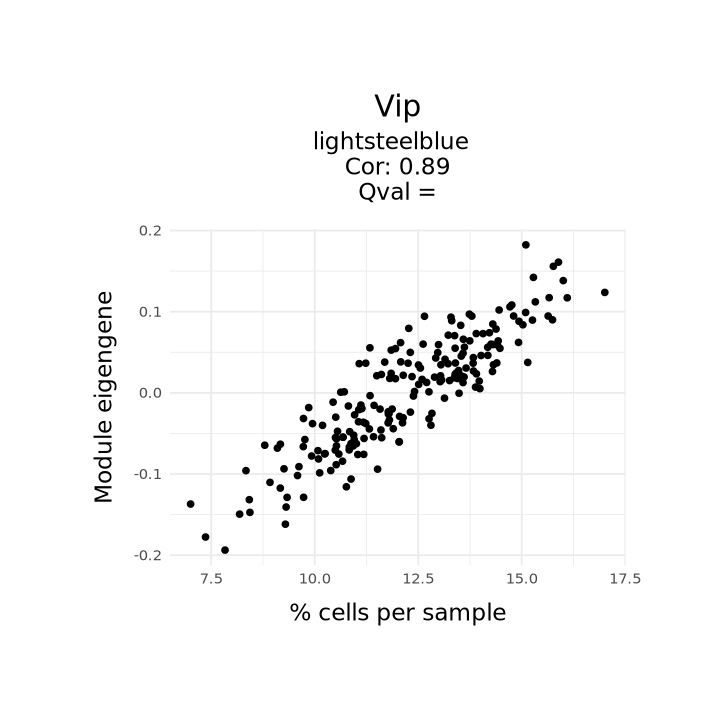

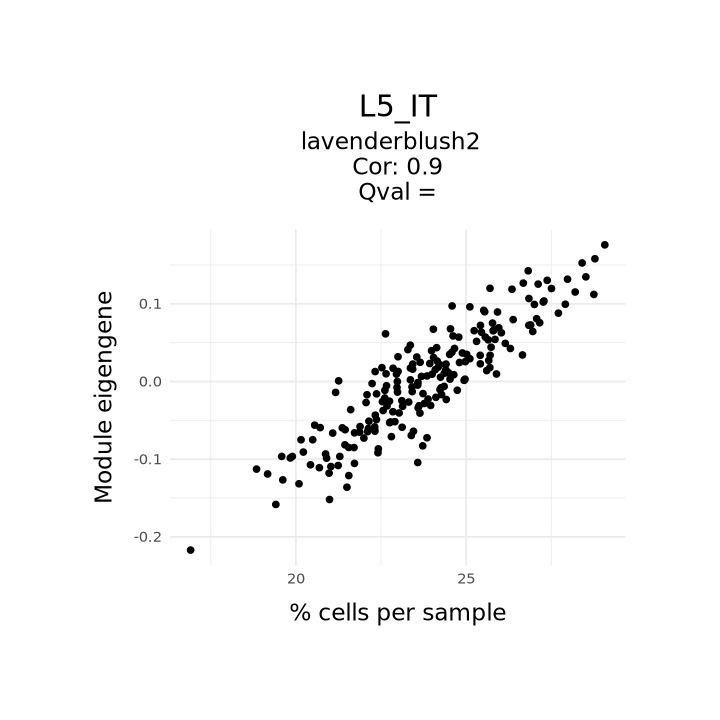

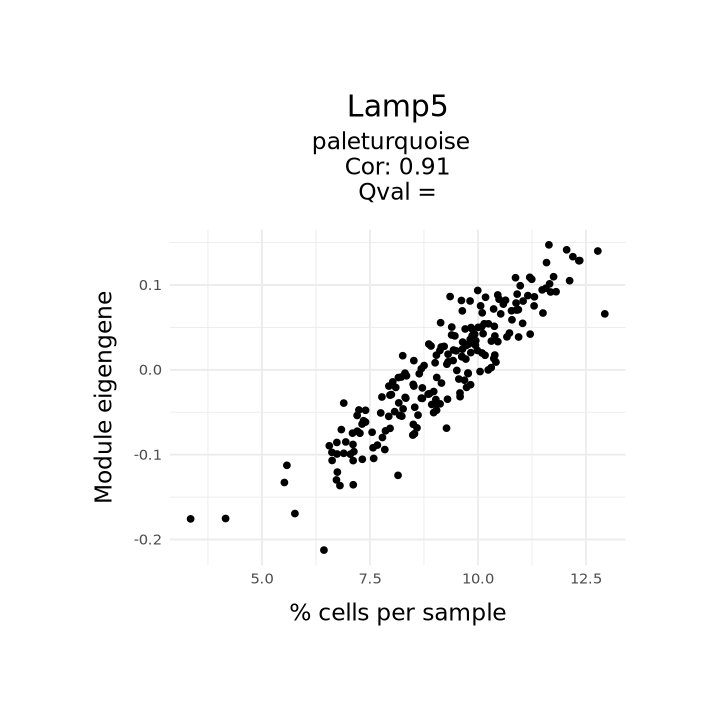

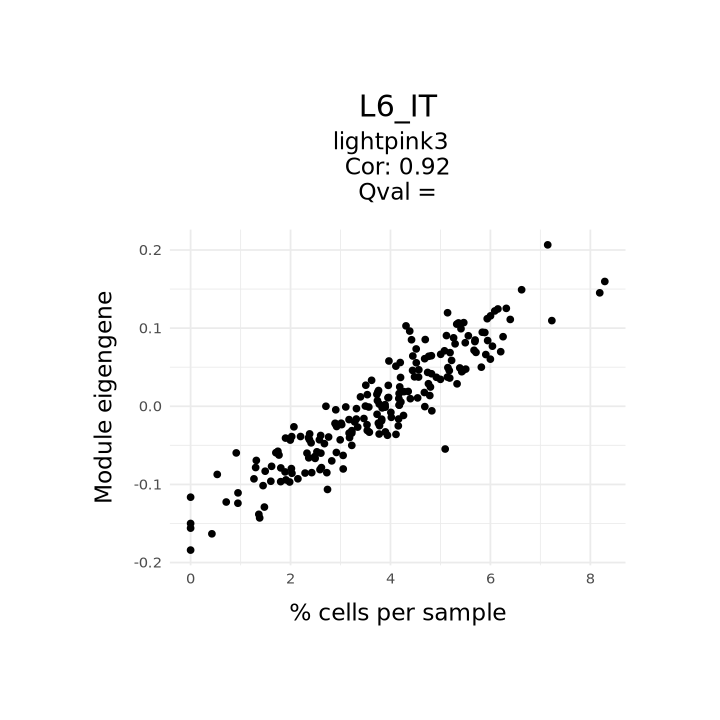

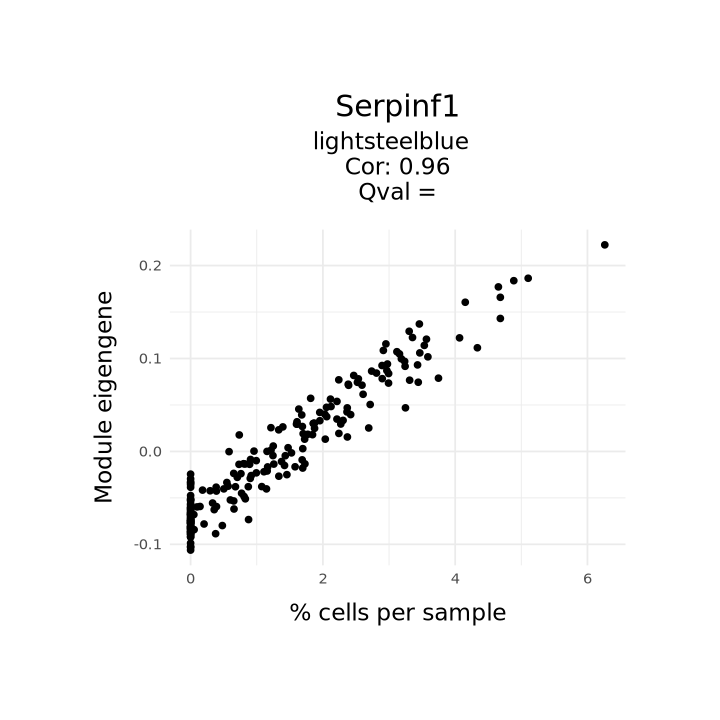

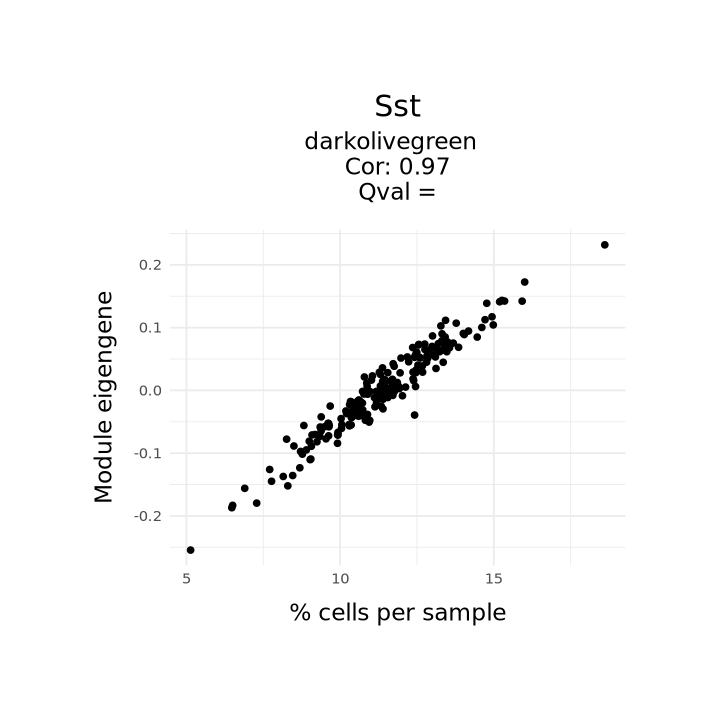

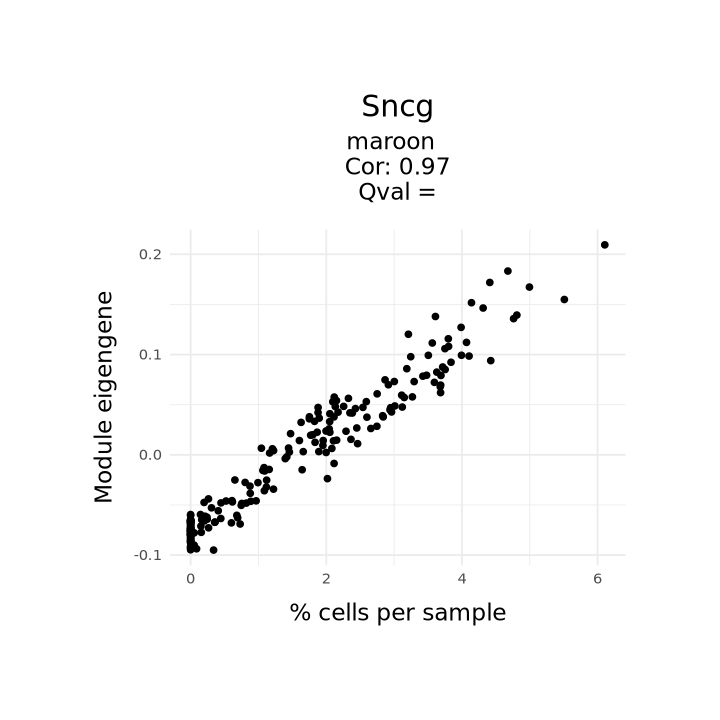

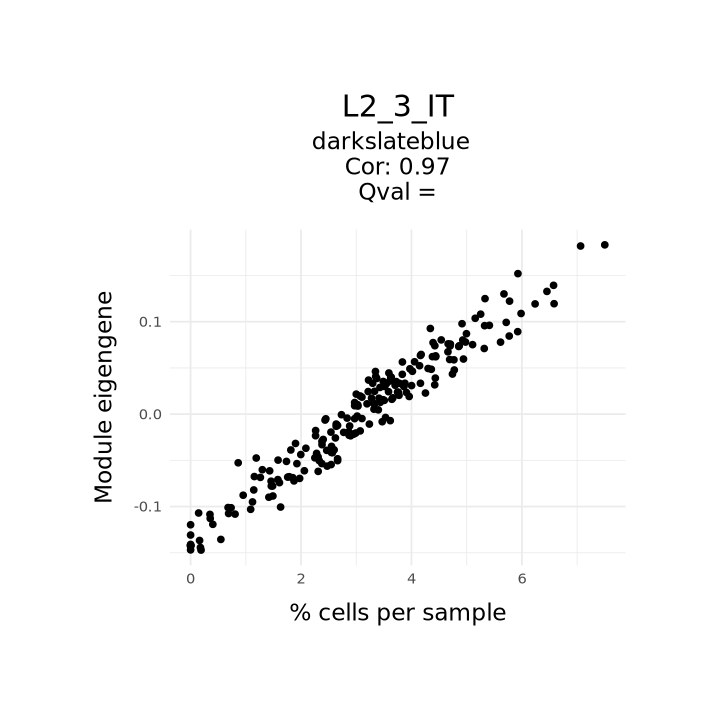

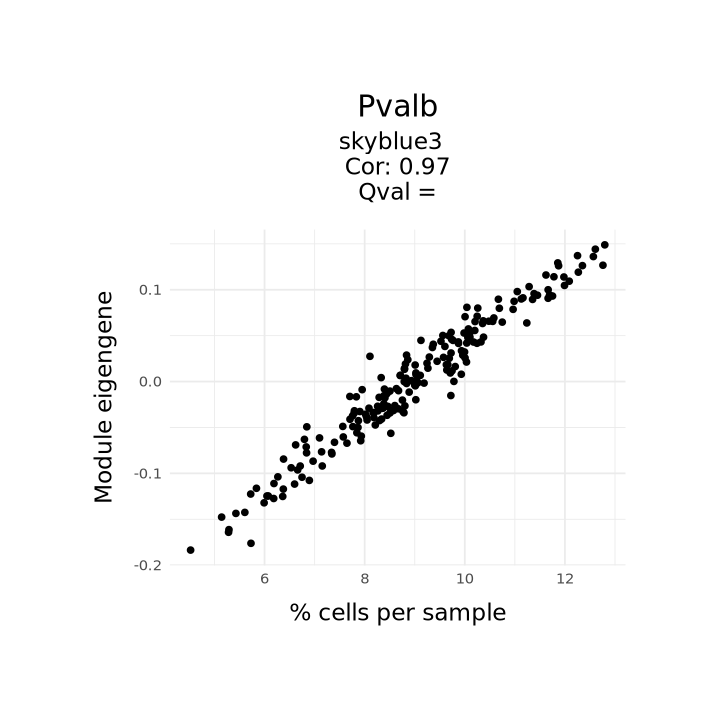

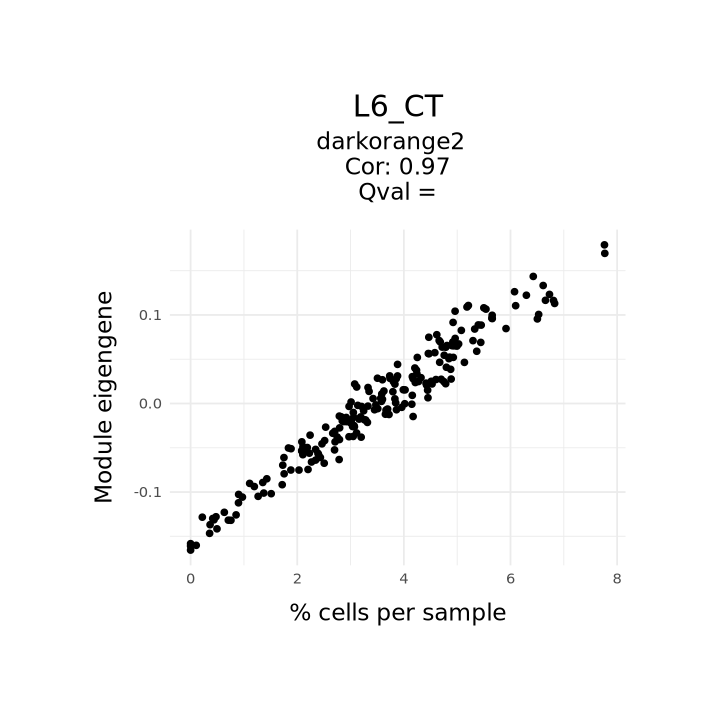

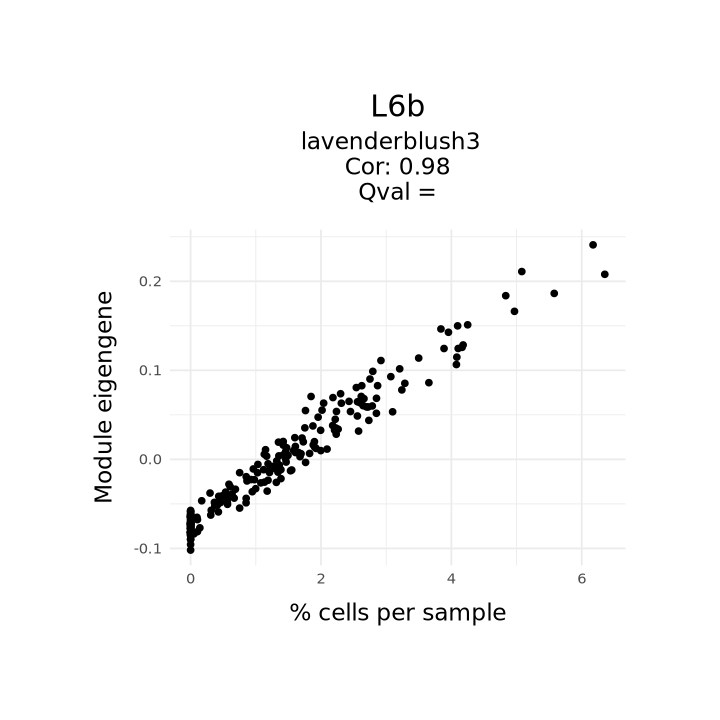

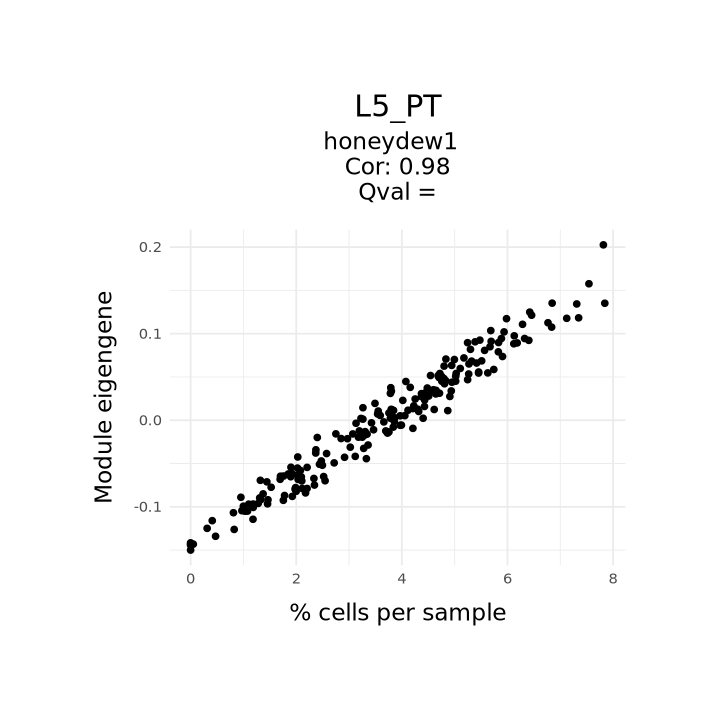

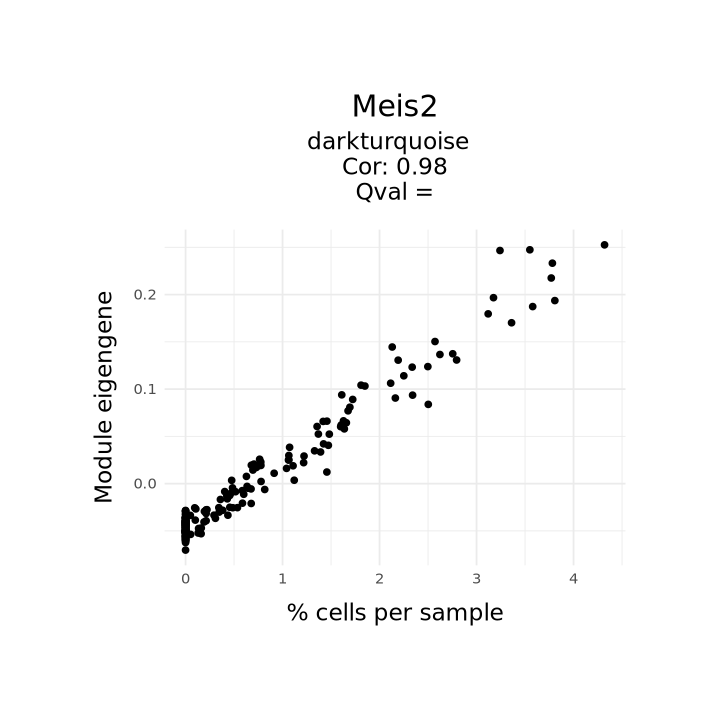

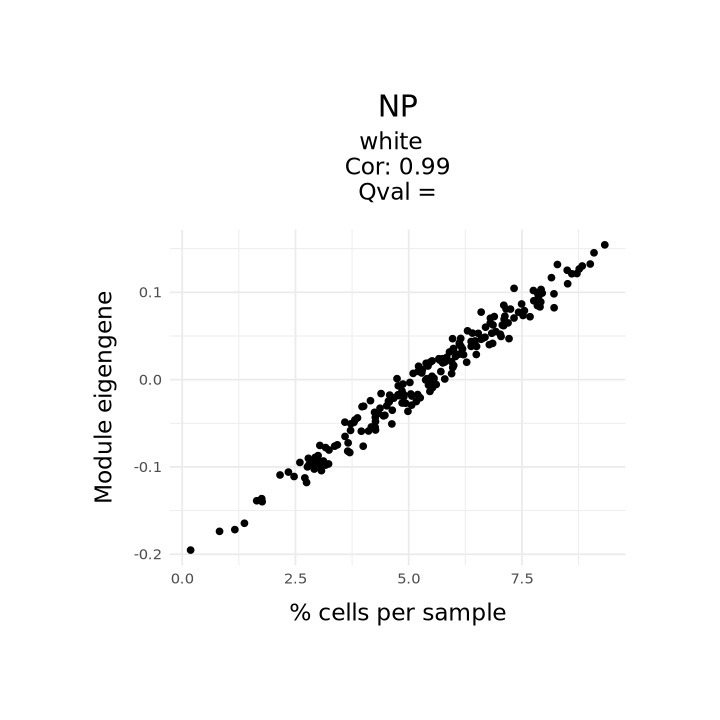

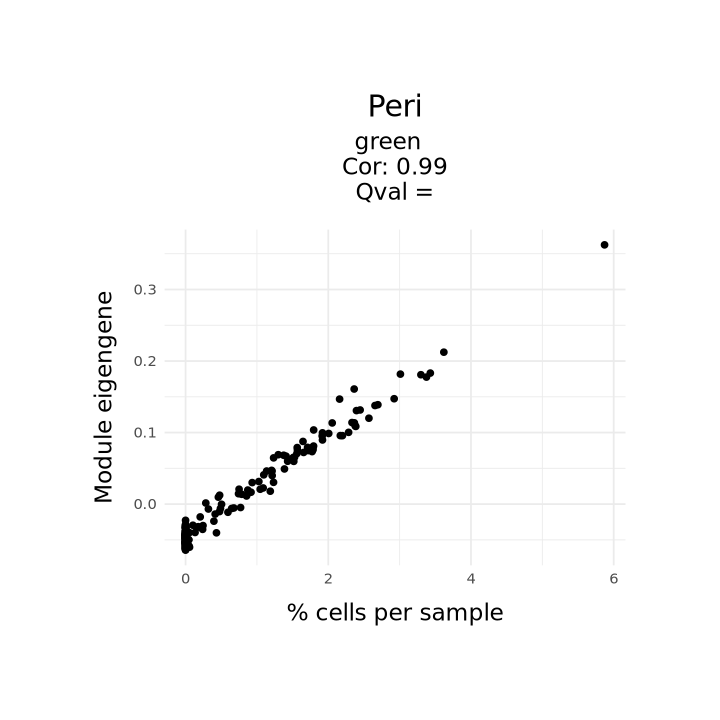

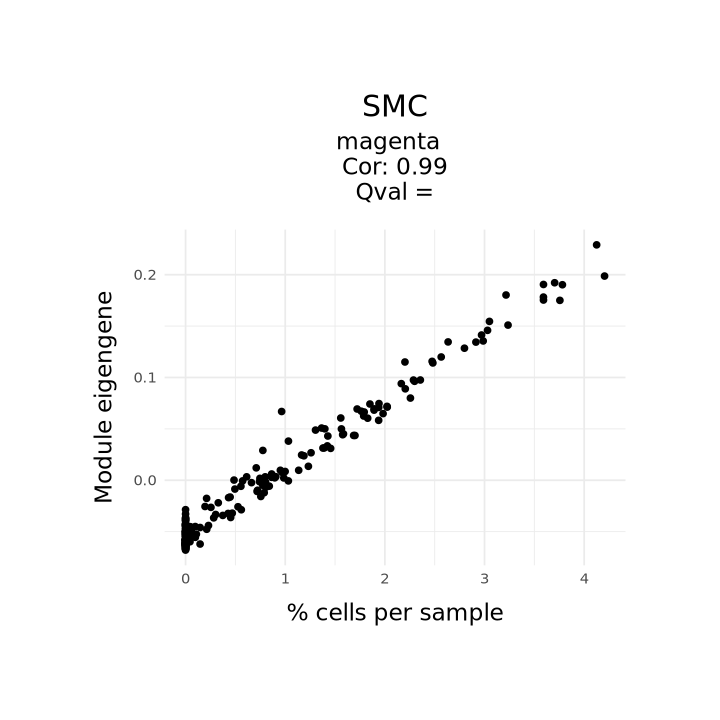

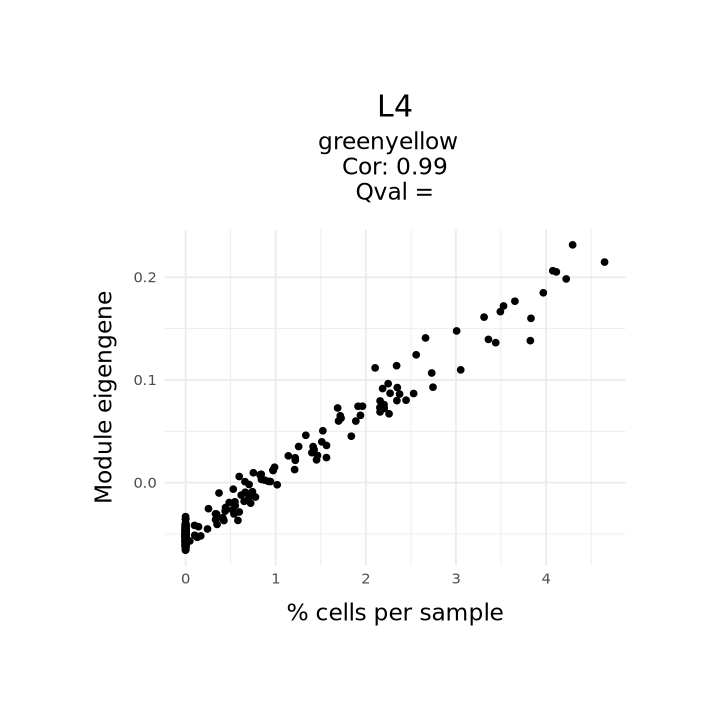

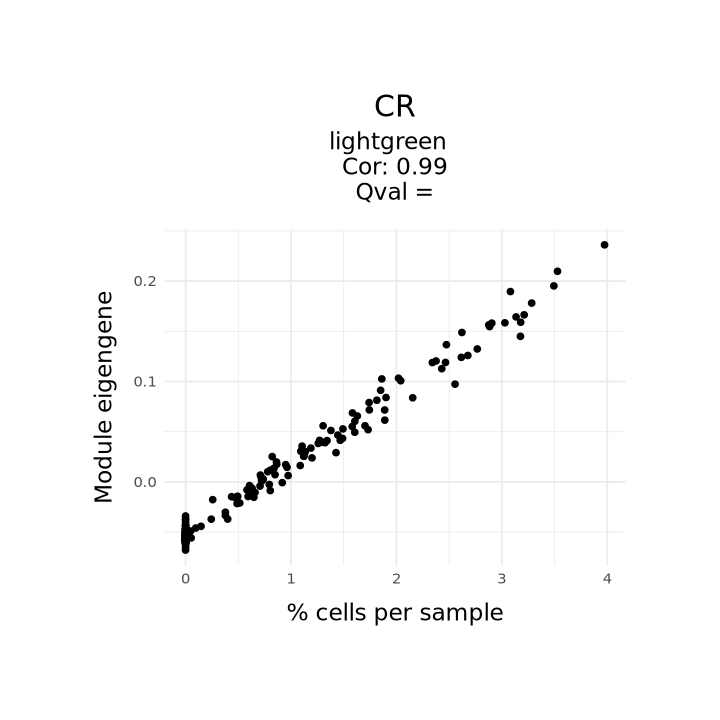

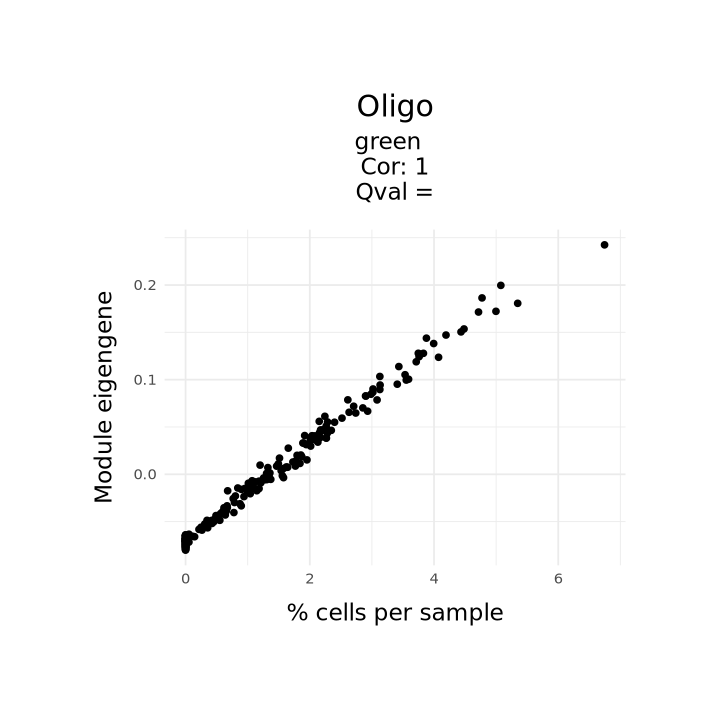

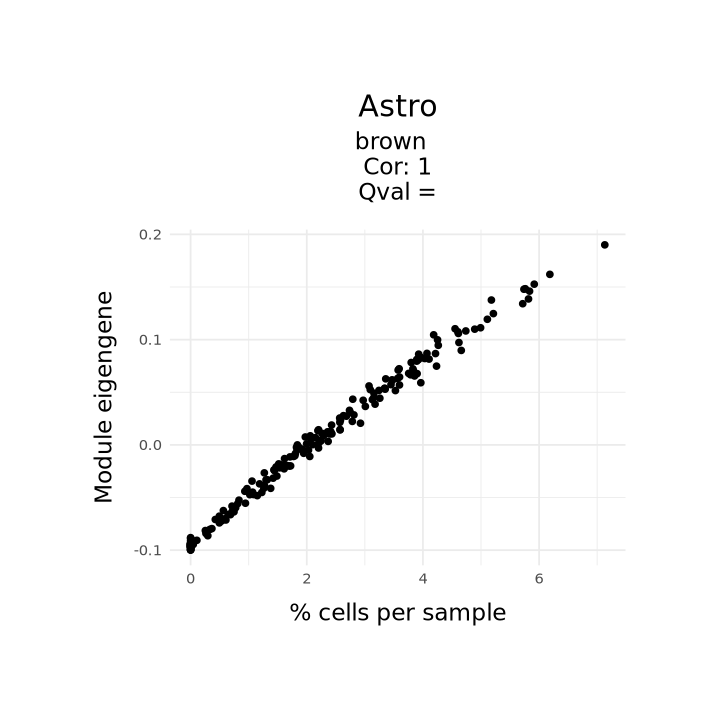

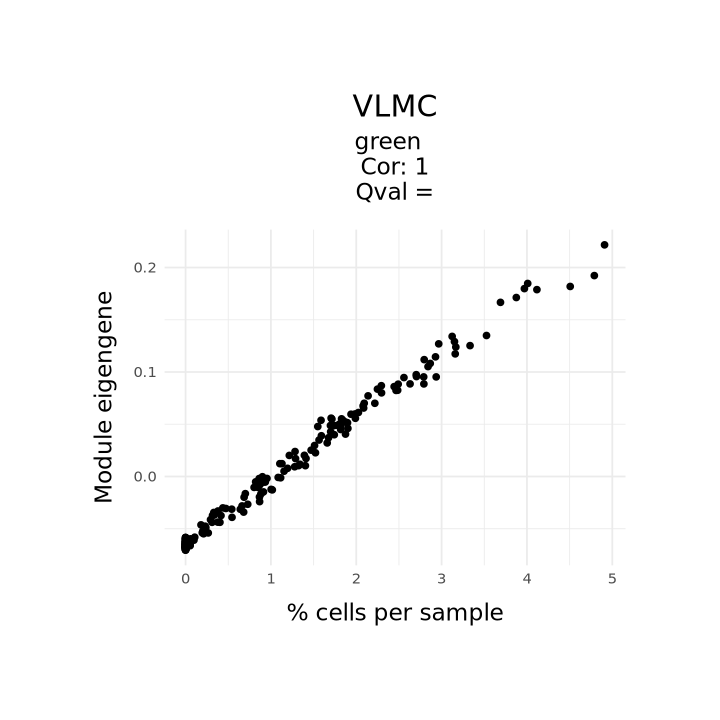

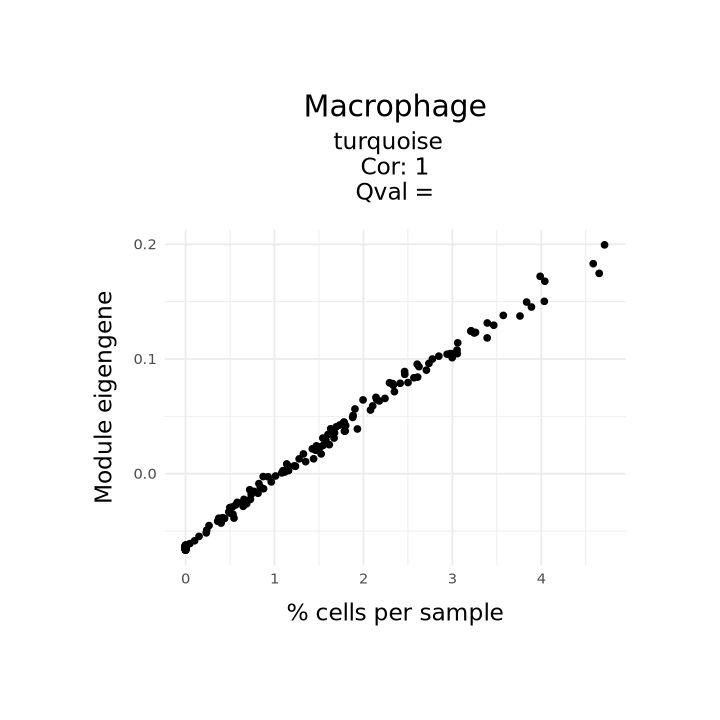

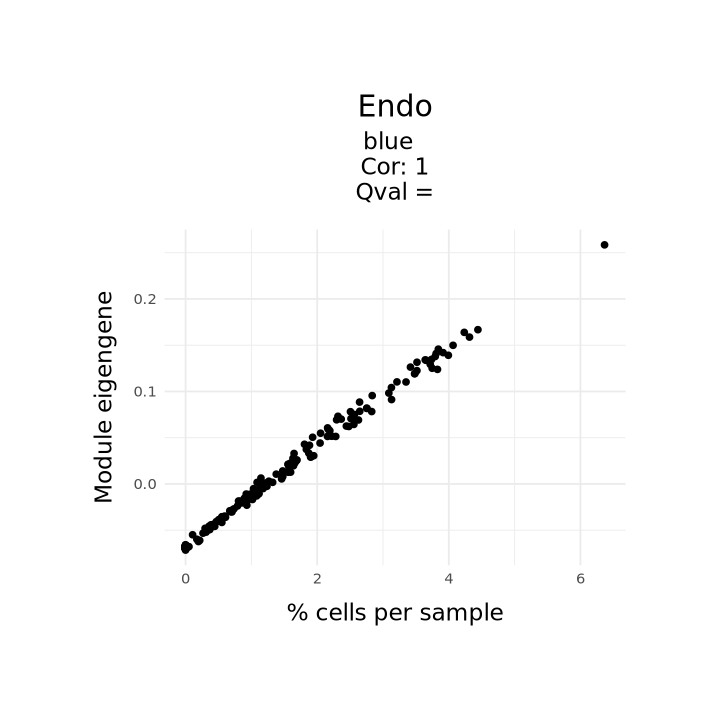

In [12]:
plot_ctype_abundance_vs_top_qval_ME(pseudobulk_legend, top_corr_mods_35SD_PosBC_df)

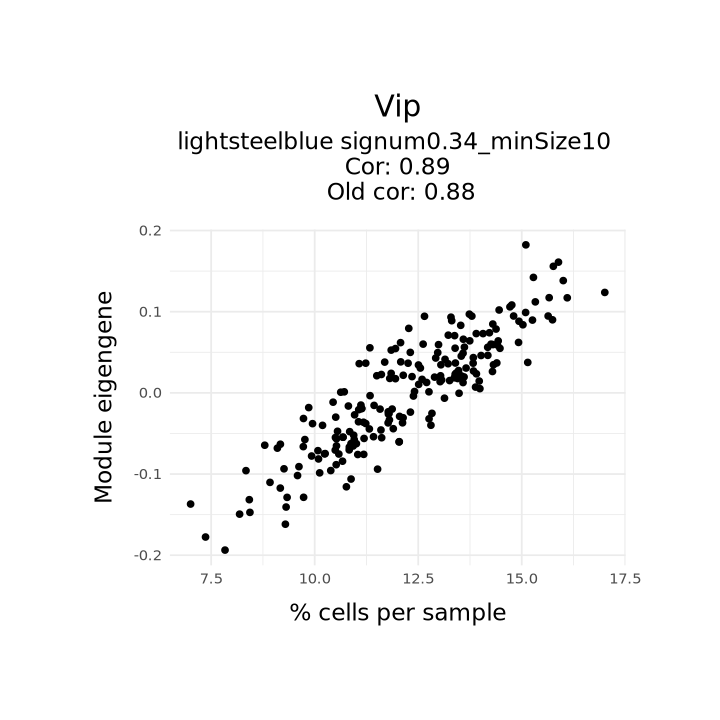

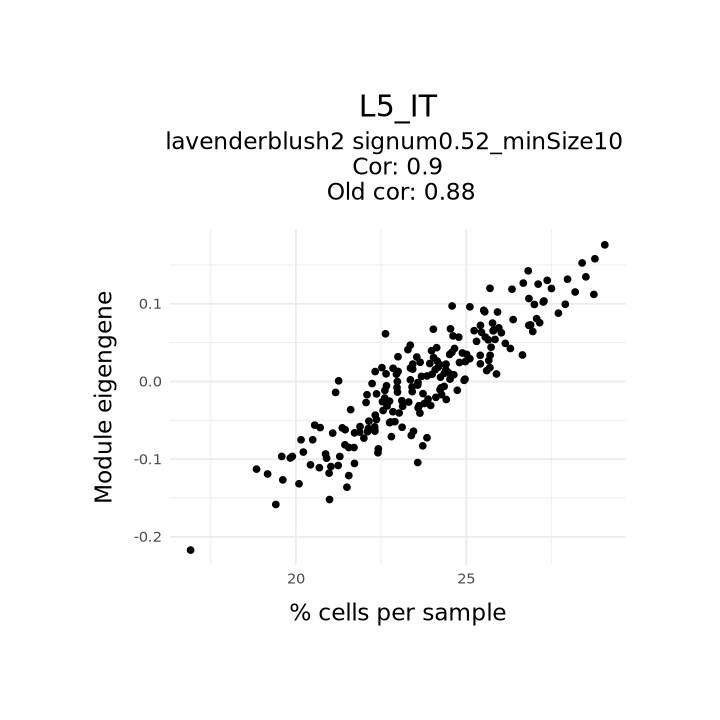

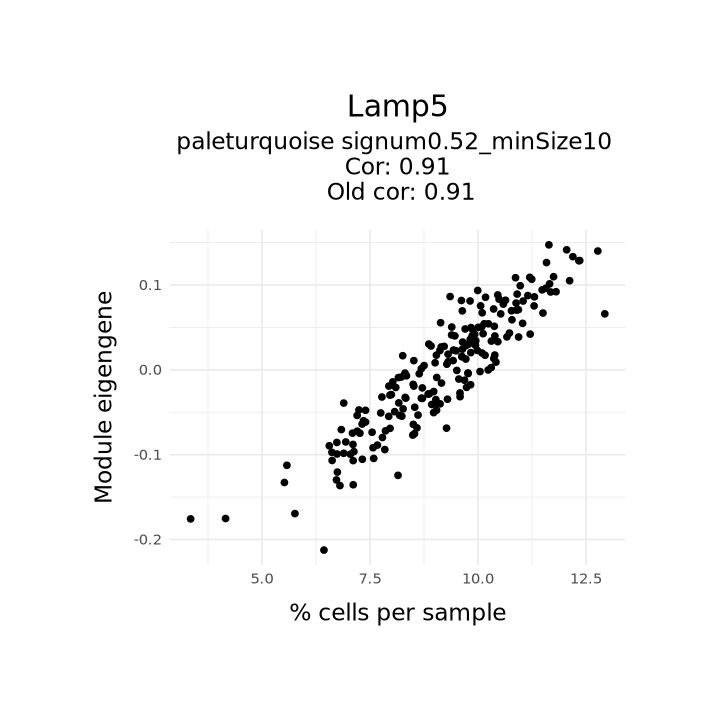

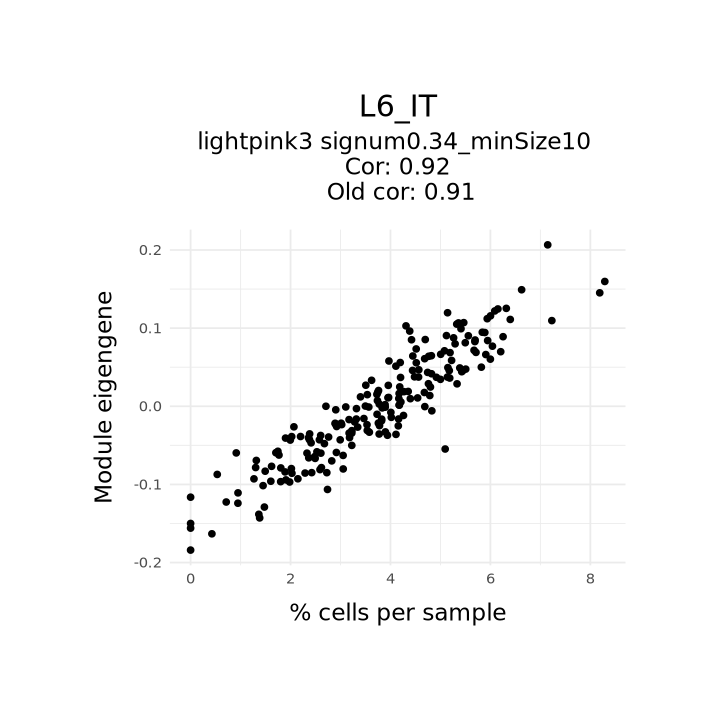

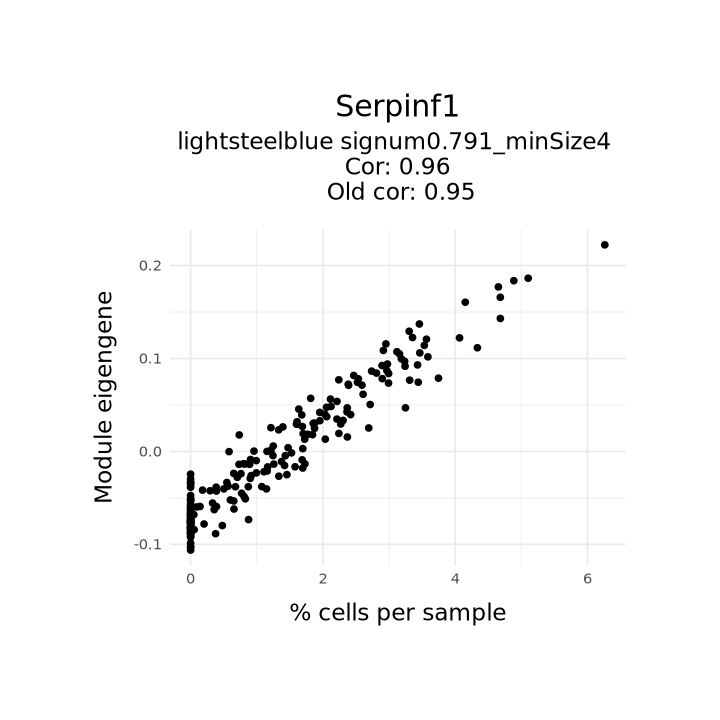

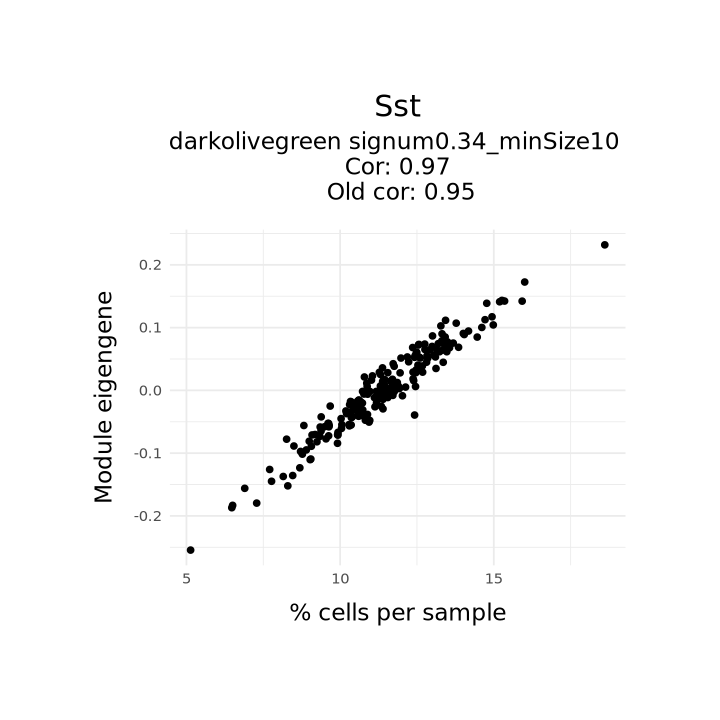

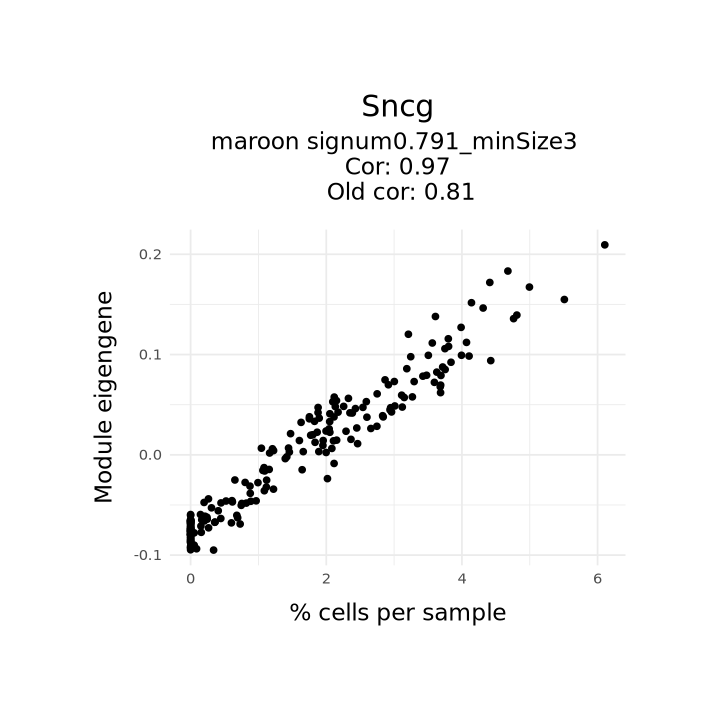

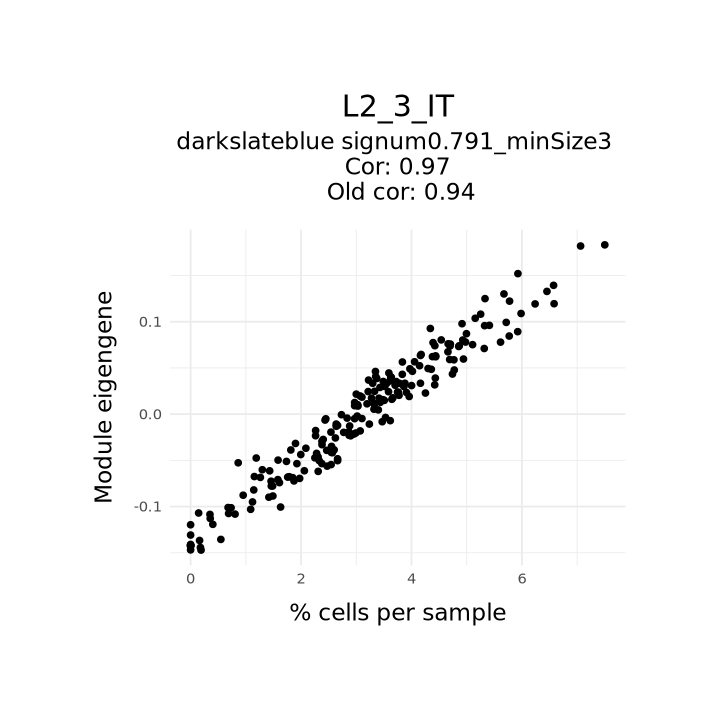

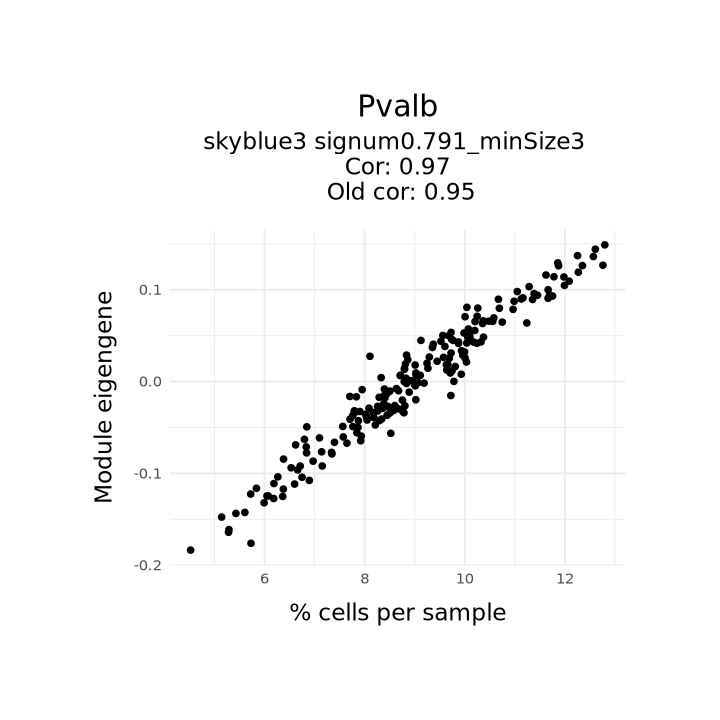

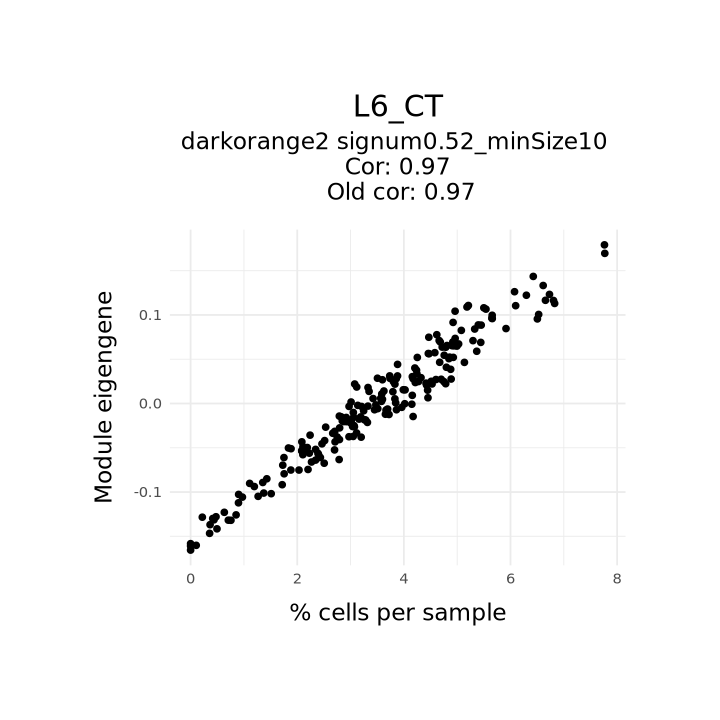

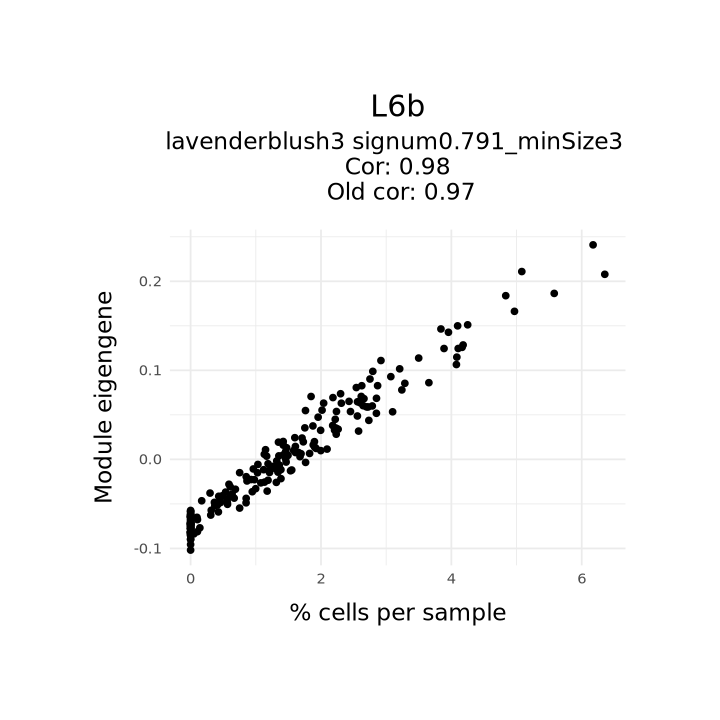

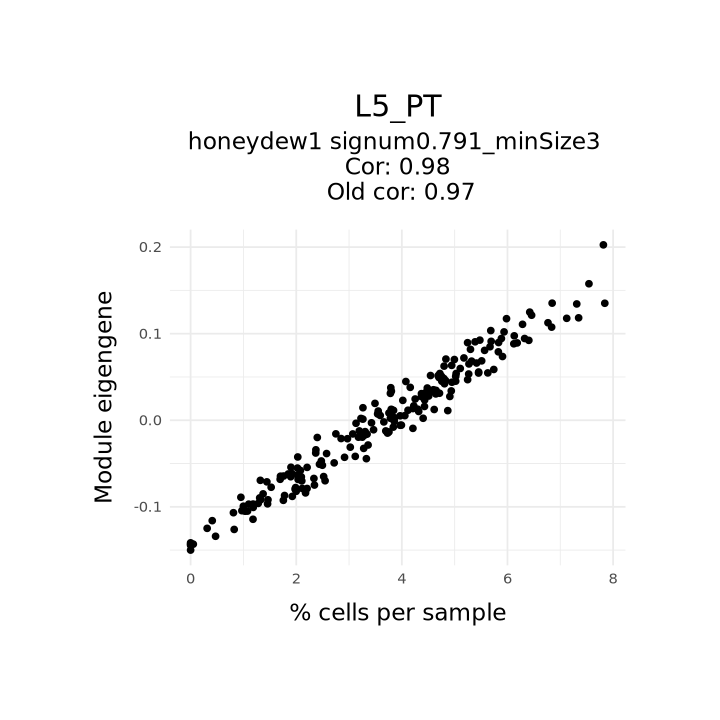

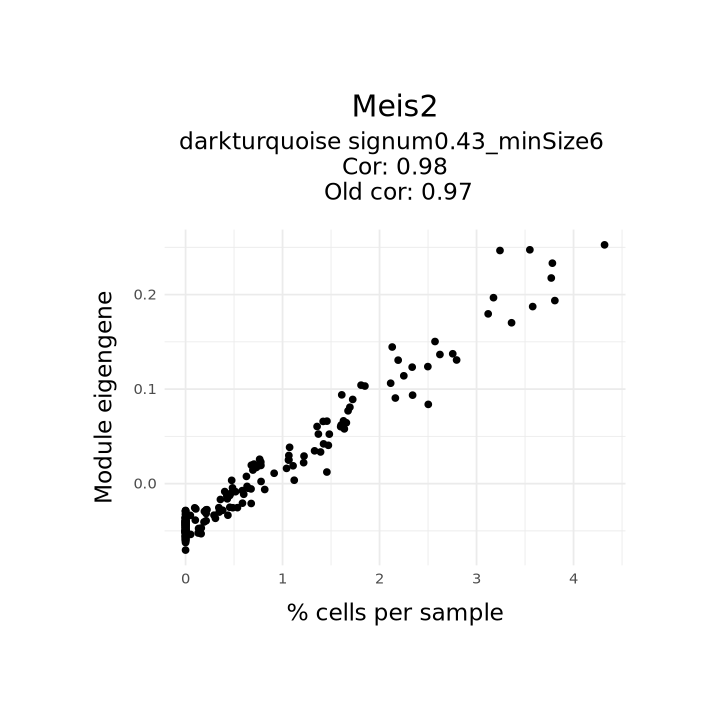

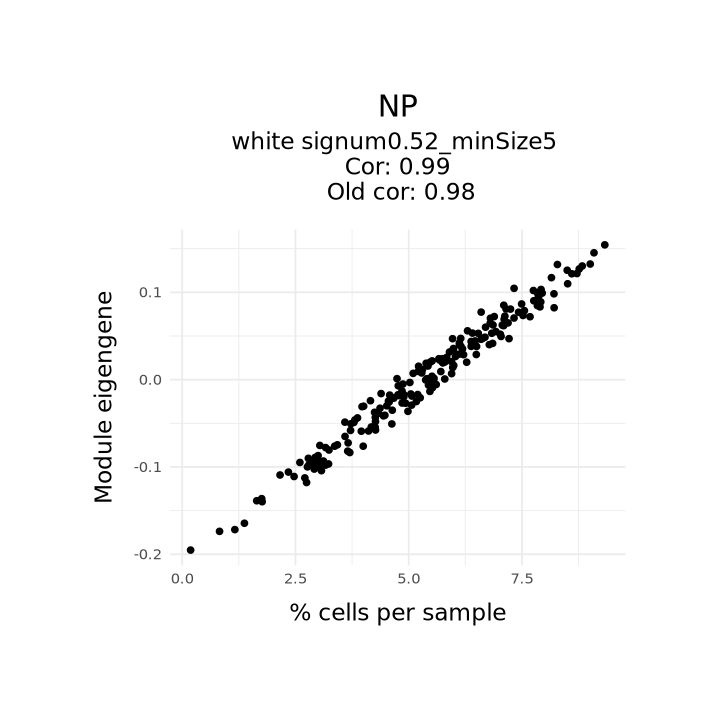

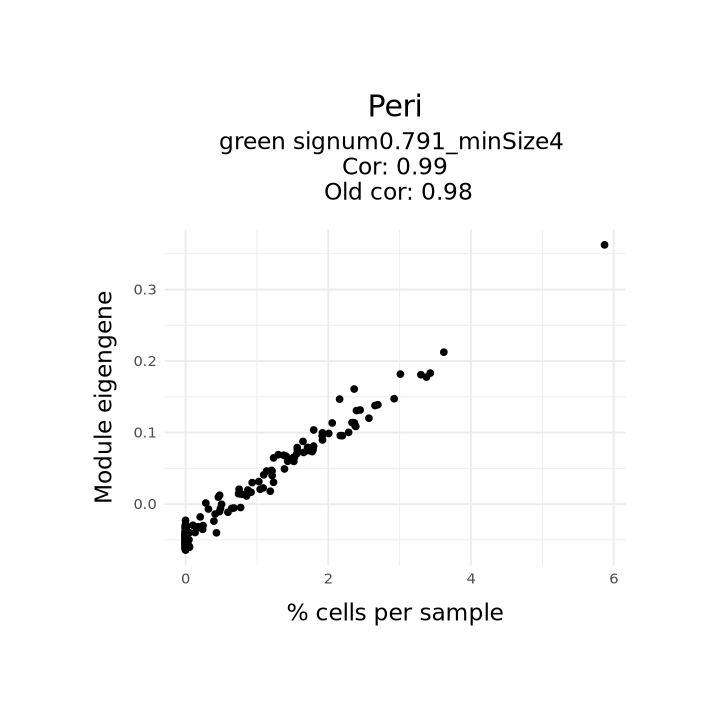

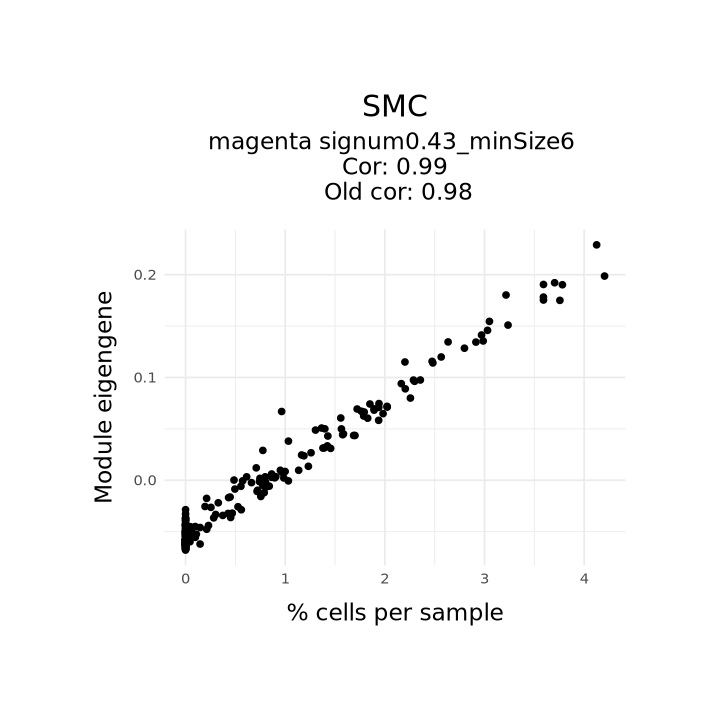

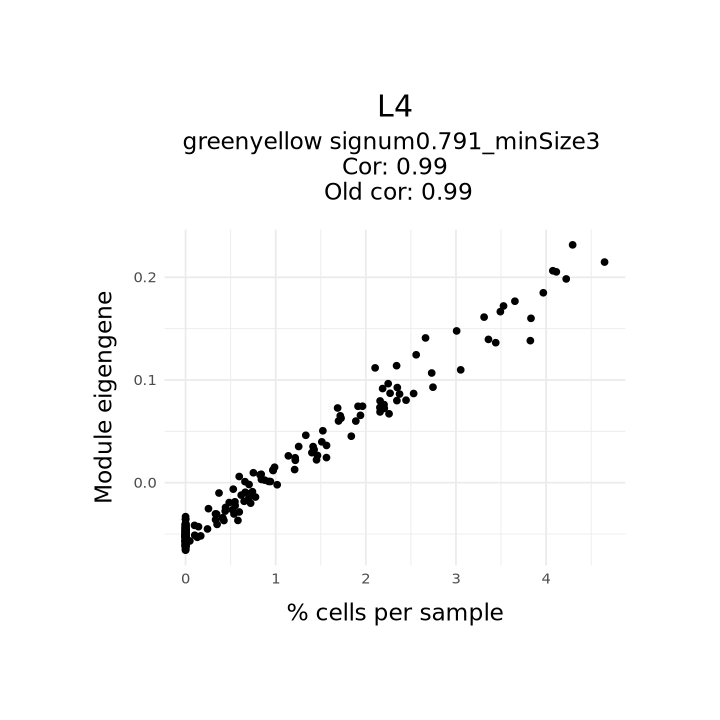

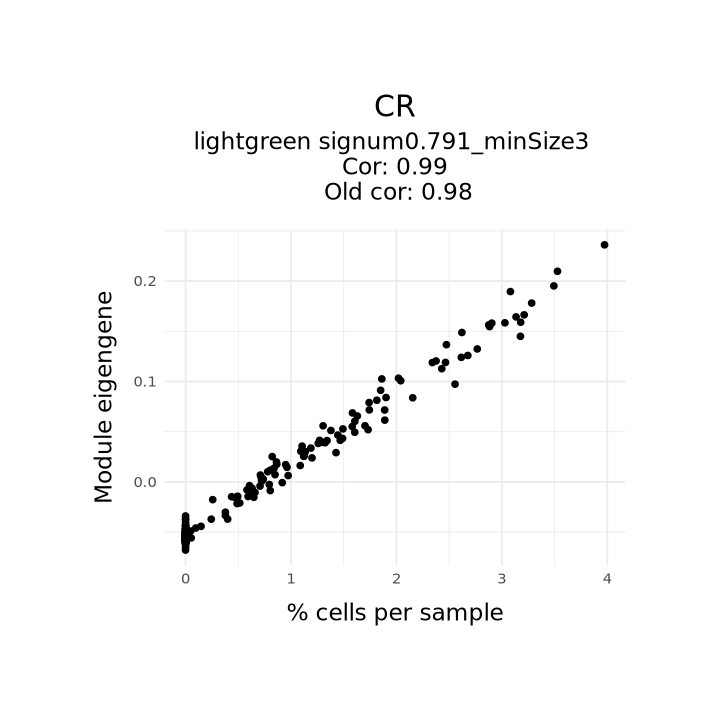

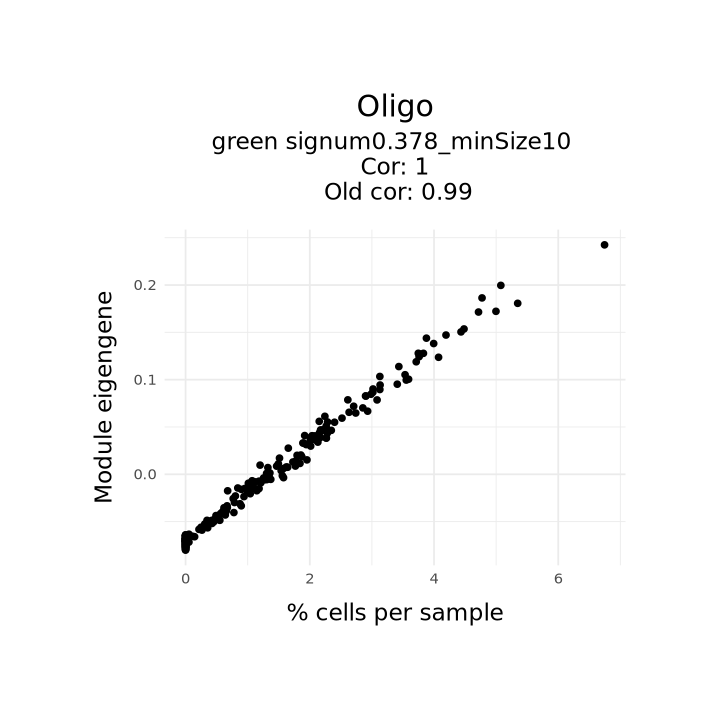

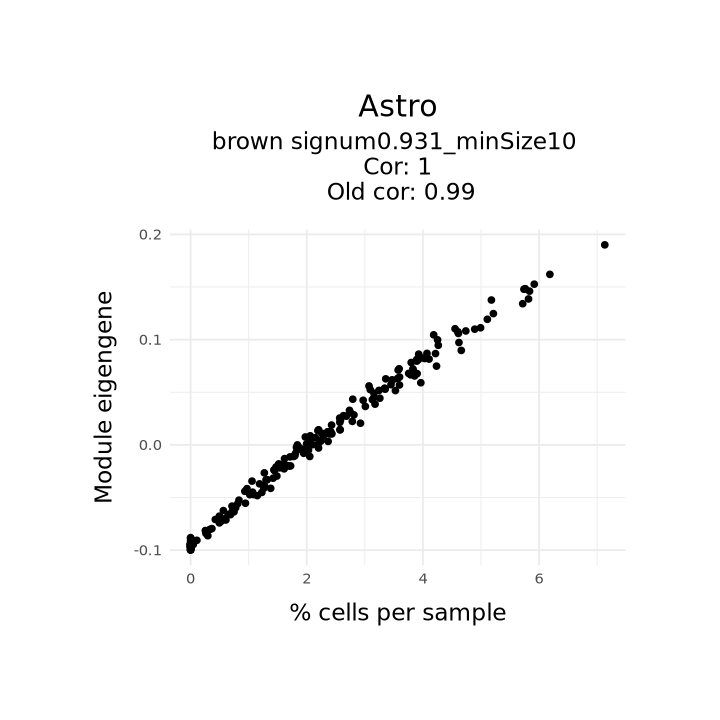

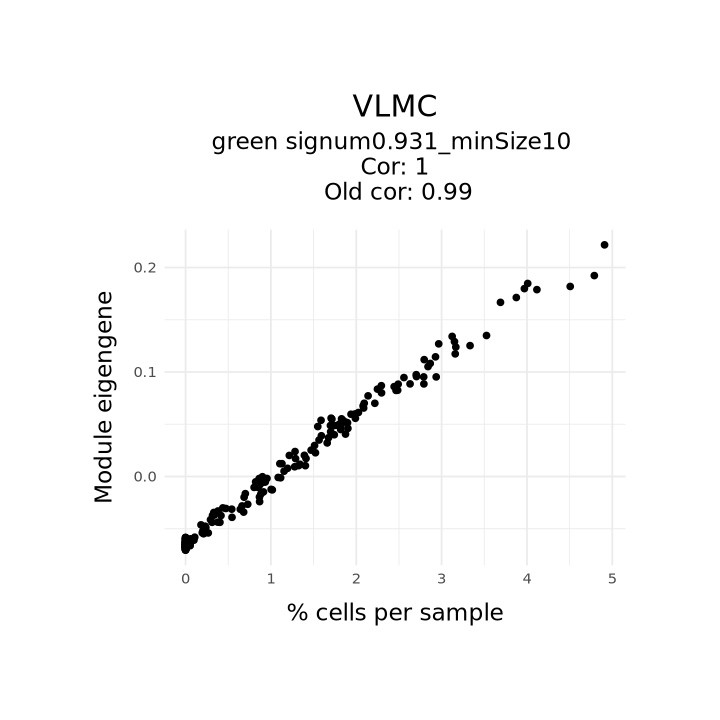

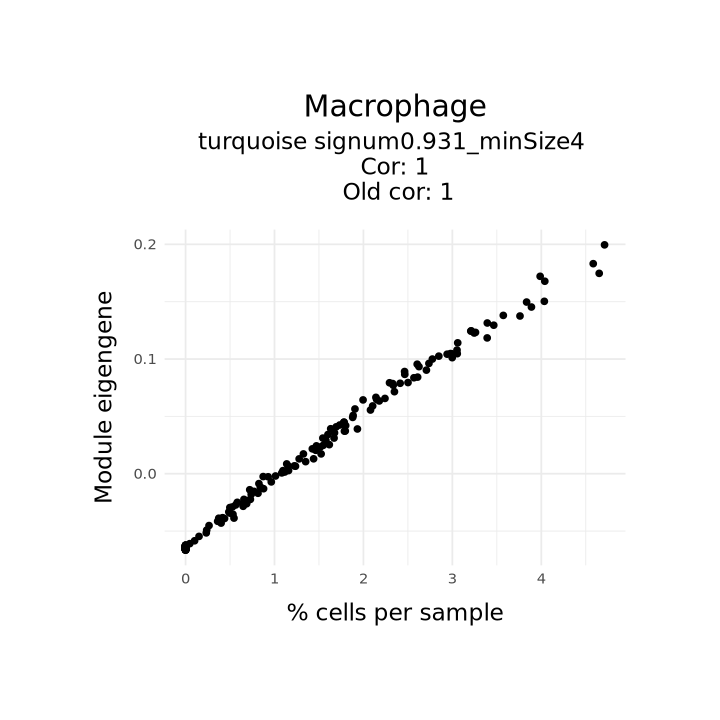

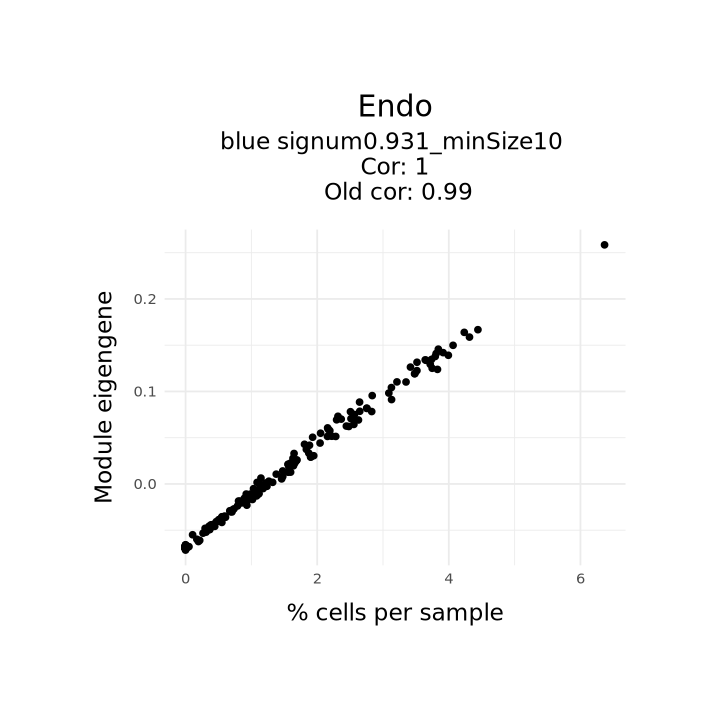

In [13]:
plot_ctype_abundance_vs_top_corr_ME(pseudobulk_legend, top_corr_mods_35SD_PosBC_df)

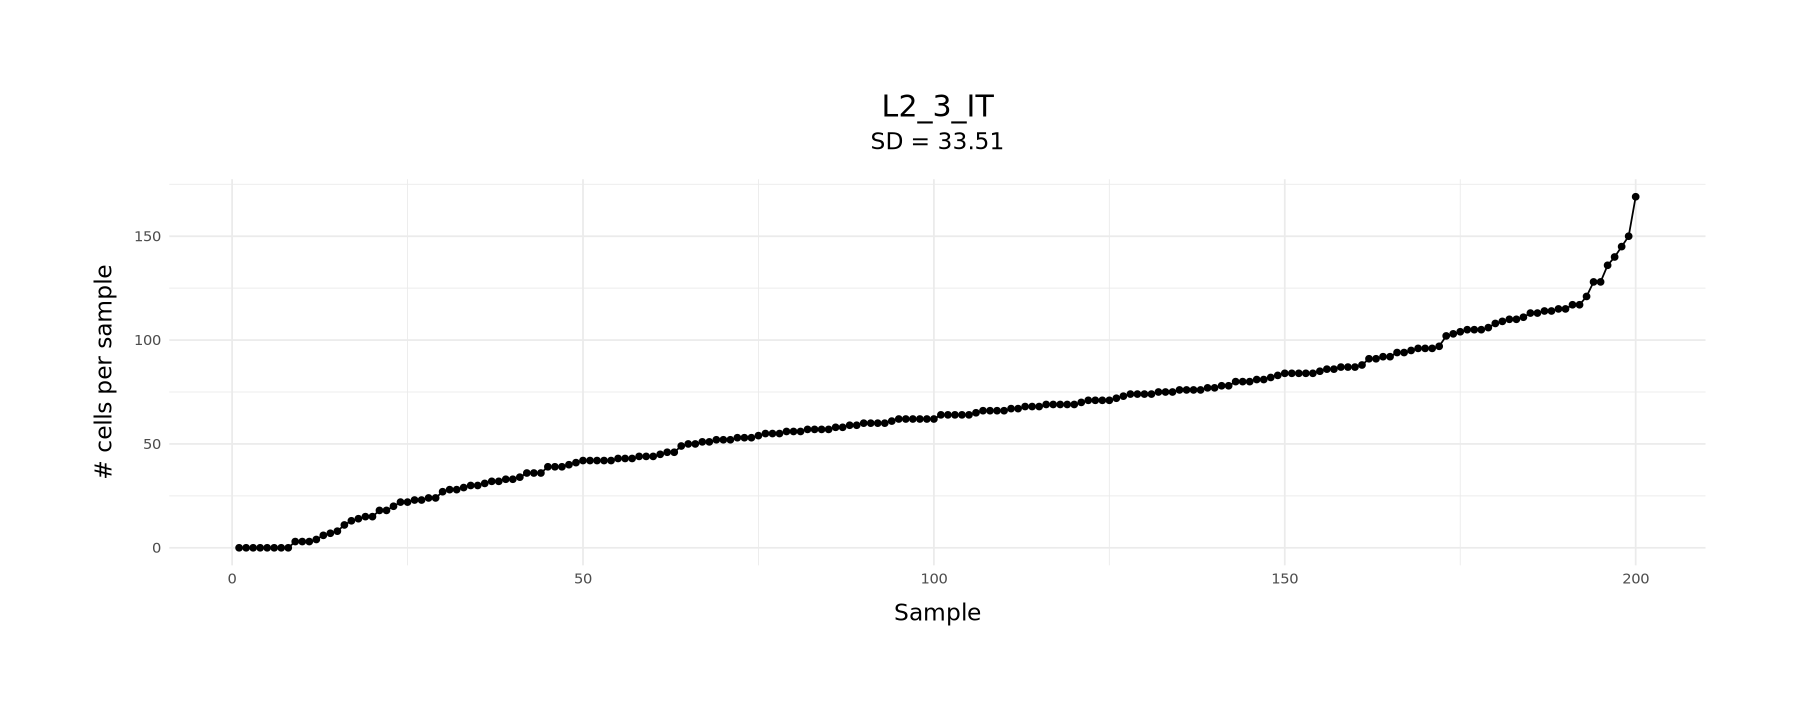

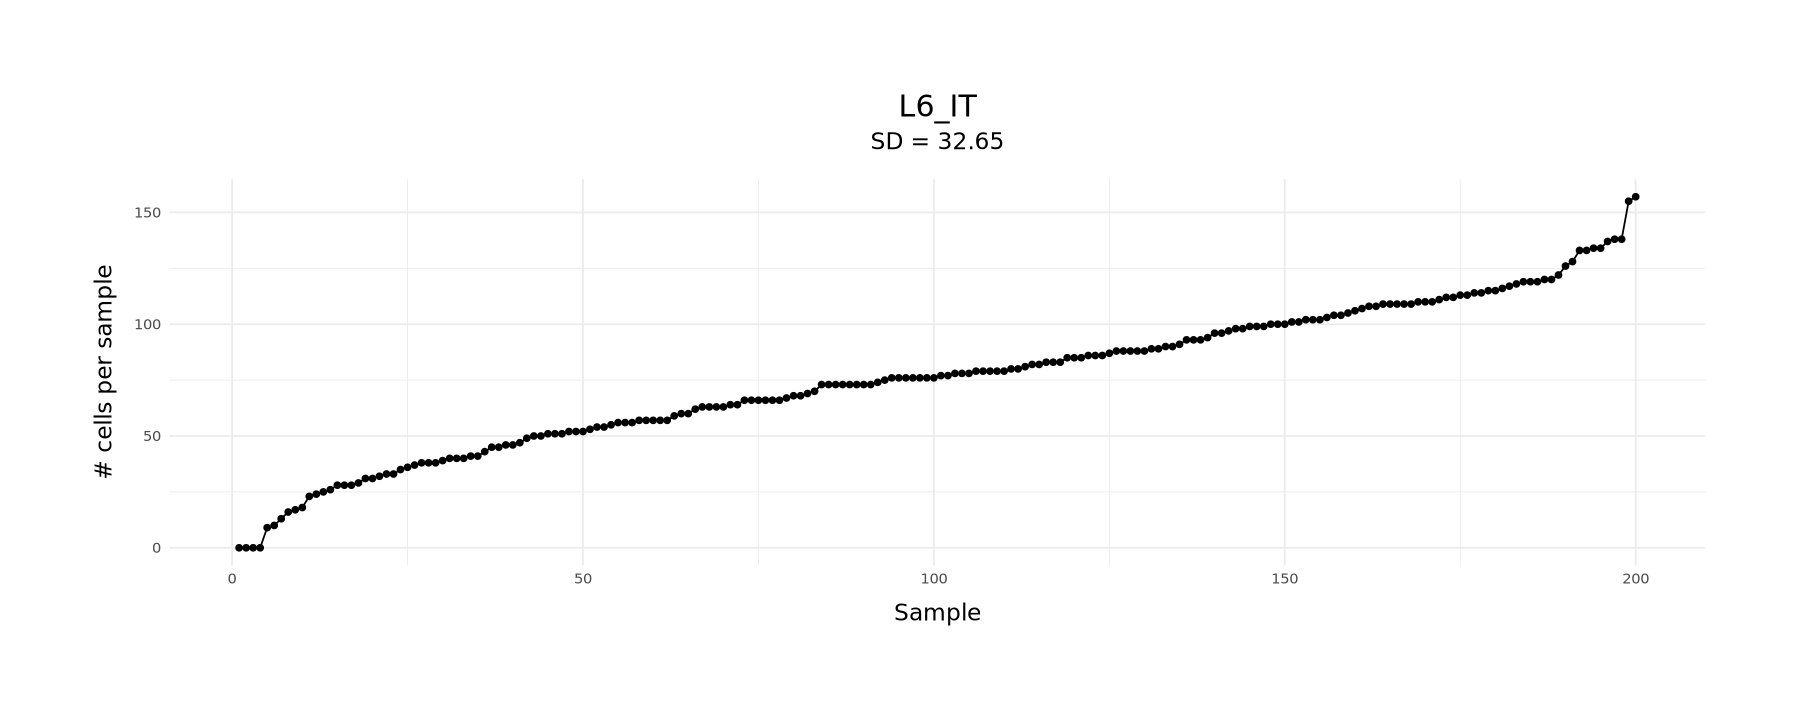

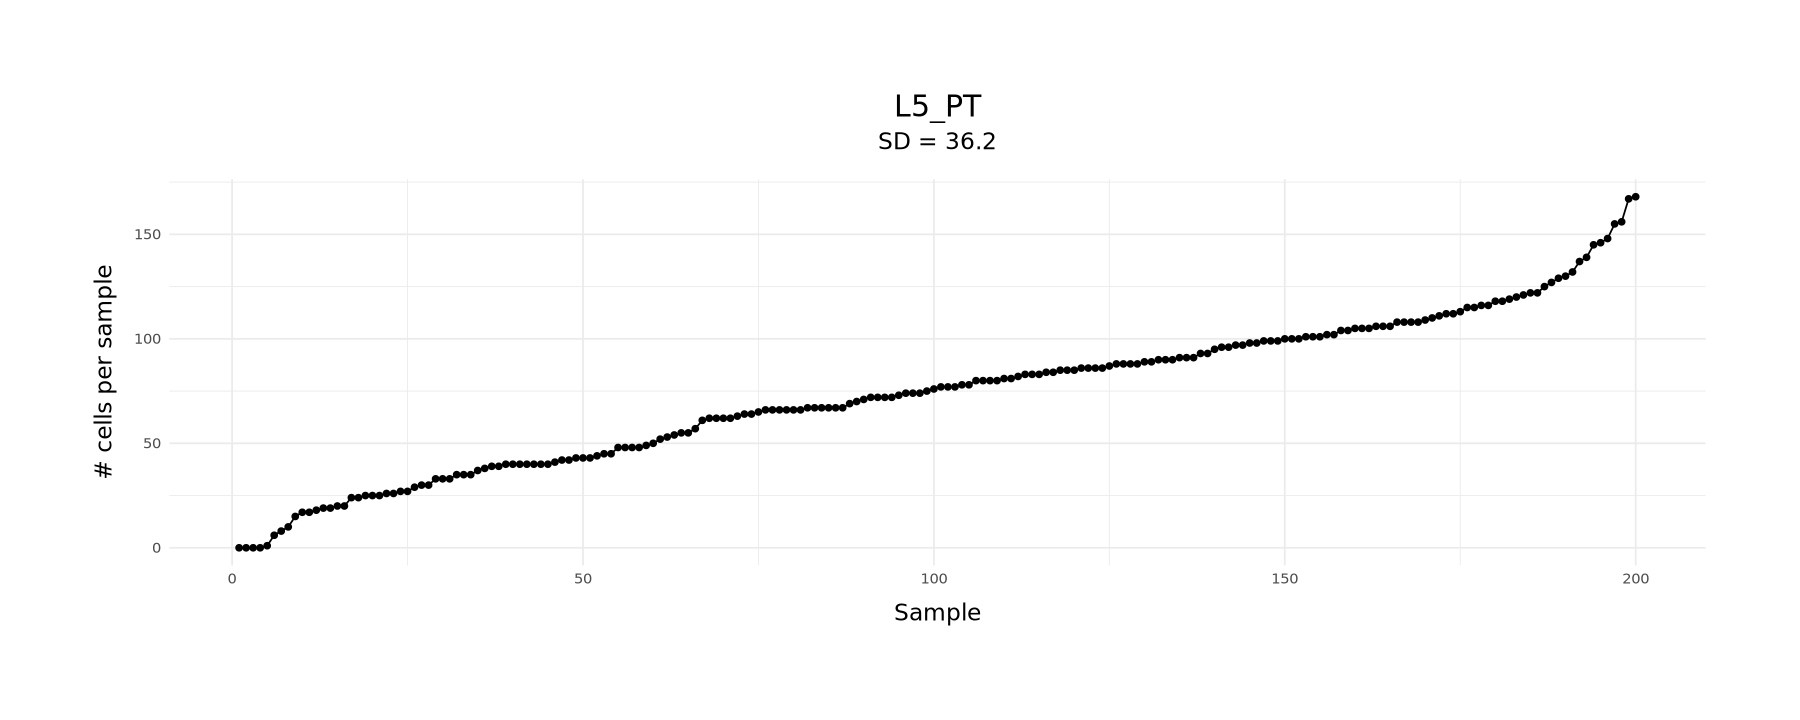

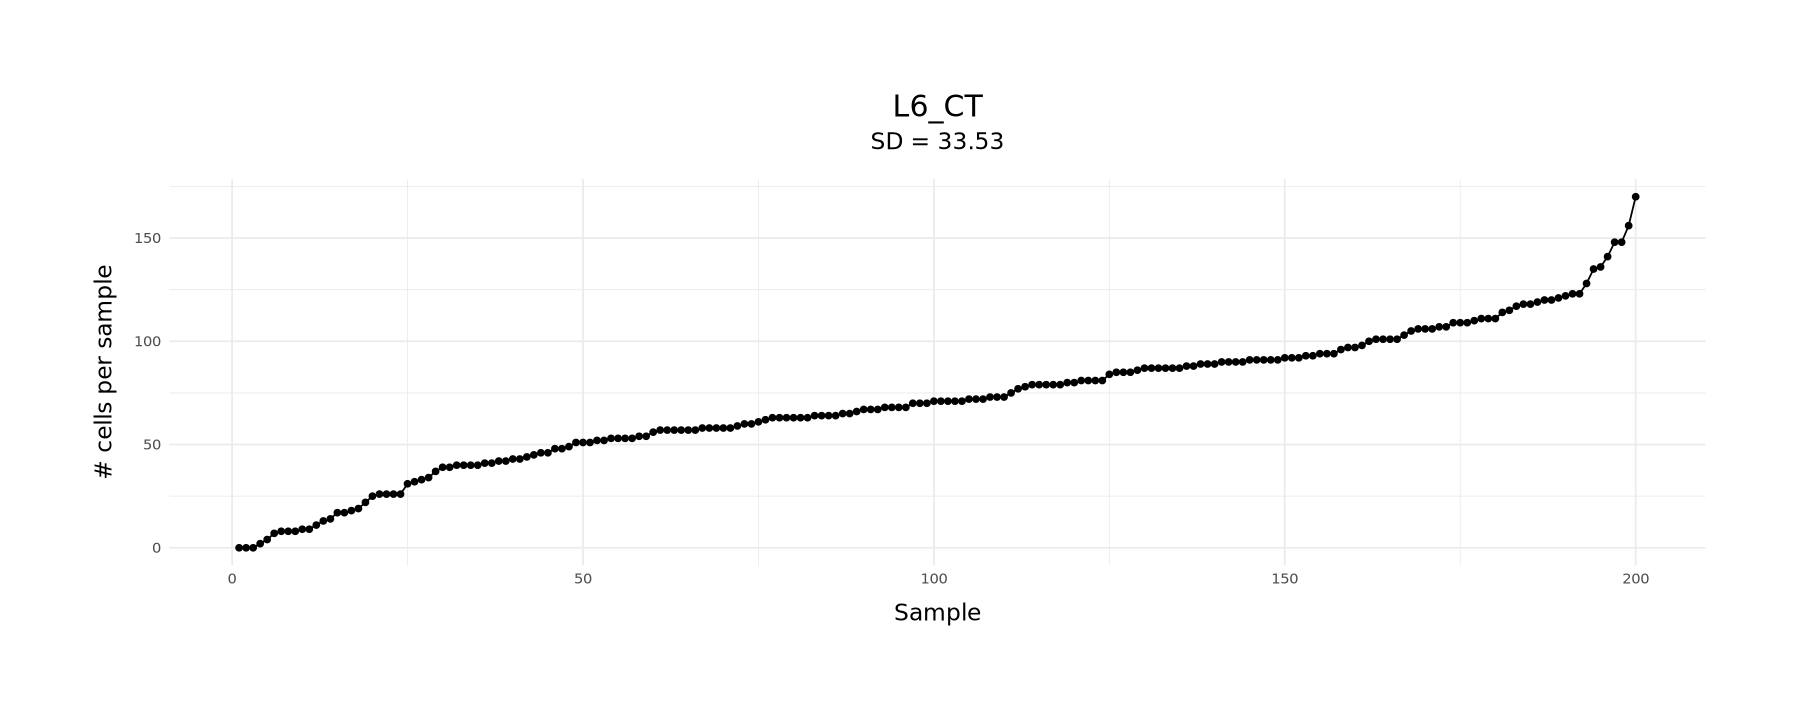

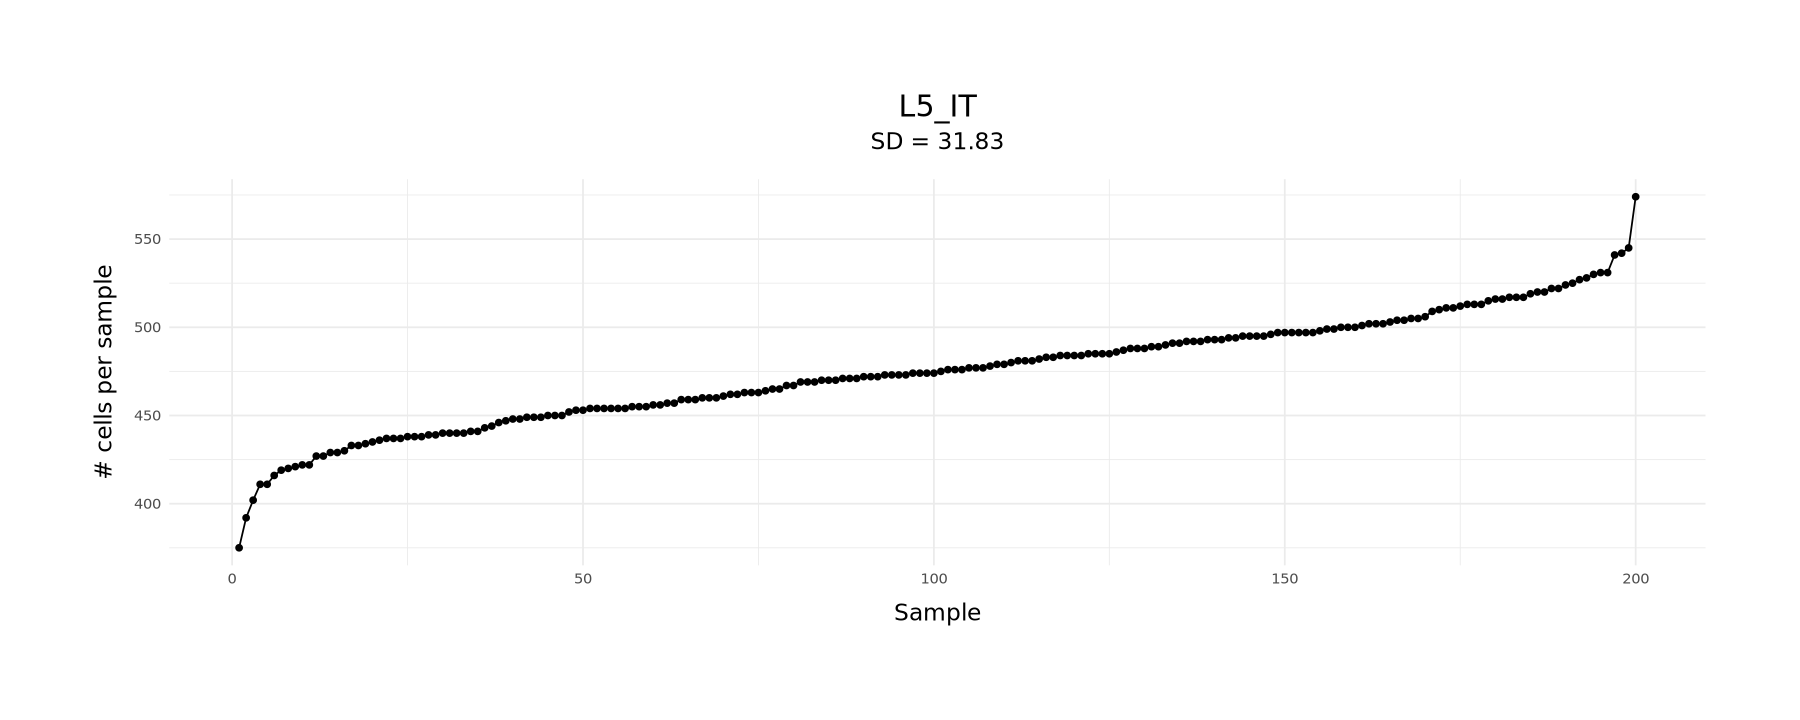

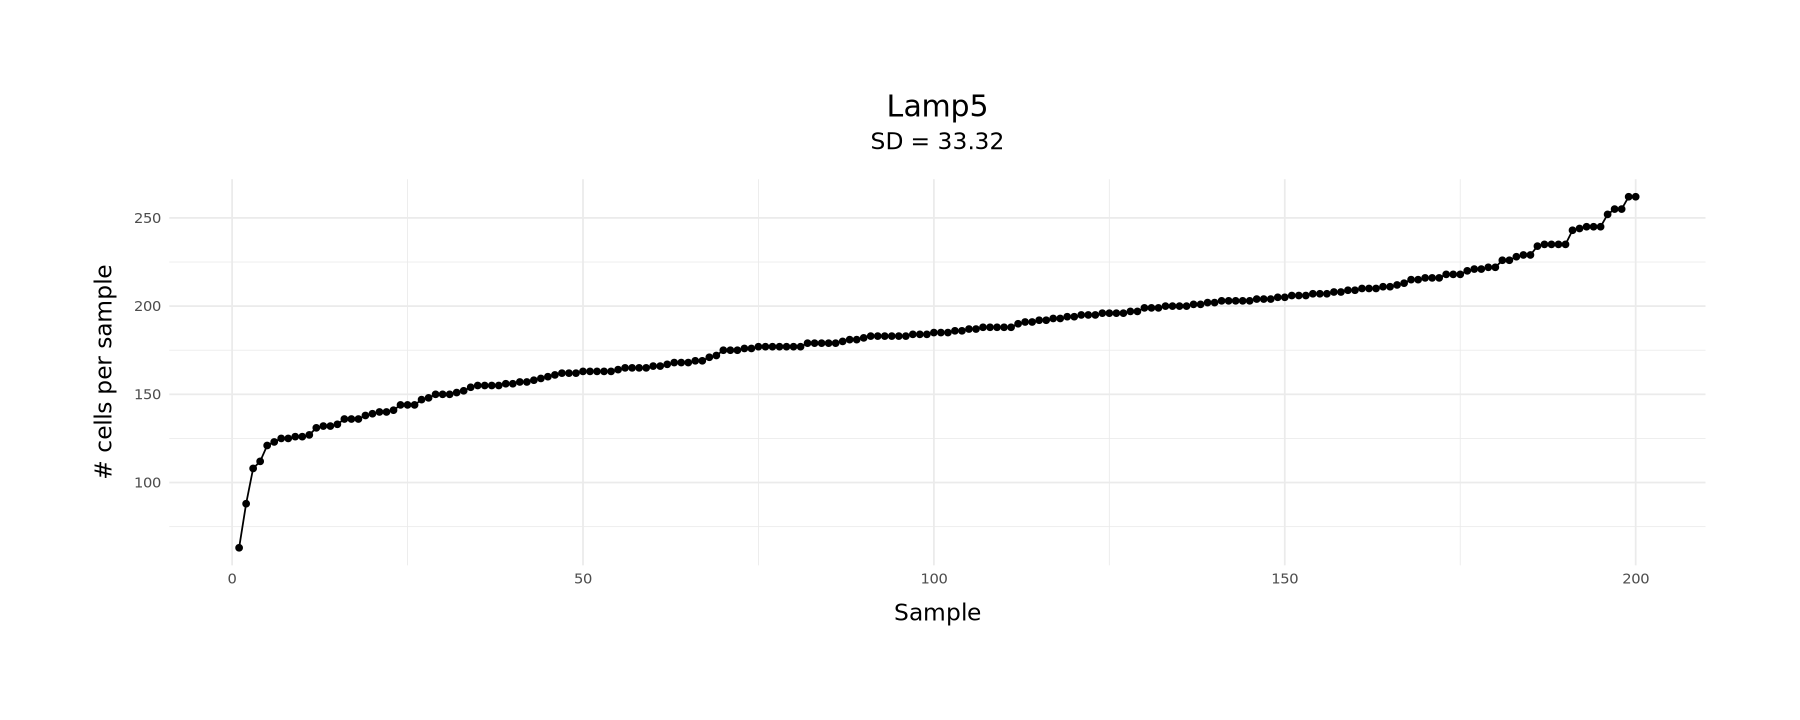

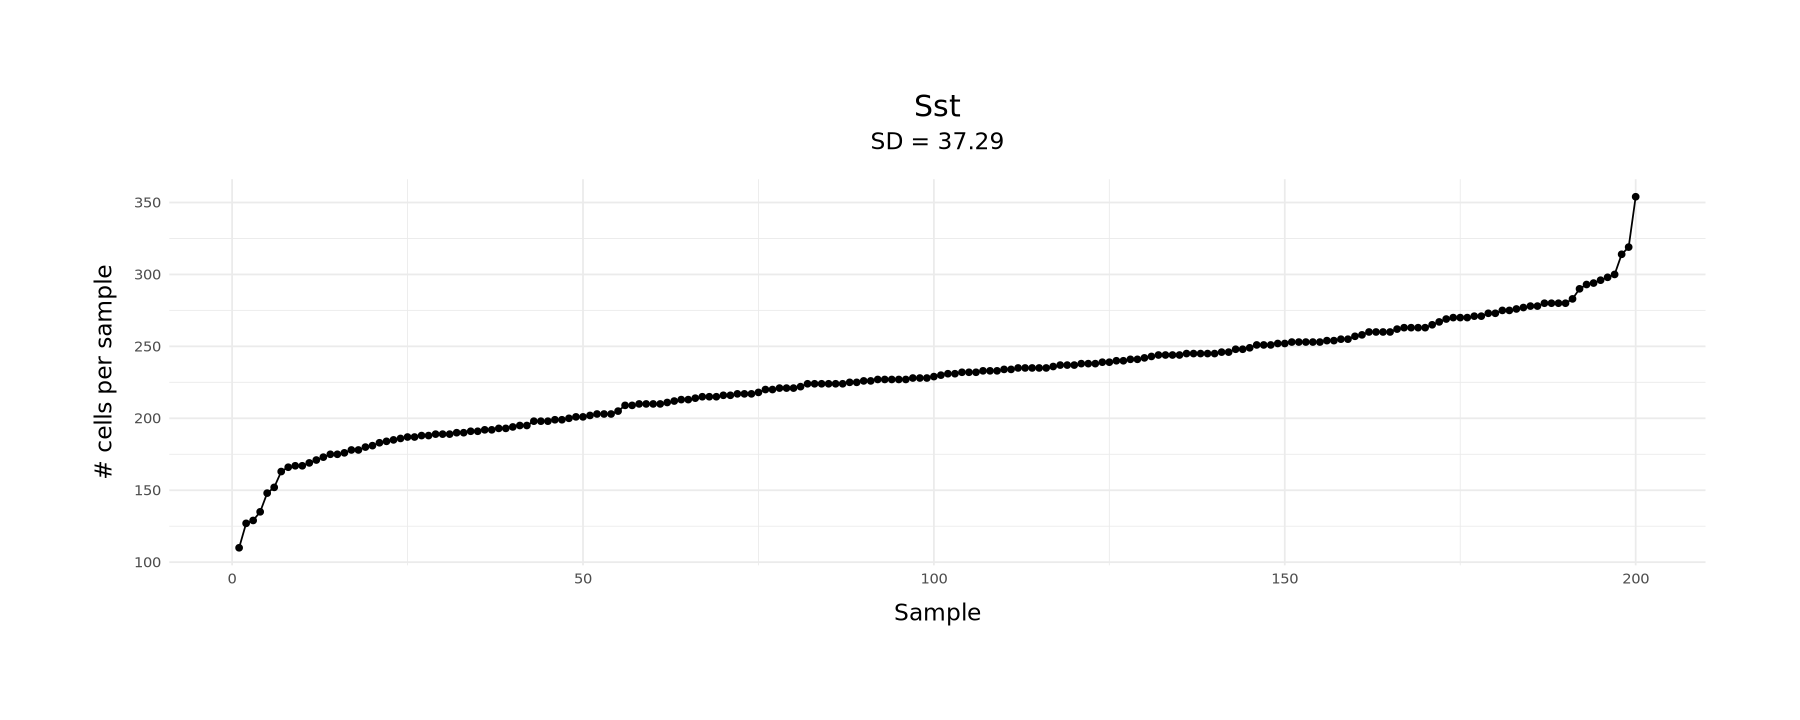

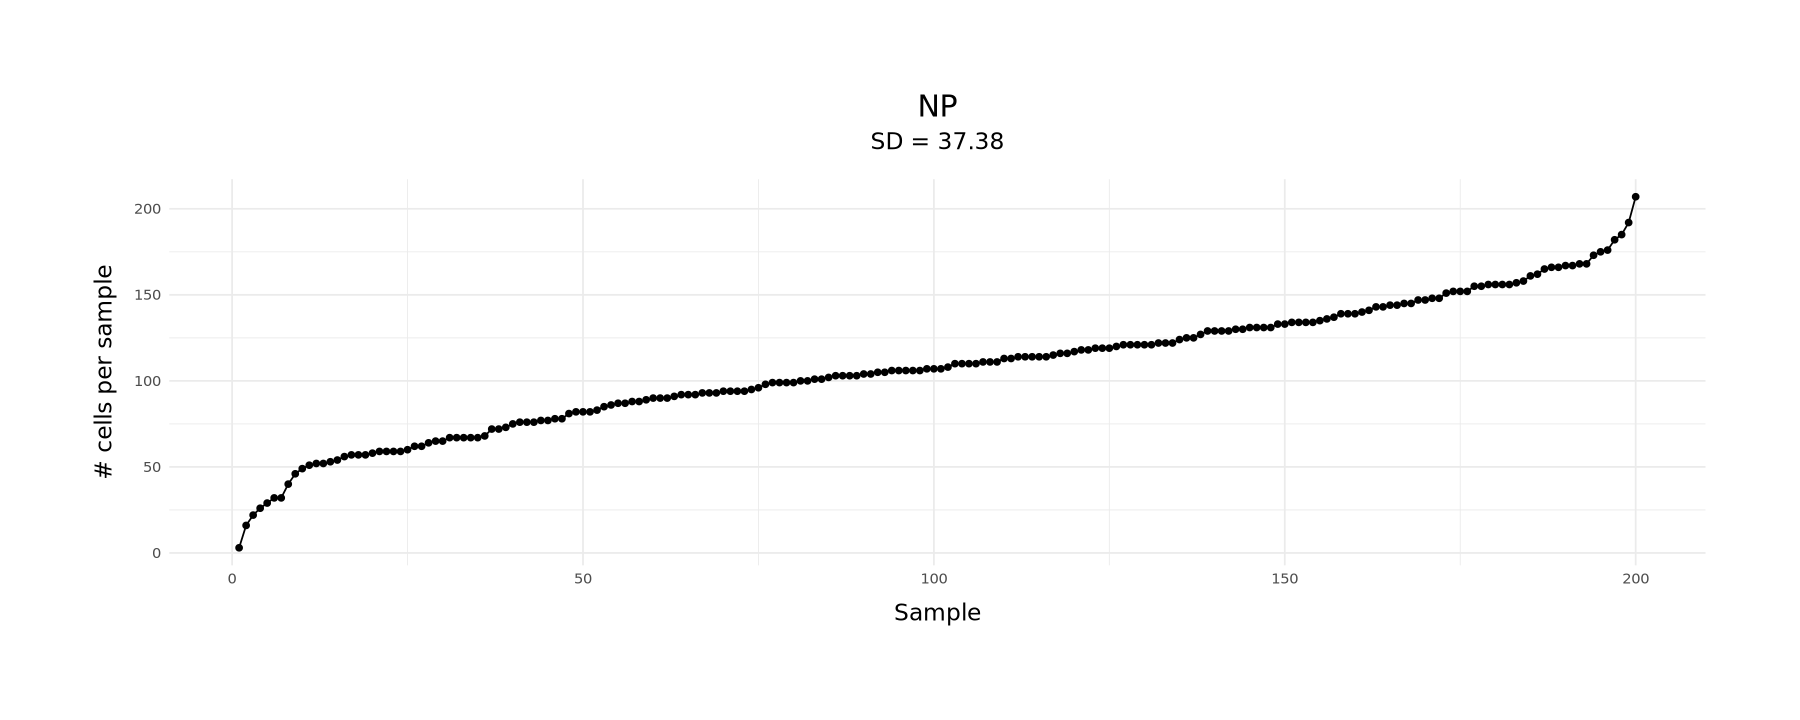

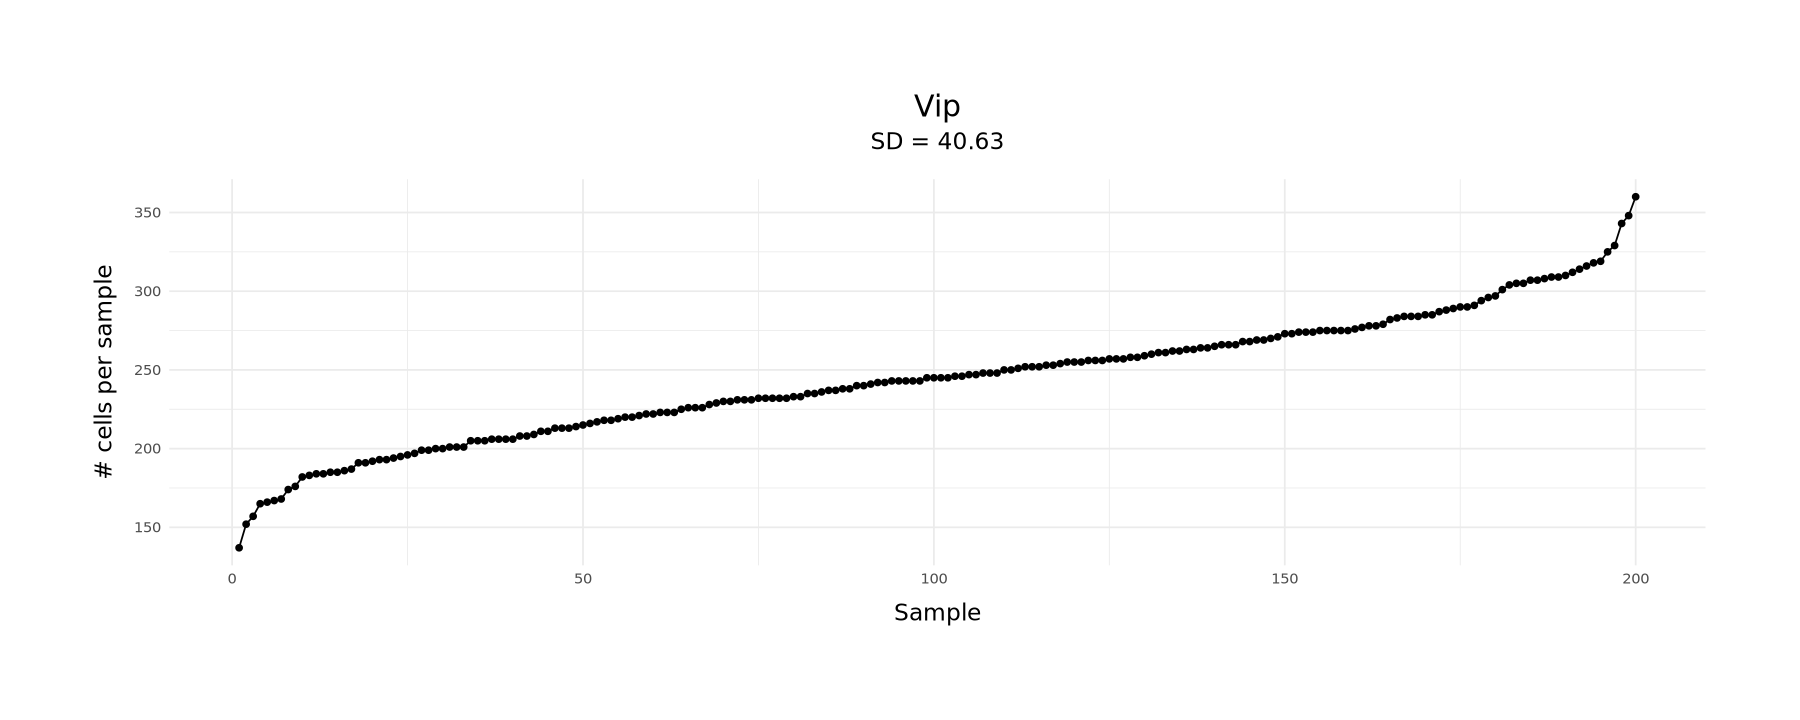

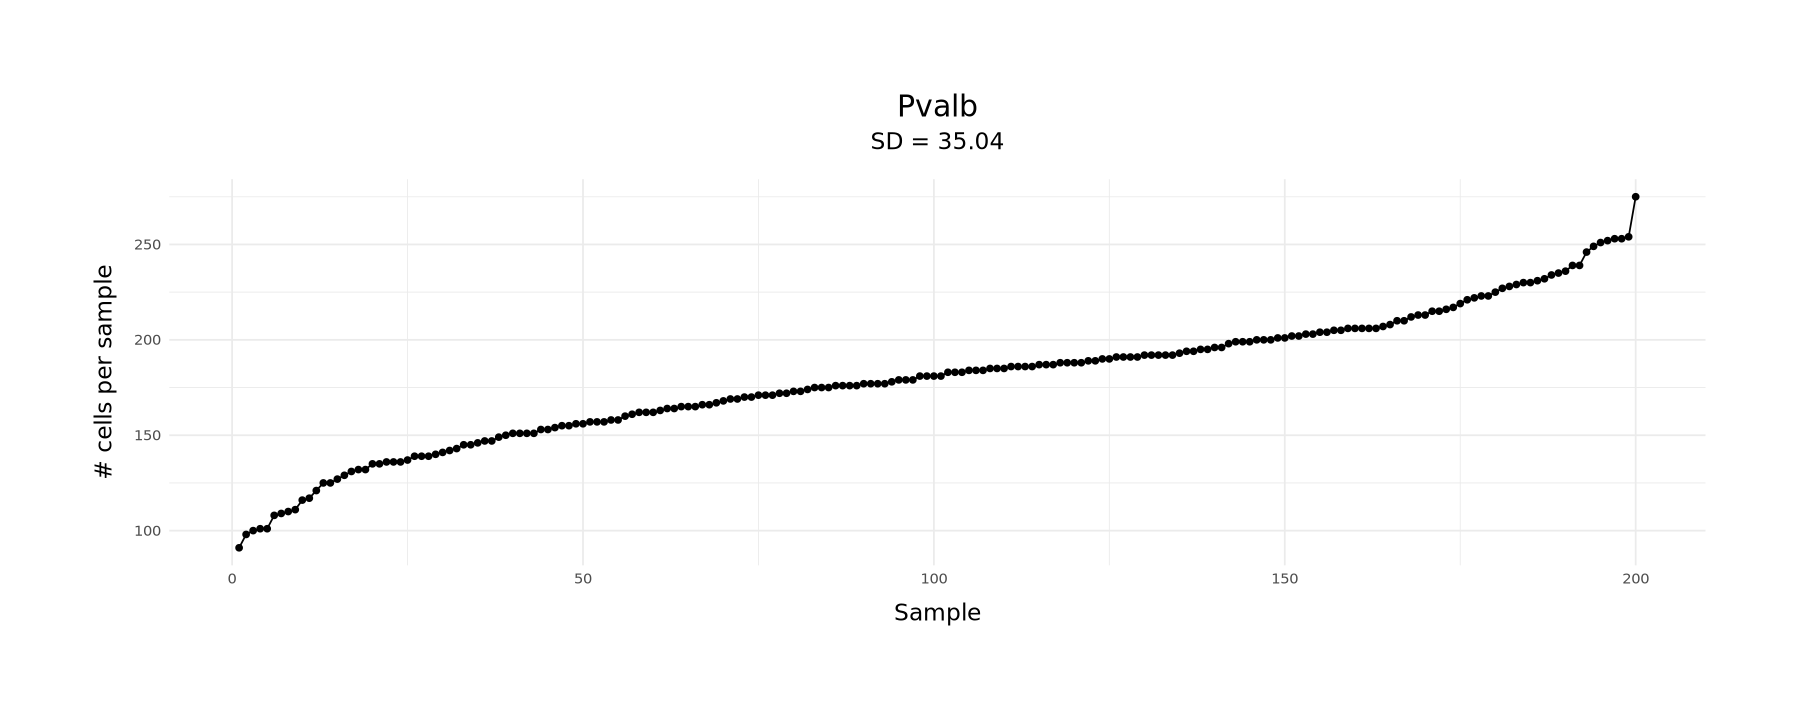

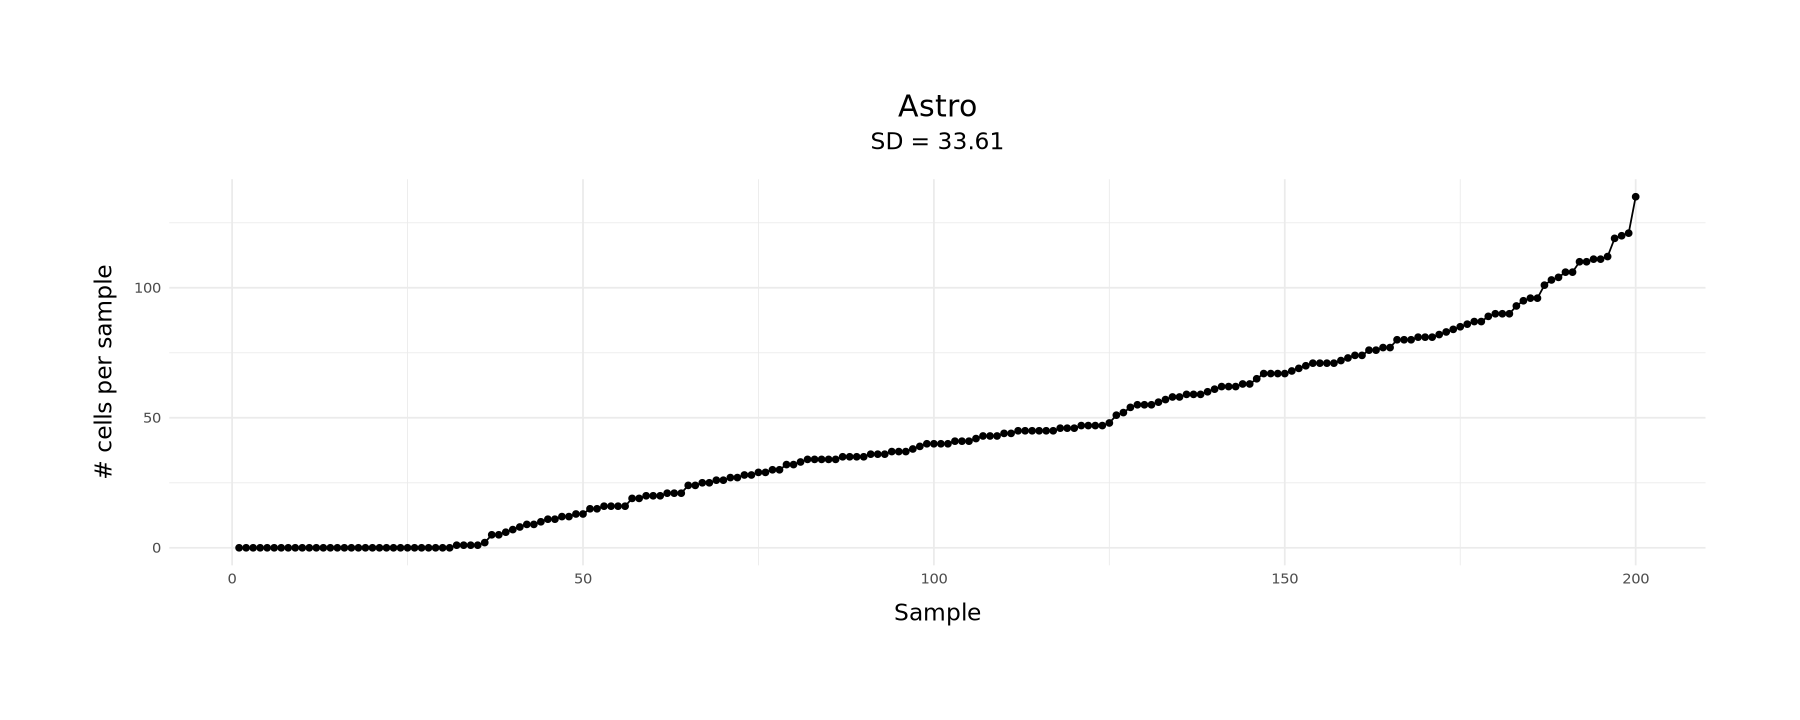

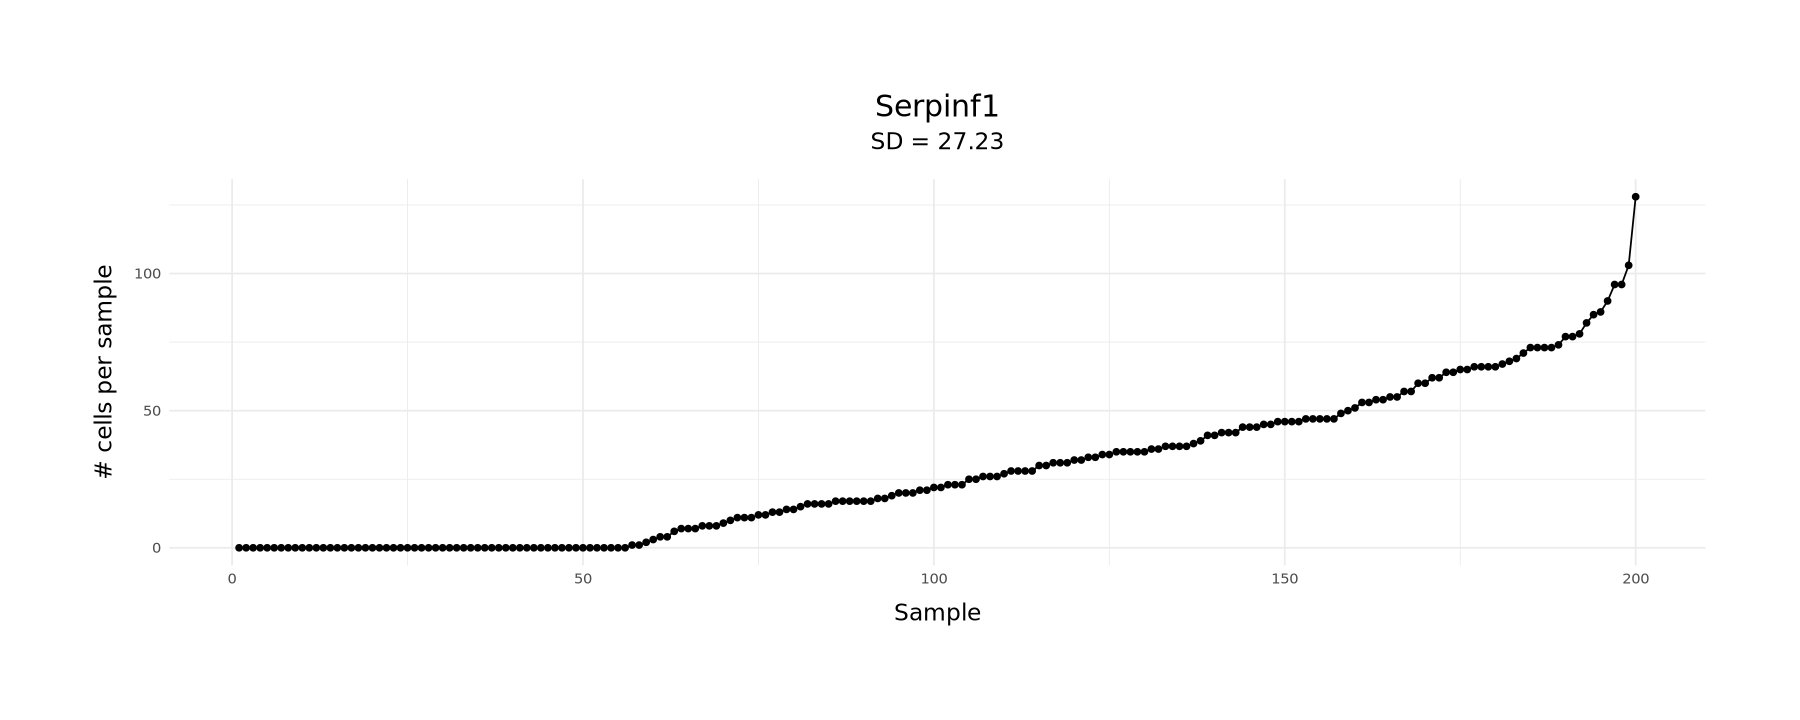

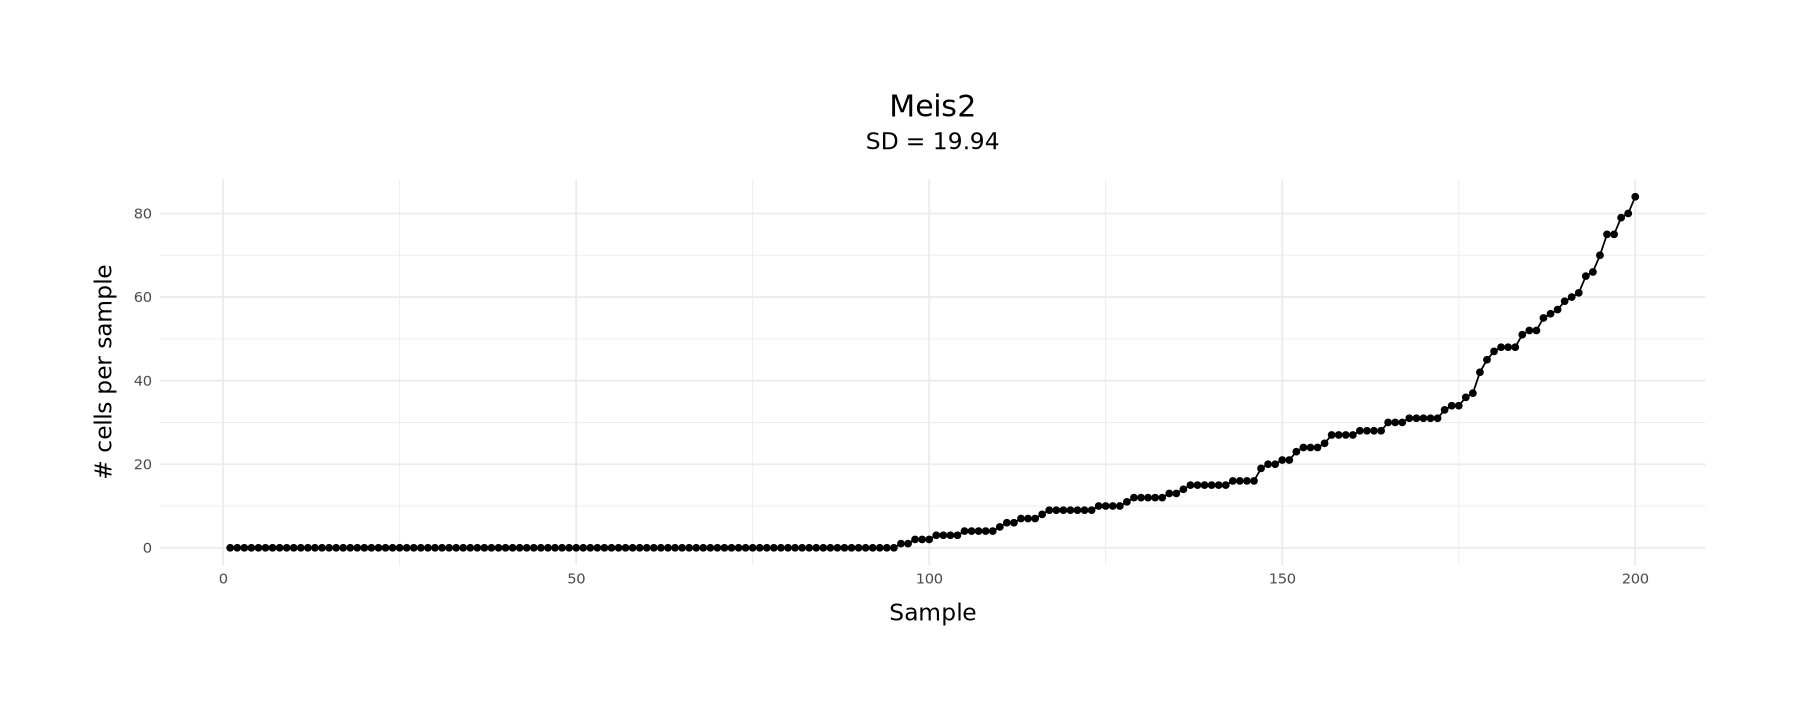

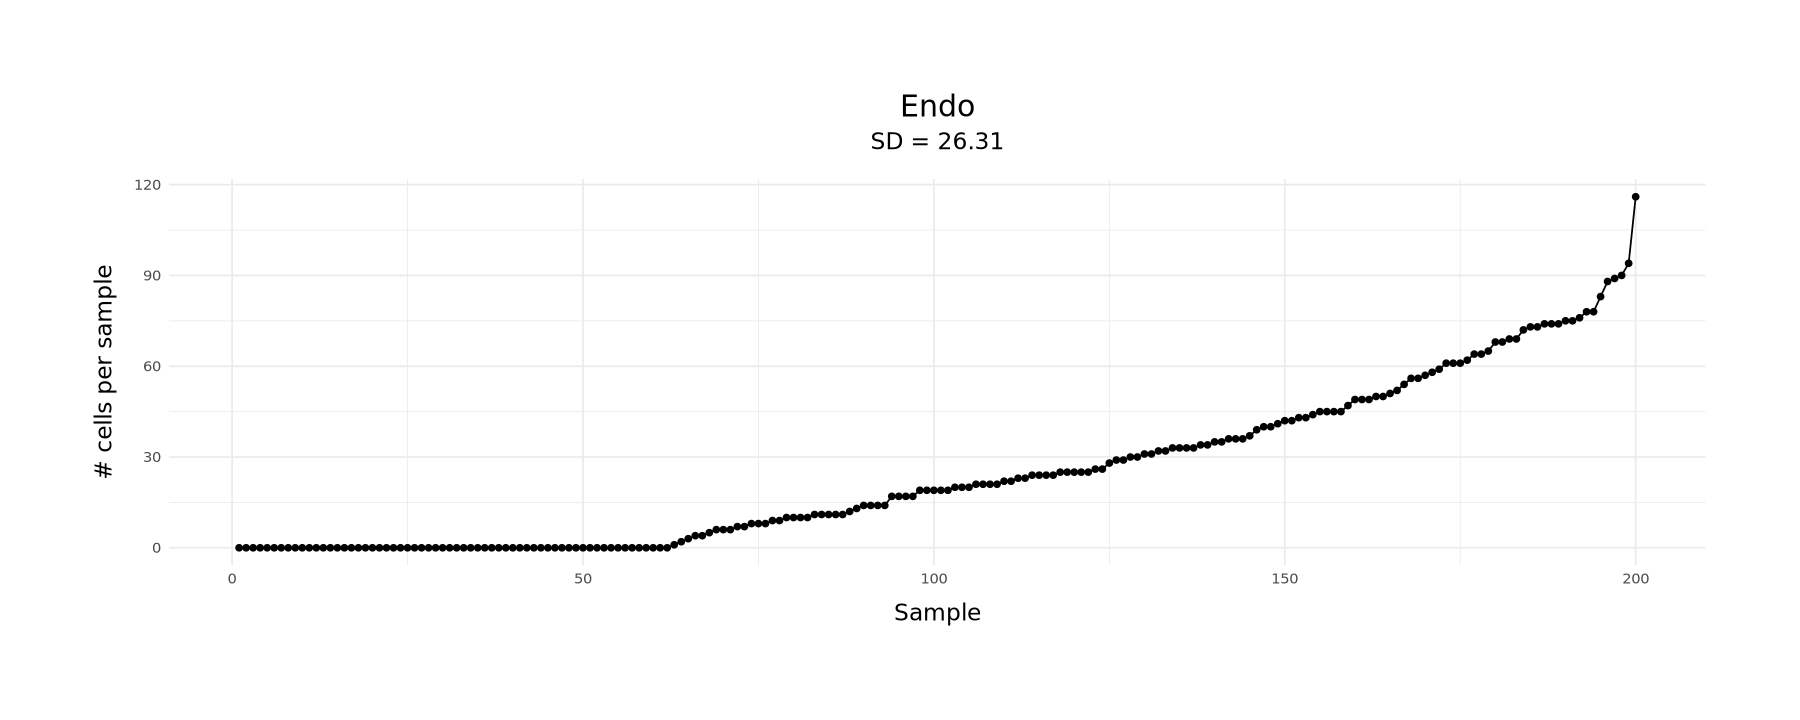

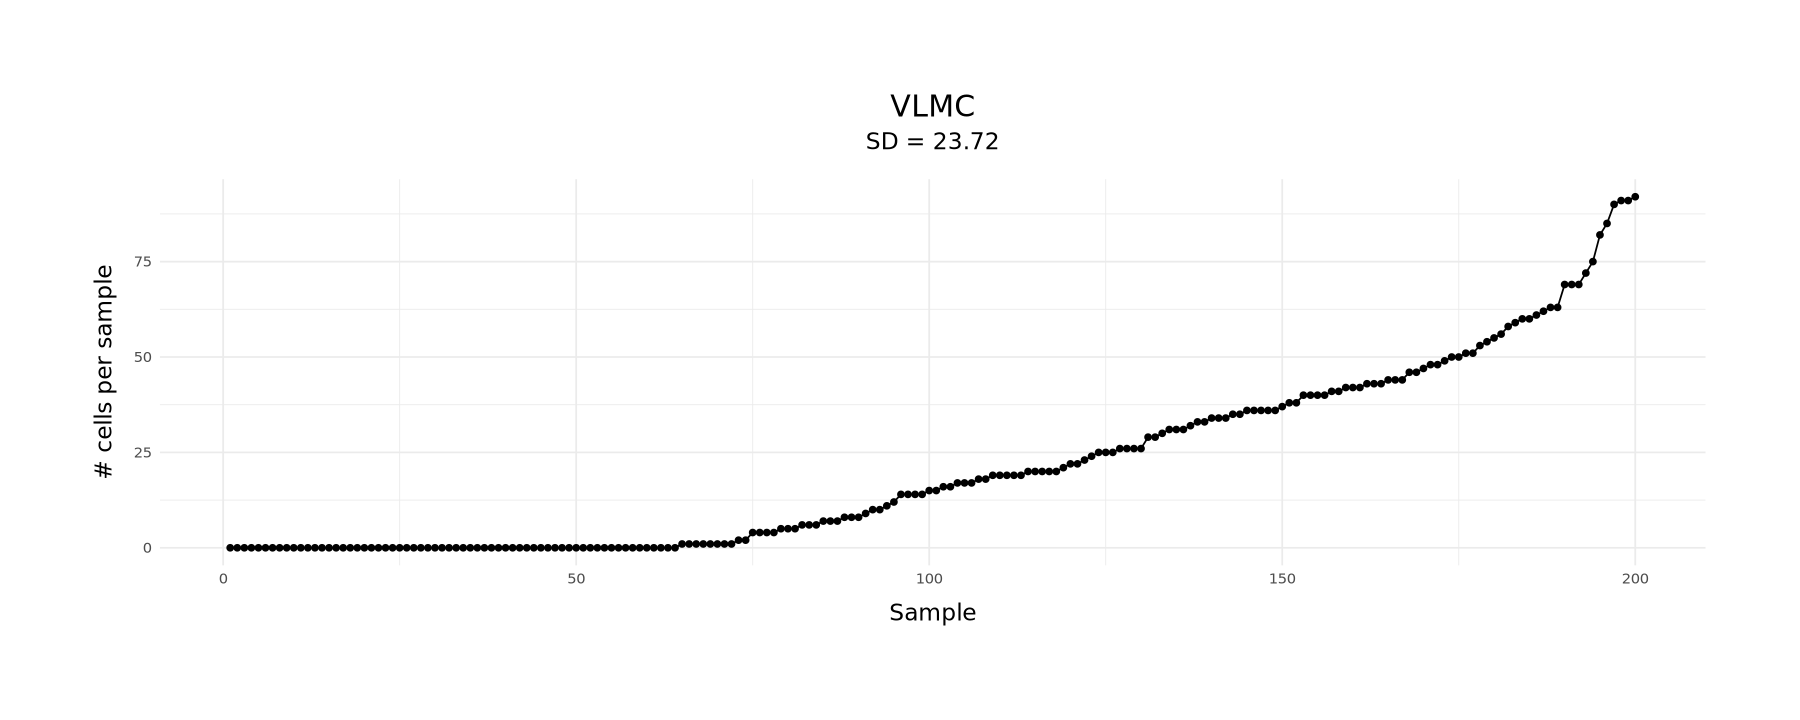

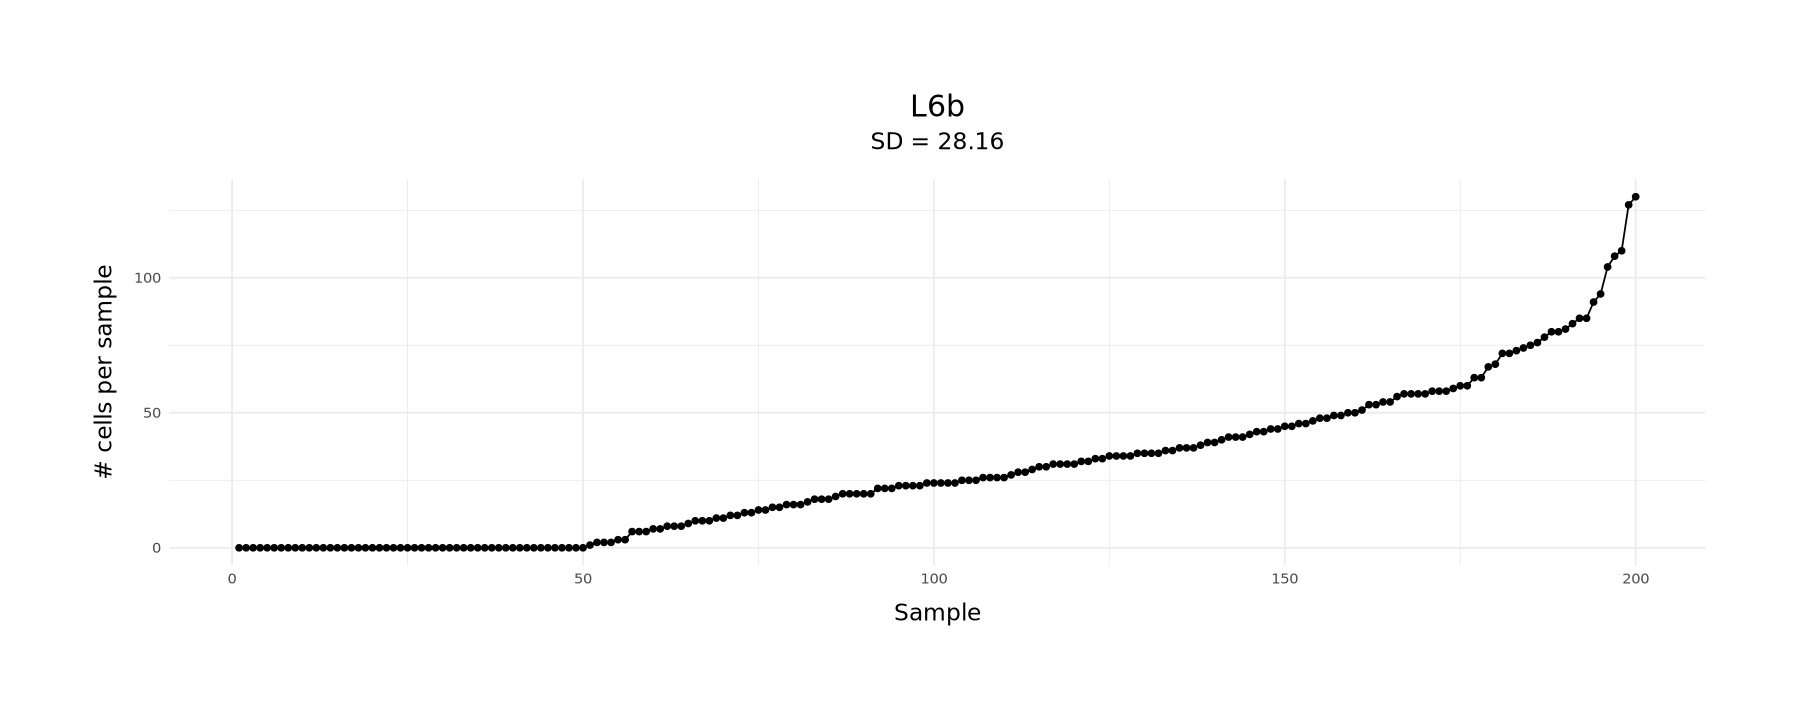

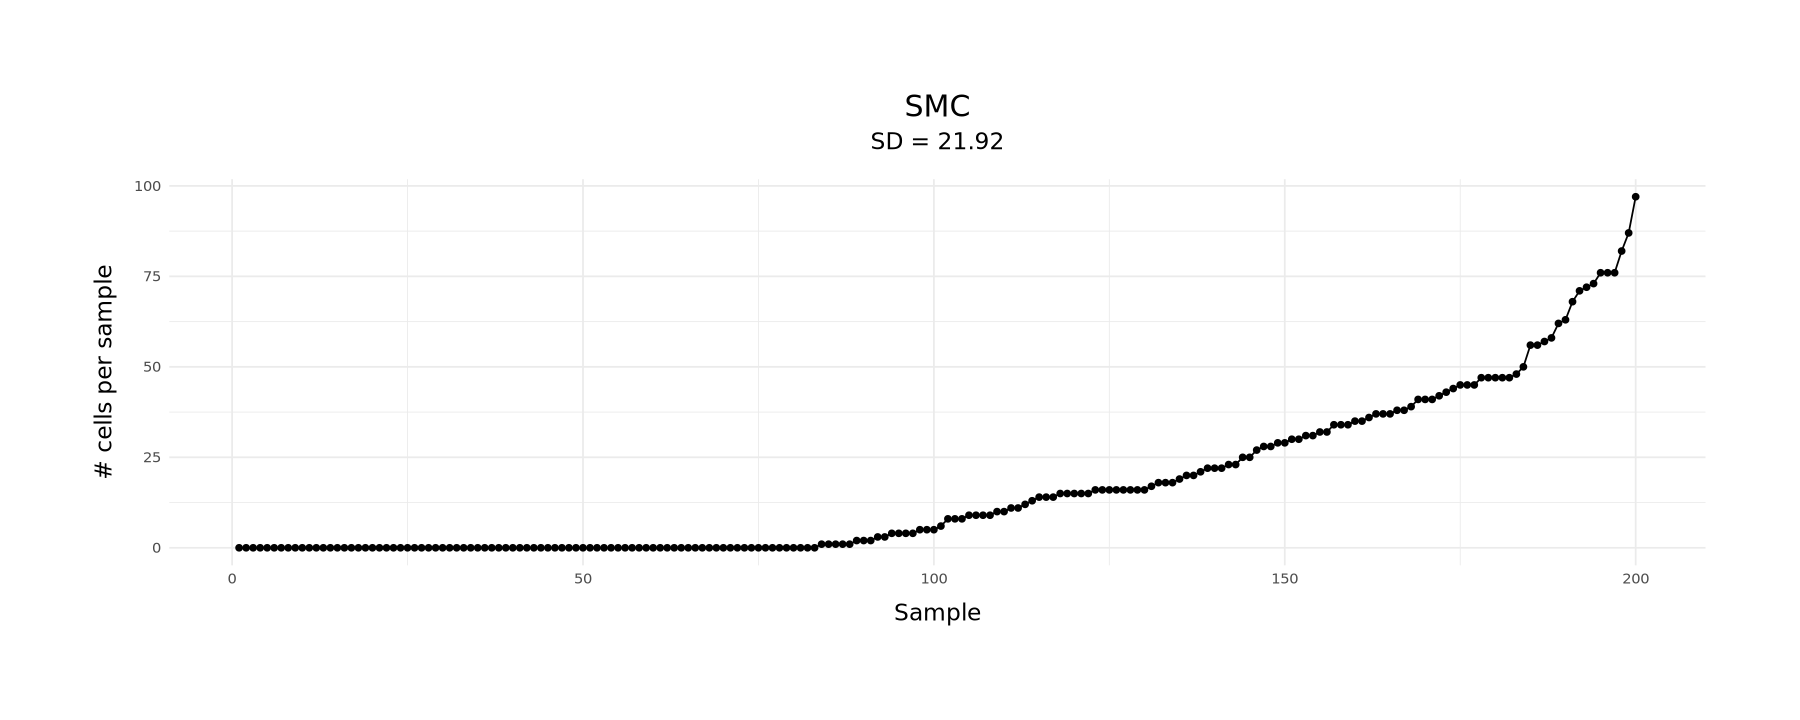

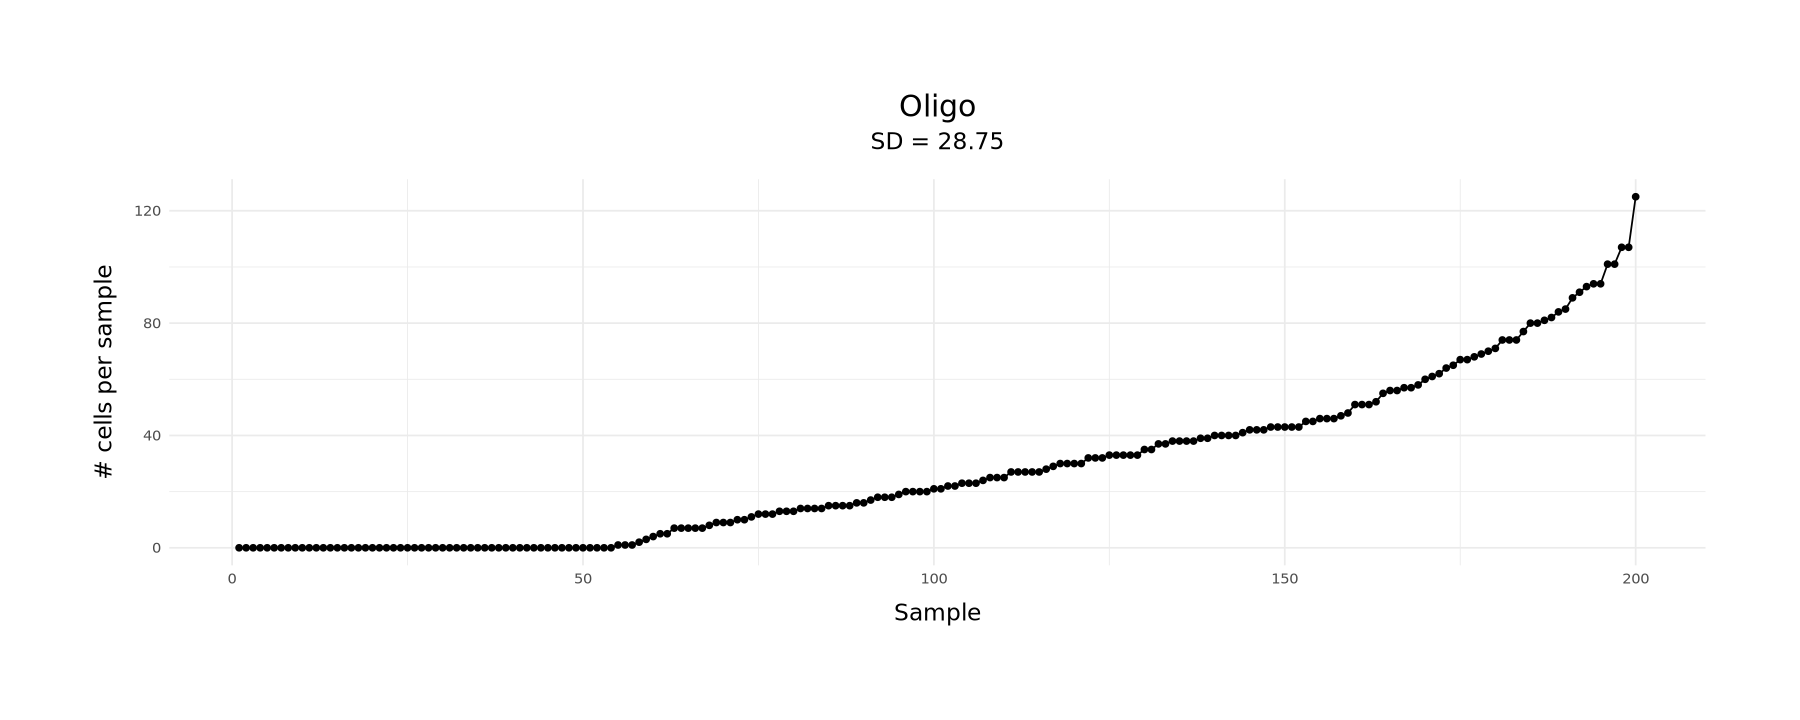

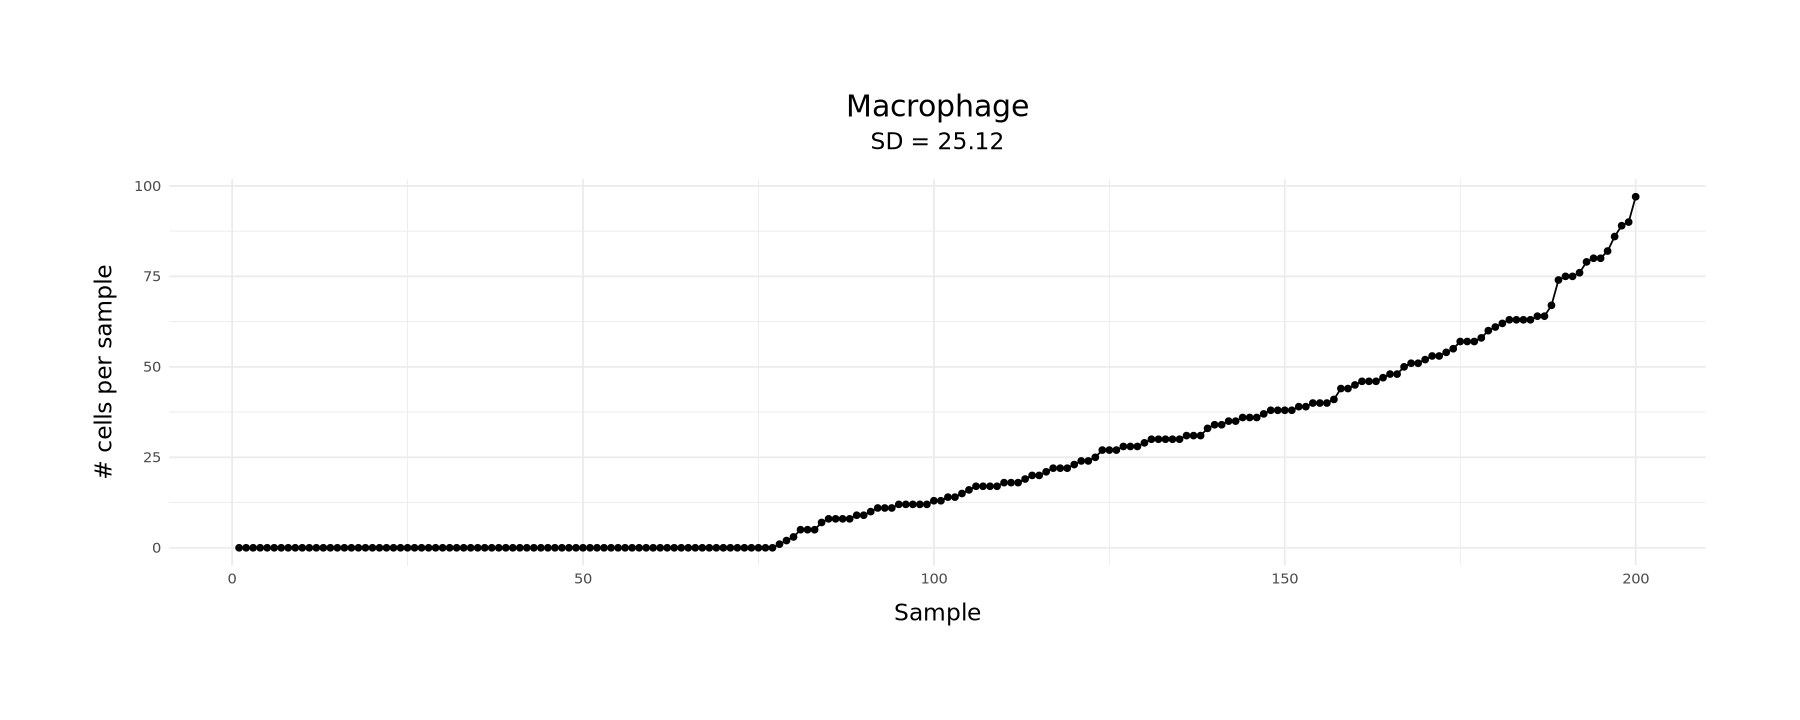

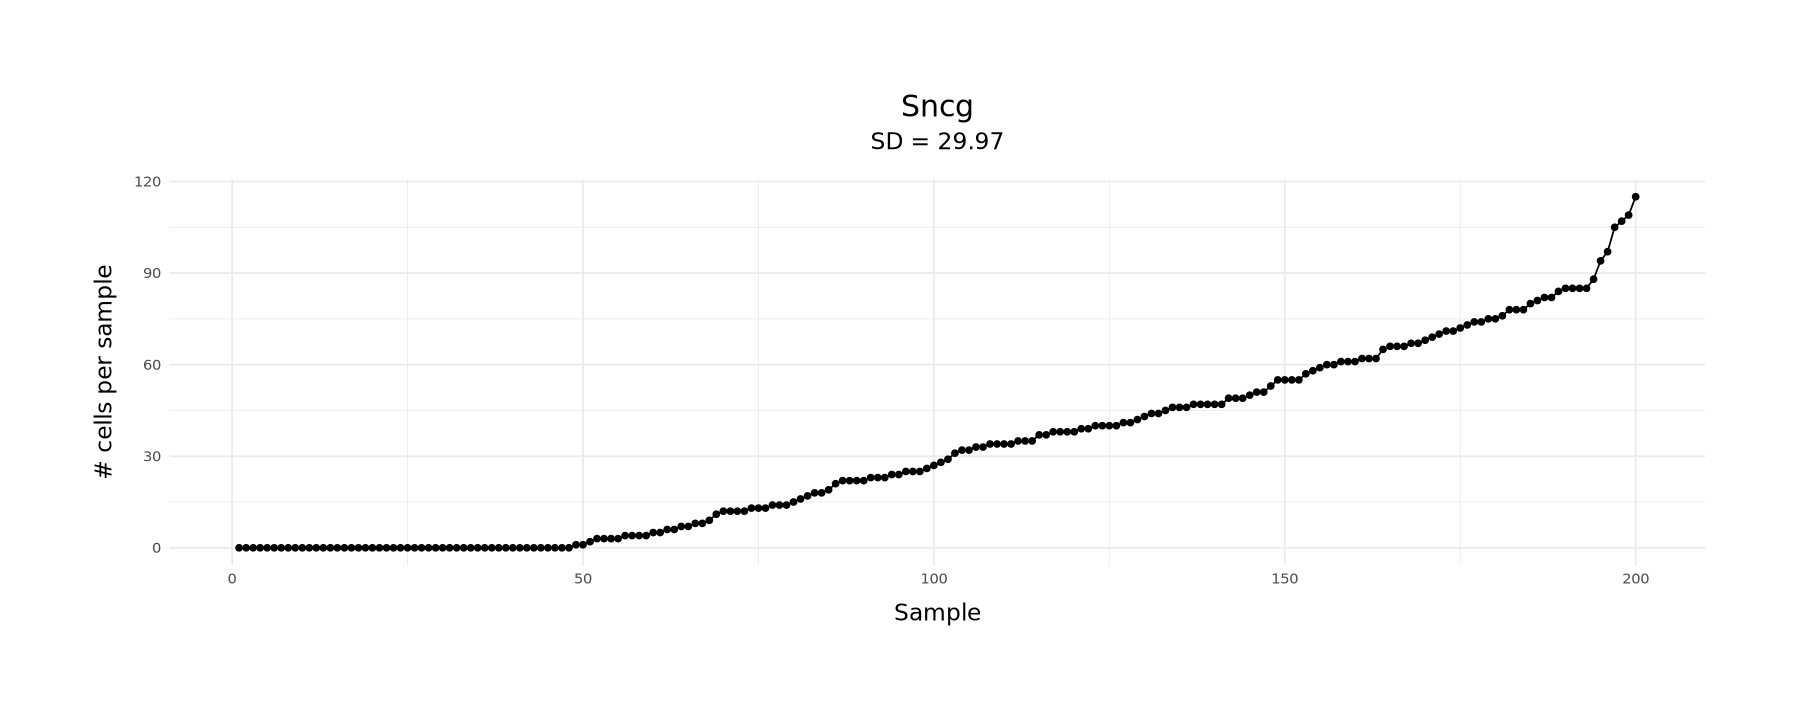

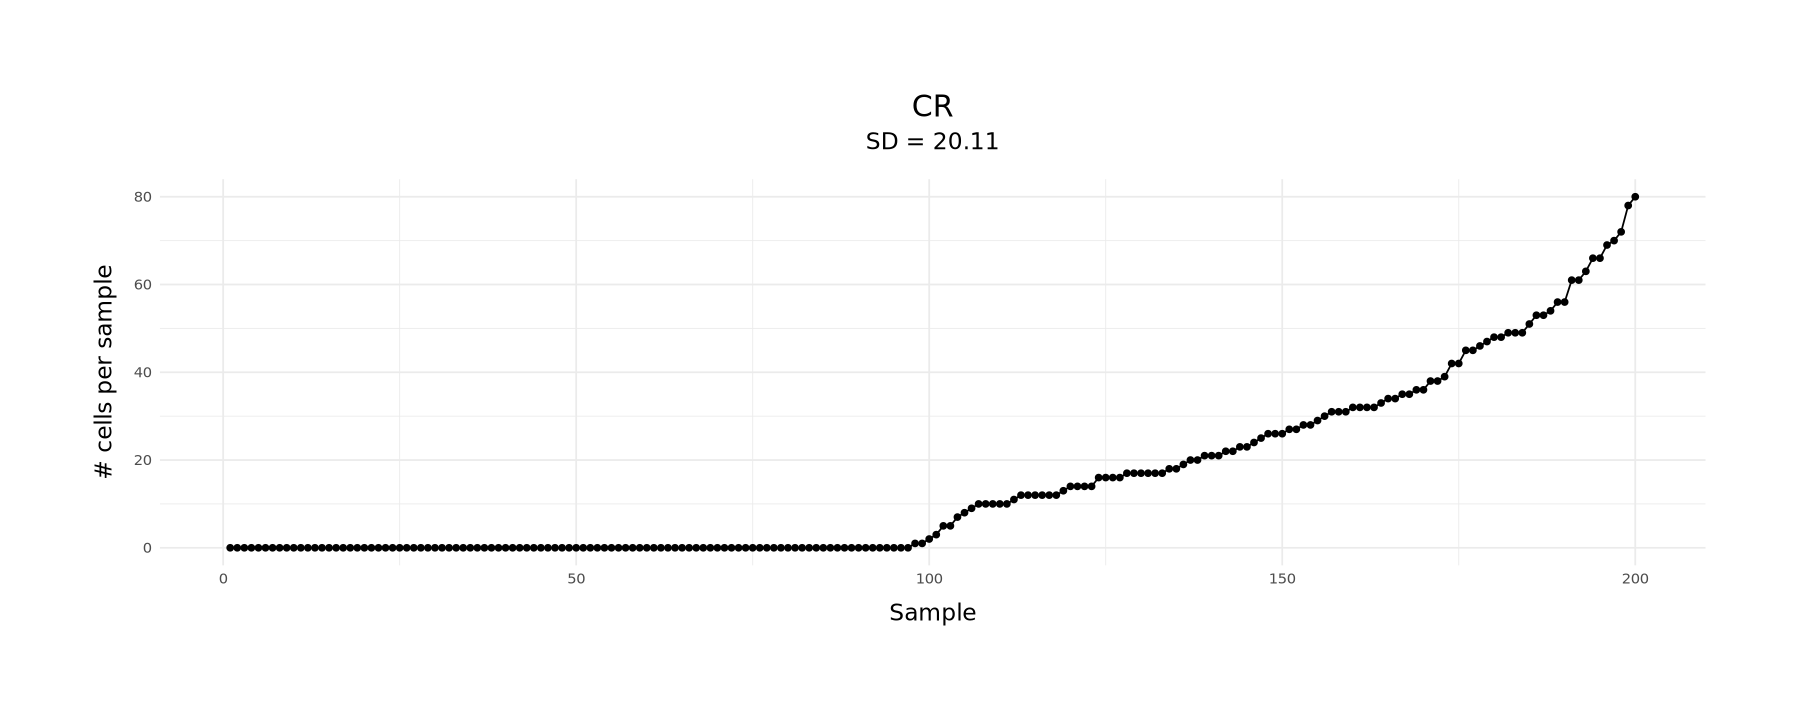

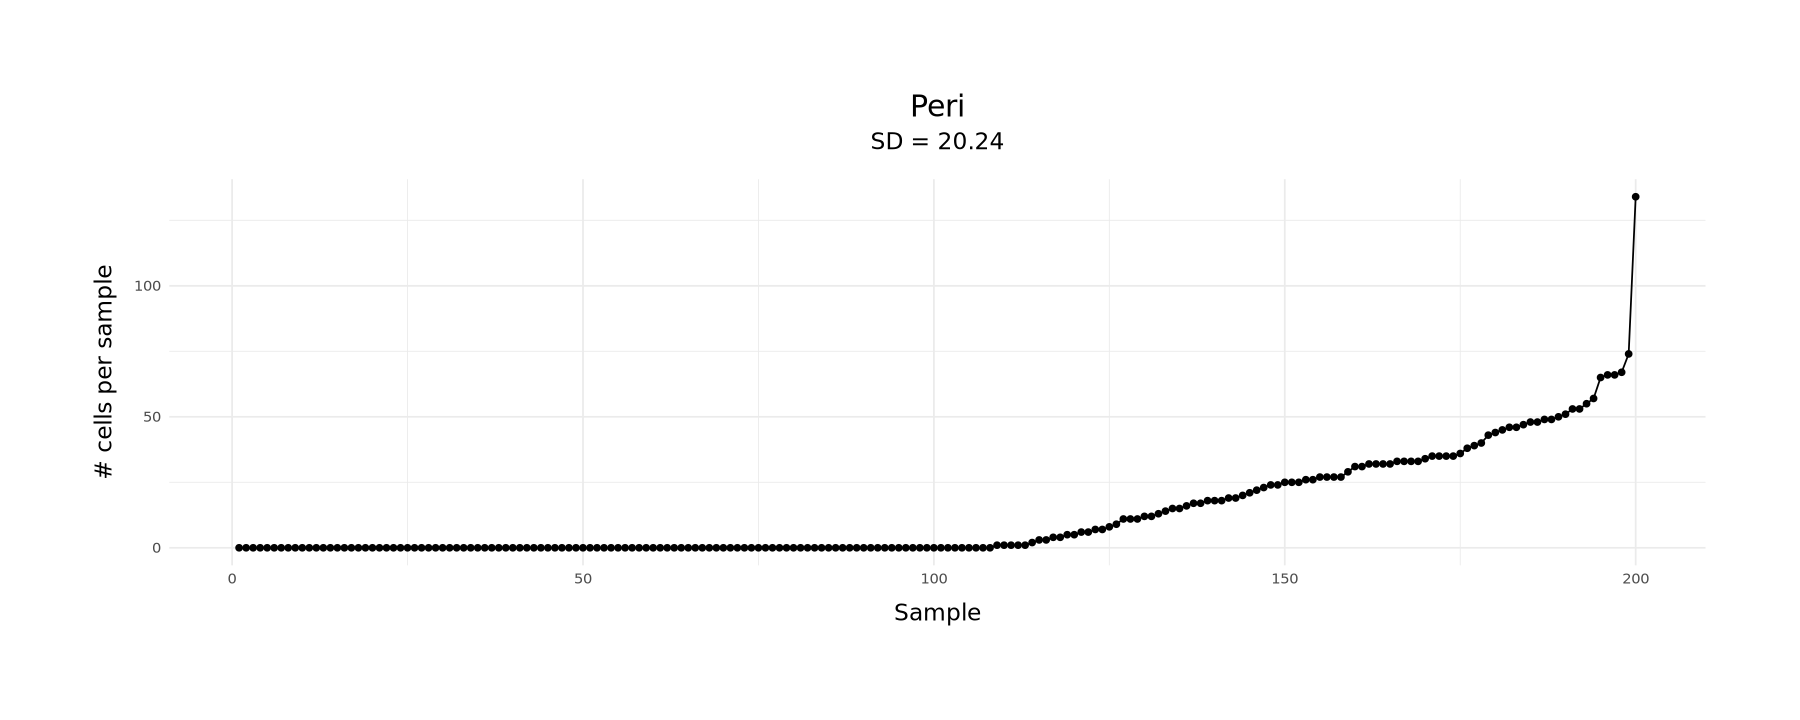

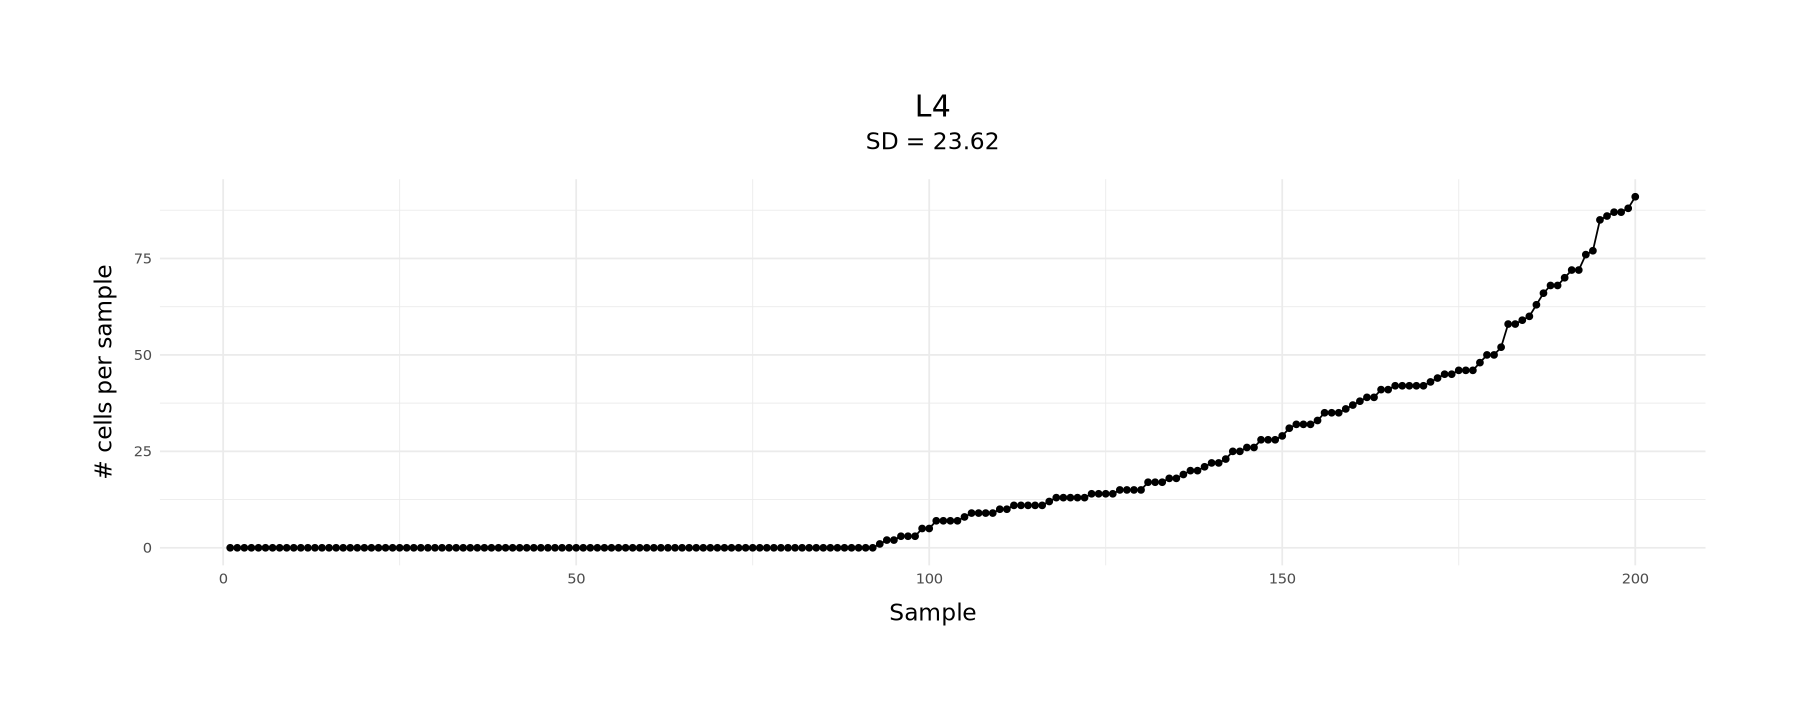

In [9]:
plot_ctype_abundance(pseudobulk_legend, top_qval_mods_df)

In [ ]:
# total_cells_per_sample <- colSums(pseudobulk_legend[,-c(1, 2)])
# ctypes <- top_qval_mods_df$Cell_type

# for (i in seq_along(ctypes)) {
#     # Get cell type proportion in each sample
#     mask <- pseudobulk_legend$Cell.type == ctypes[i]
#     n_cells_per_sample <- colSums(pseudobulk_legend[mask, -c(1, 2)])
#     hist(n_cells_per_sample, main=ctypes[i], breaks=20)

# }

# Round 4 (0% var network; PosBC module definition)

In [ ]:
network_dir <- "tasic_2018_ALM_STAR_20pcntCells_0pcntVar_200samples_log2_pseudobulk_mergeParam0.96_Modules"

pseudobulk_legend <- read.csv("data/SyntheticDatasets/SyntheticDataset1_20pcntCells_0pcntVar_200samples_legend_12-50-15.csv")
pseudobulk_legend$Cell.type <- gsub("/", "_", pseudobulk_legend$Cell.type, fixed=TRUE)
pseudobulk_legend$Cell.type <- gsub(" ", "_", pseudobulk_legend$Cell.type)

top_qval_mods_df <- read.csv("data/tasic_2018_ALM_STAR_donor_cell_type_pseudobulk_pairwise_DE_genes_dream_20pcntCells_0pcntVar_200samples_log2_pseudobulk_mergeParam0.96_PosBC_top_Qval_modules.csv")

In [ ]:
ctype_genes_list <- pairwise_ctype_genes

top_corr_mods_0pcntVar_PosBC_df <- get_top_corr_mods(network_dir, pseudobulk_legend, top_qval_mods_df, ctype_genes_list, mod_def)
top_corr_mods_0pcntVar_PosBC_df %>% arrange(Old_cor)

# Round 5 (30% var network, 0.96 mergeParam; PosBC module definition)

In [10]:
network_dir <- "tasic_2018_ALM_STAR_20pcntCells_30pcntVar_200samples_log2_pseudobulk_mergeParam0.96_Modules"

pseudobulk_legend <- read.csv("data/SyntheticDatasets/SyntheticDataset1_20pcntCells_30pcntVar_200samples_legend_10-04-30.csv")
pseudobulk_legend$Cell.type <- gsub("/", "_", pseudobulk_legend$Cell.type, fixed=TRUE)
pseudobulk_legend$Cell.type <- gsub(" ", "_", pseudobulk_legend$Cell.type)

top_qval_mods_df <- read.csv("data/tasic_2018_ALM_STAR_donor_cell_type_pseudobulk_pairwise_DE_genes_dream_20pcntCells_30pcntVar_200samples_log2_pseudobulk_mergeParam0.96_PosBC_top_Qval_modules.csv")

In [11]:
ctype_genes_list <- pairwise_ctype_genes

top_corr_mods_30pcntVar_0.96merge_PosBC_df <- get_top_corr_mods(network_dir, pseudobulk_legend, top_qval_mods_df, ctype_genes_list, mod_def)
top_corr_mods_30pcntVar_0.96merge_PosBC_df %>% arrange(Old_cor)

,Cell_type,Pseudobulk_SD,Cor,Old_cor,Pval,Old_pval,Module_genes,Old_module_genes,DE_genes,Module,Old_module,Network,Old_network,ME_path,Old_ME_path,kME_path,Old_kME_path
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
lemonchiffon21,CR,0.81,0.2529616,0.04138520,1.000000e+00,2.708937e-03,"Sgk1, Btg1, Lbh, Plxdc2, Pacs2, Kat2b, Dock10, Prkd3, Ybx1, Derl1, Hsd17b11, Numa1, NA, NA, NA","Dlx1, Tcf4, Dlx2, Nrxn3, Sox2ot, A530058N18Rik-1, Gm14204, Hnrnpa2b1, Csdc2, Tceal1, Plppr5, Scg2, Pafah1b3, Egfem1, Cntnap2","Ndnf, Trp73, Clstn2, Nhlh2, Reln, Robo2, Lhx5as1, Lhx1os, Shisal2b, Bri3, Thsd7b, Gm49027, Ankrd35, Ebf3, Pou6f2",lemonchiffon2,skyblue1,Bicor-None_signum0.215_minSize5_merge_ME_0.96_20151,Bicor-None_signum0.8_minSize3_merge_ME_0.96_20151,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_20pcntCells_30pcntVar_200samples_log2_pseudobulk_mergeParam0.96_Modules/Bicor-None_signum0.215_minSize5_merge_ME_0.96_20151/Module_eigengenes_03-31-30.csv,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_20pcntCells_30pcntVar_200samples_log2_pseudobulk_mergeParam0.96_Modules/Bicor-None_signum0.8_minSize3_merge_ME_0.96_20151/Module_eigengenes_12-51-26.csv,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_20pcntCells_30pcntVar_200samples_log2_pseudobulk_mergeParam0.96_Modules/Bicor-None_signum0.215_minSize5_merge_ME_0.96_20151/kME_table_03-31-30.csv,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_20pcntCells_30pcntVar_200samples_log2_pseudobulk_mergeParam0.96_Modules/Bicor-None_signum0.8_minSize3_merge_ME_0.96_20151/kME_table_12-51-26.csv
antiquewhite3,L4,0.80,0.2522957,0.04507628,1.000000e+00,1.000000e+00,"Wnt10a, Pkig, Ppp1r1a, Acvr1c, Kctd1, Sertad1, Gm30092, Dgkb, Igfn1, Metrnl, Zfand6, Tmed9, Aopep, Dusp19, Ccn4","Pcdh17, Gabarap, Stxbp2, Fcor, B130024G19Rik, Ndn, Cnpy2, Rcl1, Senp7, Bcap31, Ppdpf, Loricrin, Emc10, Svbp, Gm30003","Gm53058, Pttg1ip2, Gm3687, Vmn2r-ps89, Gm43984, Prox2os, NA, NA, NA, NA, NA, NA, NA, NA, NA",antiquewhite3,aliceblue,Bicor-None_signum0.363_minSize4_merge_ME_0.96_20151,Bicor-None_signum0.215_minSize10_merge_ME_0.96_20151,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_20pcntCells_30pcntVar_200samples_log2_pseudobulk_mergeParam0.96_Modules/Bicor-None_signum0.363_minSize4_merge_ME_0.96_20151/Module_eigengenes_01-17-17.csv,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_20pcntCells_30pcntVar_200samples_log2_pseudobulk_mergeParam0.96_Modules/Bicor-None_signum0.215_minSize10_merge_ME_0.96_20151/Module_eigengenes_04-22-49.csv,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_20pcntCells_30pcntVar_200samples_log2_pseudobulk_mergeParam0.96_Modules/Bicor-None_signum0.363_minSize4_merge_ME_0.96_20151/kME_table_01-17-17.csv,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_20pcntCells_30pcntVar_200samples_log2_pseudobulk_mergeParam0.96_Modules/Bicor-None_signum0.215_minSize10_merge_ME_0.96_20151/kME_table_04-22-49.csv
lemonchiffon4,Meis2,0.79,0.3005650,0.10423998,1.000000e+00,3.970026e-04,"Gm47882, Hnrnpf, Gm28901, Gm43863, Kitl, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA","Wif1, Fn3k, Mef2a, Pdhb, Gm46637, Fam114a2, Usp21, 2810461L16Rik, NA, NA, NA, NA, NA, NA, NA","2810461L16Rik, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA",lemonchiffon4,azure2,Bicor-None_signum0.629_minSize3_merge_ME_0.96_20151,Bicor-None_signum0.215_minSize5_merge_ME_0.96_20151,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_20pcntCells_30pcntVar_200samples_log2_pseudobulk_merg

In [25]:
network_dir <- "tasic_2018_ALM_STAR_25pcntCells_50SD_200samples_log2_pseudobulk_mergeParam0.96_Modules"

pseudobulk_legend <- read.csv("data/SyntheticDatasets/SyntheticDataset1_25pcntCells_50SD_200samples_legend_02-50-14.csv")
pseudobulk_legend$Cell.type <- gsub("/", "_", pseudobulk_legend$Cell.type, fixed=TRUE)
pseudobulk_legend$Cell.type <- gsub(" ", "_", pseudobulk_legend$Cell.type)

top_qval_mods_df <- read.csv("data/tasic_2018_ALM_STAR_donor_cell_type_pseudobulk_pairwise_DE_genes_dream_25pcntCells_50SD_200samples_log2_pseudobulk_mergeParam0.96_PosBC_top_Qval_modules.csv")

In [27]:
ctype_genes_list <- pairwise_ctype_genes

top_corr_mods_50SD_0.96merge_PosBC_df <- get_top_corr_mods(network_dir, pseudobulk_legend, top_qval_mods_df, ctype_genes_list, mod_def)
top_corr_mods_50SD_0.96merge_PosBC_df %>% arrange(Old_cor)

,Cell_type,Pseudobulk_SD,Cor,Old_cor,Pval,Old_pval,Module_genes,Old_module_genes,DE_genes,Module,Old_module,Network,Old_network,ME_path,Old_ME_path,kME_path,Old_kME_path
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
tan4,L5_IT,50.01,0.9578215,0.7323927,3.911416e-119,1.823842e-146,"Krt12, Tnnc1, Dkkl1, A830036E02Rik, Ovol2, Crhr1, C2cd4b, 4921539H07Rik, Fhod3, Opn3, Gm13601, Gtdc1, Ocm, Gm29674, Cnih3","Nrn1, Fars2, Lmo4, Stx1a, Glt8d2, Kcnk4, Hpca, Car10, Ovol2, Camk2n1, Gm56917, Camk4, Ak3l2-ps, Septin5, Ak4","Pacsin1, Camk4, Stx1a, Ndfip1, Tnnc1, Dkkl1, Krt12, Cnih3, Hrh3, Glt8d2, A830036E02Rik, Nrn1, Ovol2, Cdh8, Gfra2",tan4,magenta4,Bicor-None_signum0.492_minSize10_merge_ME_0.96_20151,Bicor-None_signum0.839_minSize4_merge_ME_0.96_20151,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_25pcntCells_50SD_200samples_log2_pseudobulk_mergeParam0.96_Modules/Bicor-None_signum0.492_minSize10_merge_ME_0.96_20151/Module_eigengenes_10-10-54.csv,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_25pcntCells_50SD_200samples_log2_pseudobulk_mergeParam0.96_Modules/Bicor-None_signum0.839_minSize4_merge_ME_0.96_20151/Module_eigengenes_08-42-07.csv,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_25pcntCells_50SD_200samples_log2_pseudobulk_mergeParam0.96_Modules/Bicor-None_signum0.492_minSize10_merge_ME_0.96_20151/kME_table_10-10-54.csv,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_25pcntCells_50SD_200samples_log2_pseudobulk_mergeParam0.96_Modules/Bicor-None_signum0.839_minSize4_merge_ME_0.96_20151/kME_table_08-42-07.csv
paleturquoise1,Vip,48.77,0.9241464,0.8850884,3.011977e-90,2.829916e-106,"Vip, Crh, Grpr, Asic1, Adra1b, Synpr, Pthlh, Gpd1, Sostdc1, Igsf3, Gm16537, Gm42538, Penk, Gm10605, Slc5a7","Vip, Asic4, Prox1os, Igf1, Adra1b, Ap1s2, Grpr, Prox1, Crh, Asic1, Gm37264, Vstm2l, Pcbd1, Gpd1, Synpr","Vstm2l, C1qtnf4, Tiam1, Synpr, Prox1, Plvap, Sobp, Crh, Csmd3, Penk, Tacc2, Prox1os, Vip, Asic1, Pthlh",paleturquoise1,sienna2,Bicor-None_signum0.839_minSize3_merge_ME_0.96_20151,Bicor-None_signum0.581_minSize6_merge_ME_0.96_20151,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_25pcntCells_50SD_200samples_log2_pseudobulk_mergeParam0.96_Modules/Bicor-None_signum0.839_minSize3_merge_ME_0.96_20151/Module_eigengenes_08-32-56.csv,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_25pcntCells_50SD_200samples_log2_pseudobulk_mergeParam0.96_Modules/Bicor-None_signum0.581_minSize6_merge_ME_0.96_20151/Module_eigengenes_09-10-07.csv,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_25pcntCells_50SD_200samples_log2_pseudobulk_mergeParam0.96_Modules/Bicor-None_signum0.839_minSize3_merge_ME_0.96_20151/kME_table_08-32-56.csv,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_25pcntCells_50SD_200samples_log2_pseudobulk_mergeParam0.96_Modules/Bicor-None_signum0.581_minSize6_merge_ME_0.96_20151/kME_table_09-10-07.csv
darkolivegreen2,L2_3_IT,49.17,0.9856518,0.9018178,3.971026e-75,9.225840e-112,"Myh7, Tmem215, Mhrt, Gm42864, Gm10421, Lrg1, Otof, Gm56918, Wfs1, Gm12371, Rilpl1, Mdga1, Kcnh4, Igfn1, Fst","Pdp1, Rilpl1, Frzb, Psrc1, Tsnax, Igfn1, Myh7, Wnt10a, Tmem215, Fkbp1a, Cacng3, Kcnh4, Acot5, Dclk3, Smoc2","Cacng3, ENSMUSG00000121908, Atp1a1, Rtn4rl1, Fkbp1a, Sowaha, Wnt10a, Rab40b, Fcho1, Myh7, Acot5, Frzb, B230216N24Rik, Pdp1, Ppp3ca",darkolivegreen2,thistle1,Bicor-None_signum0.581_minSize10_merge_ME_0.96_20151,Bicor-None_signum0.839_minSize5_merge_ME_0.96_20151,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tas

# Round 7 (50% network, 0.96 mergeParam; PosBC module definition)

In [8]:
network_dir <- "tasic_2018_ALM_STAR_25pcntCells_50pcntVar_200samples_log2_pseudobulk_mergeParam0.96_Modules"

pseudobulk_legend <- read.csv("data/SyntheticDatasets/SyntheticDataset1_25pcntCells_50pcntVar_200samples_legend_10-36-05.csv")
pseudobulk_legend$Cell.type <- gsub("/", "_", pseudobulk_legend$Cell.type, fixed=TRUE)
pseudobulk_legend$Cell.type <- gsub(" ", "_", pseudobulk_legend$Cell.type)

top_qval_mods_df <- read.csv("data/tasic_2018_ALM_STAR_donor_cell_type_pseudobulk_pairwise_DE_genes_dream_25pcntCells_50pcntVar_200samples_log2_pseudobulk_mergeParam0.96_PosBC_top_Qval_modules.csv")

In [9]:
ctype_genes_list <- pairwise_ctype_genes

top_corr_mods_50pcntVar_0.96merge_PosBC_df <- get_top_corr_mods(network_dir, pseudobulk_legend, top_qval_mods_df, ctype_genes_list, mod_def)
top_corr_mods_50pcntVar_0.96merge_PosBC_df %>% arrange(Old_cor)

,Cell_type,Pseudobulk_SD,Cor,Old_cor,Pval,Old_pval,Module_genes,Old_module_genes,DE_genes,Module,Old_module,Network,Old_network,ME_path,Old_ME_path,kME_path,Old_kME_path
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
hotpink1,L6b,10.62,0.5691017,-0.11667994,1.410442e-02,1.654307e-04,"Ly6g6e, Prss12, Gm15270, Tmem163, Cldnd1, Ccn2, Gsta4, 6530403H02Rik, Grb7, Drd1, Cish, Rai14, Oaz1-ps, Nxph4, Gm17041","Smarcd3, Gm37176, Gm6934, Gm37593, Ntm, Tshz3, Chpf2, Ell2, Gm37266, Adgra1, Cd44, Adcy7, Grhpr, Oprl1, Chga","Chga, Srcin1, Cplx3, Dynlrb1, Prdx5, Tmem40, Bag1, Gm50370, Pth2r, Hsd17b2, Hbq1a, Tnmd, Snorc, Fhdc1, Phyhipl",hotpink1,chocolate2,Bicor-None_signum0.586_minSize4_merge_ME_0.96_20151,Bicor-None_signum0.423_minSize8_merge_ME_0.96_20151,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_25pcntCells_50pcntVar_200samples_log2_pseudobulk_mergeParam0.96_Modules/Bicor-None_signum0.586_minSize4_merge_ME_0.96_20151/Module_eigengenes_02-01-25.csv,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_25pcntCells_50pcntVar_200samples_log2_pseudobulk_mergeParam0.96_Modules/Bicor-None_signum0.423_minSize8_merge_ME_0.96_20151/Module_eigengenes_04-28-26.csv,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_25pcntCells_50pcntVar_200samples_log2_pseudobulk_mergeParam0.96_Modules/Bicor-None_signum0.586_minSize4_merge_ME_0.96_20151/kME_table_02-01-25.csv,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_25pcntCells_50pcntVar_200samples_log2_pseudobulk_mergeParam0.96_Modules/Bicor-None_signum0.423_minSize8_merge_ME_0.96_20151/kME_table_04-28-26.csv
darkseagreen1,Sncg,11.01,0.2966742,-0.02334429,3.859821e-02,4.186847e-15,"ENSMUSG00000121783, Gpx4, Arl2, Dpm3, Psma7, Letm2, Inafm2, Trir, Cwc15, Rplp0, Phf5a, Gm49328, Snhg8, Pdcd11, Yjefn3","Ap1s2, Vip, Igf1, Prox1os, Crh, Asic4, Prox1, Tac2, Grpr, Gm17750, Adarb2, Igsf3, Gm37264, Gpd1, Asic1","Elmod1, Gng2, App, Nrxn3, Gm48283, Dlx6os1, Yjefn3, Celf6, Stk32c, Htr3a, Gm49227, Npas1, Bend4, Cadps2, Cnr1",darkseagreen1,green,Bicor-None_signum0.811_minSize3_merge_ME_0.96_20151,Bicor-None_signum0.909_minSize8_merge_ME_0.96_20151,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_25pcntCells_50pcntVar_200samples_log2_pseudobulk_mergeParam0.96_Modules/Bicor-None_signum0.811_minSize3_merge_ME_0.96_20151/Module_eigengenes_01-44-30.csv,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_25pcntCells_50pcntVar_200samples_log2_pseudobulk_mergeParam0.96_Modules/Bicor-None_signum0.909_minSize8_merge_ME_0.96_20151/Module_eigengenes_01-43-51.csv,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_25pcntCells_50pcntVar_200samples_log2_pseudobulk_mergeParam0.96_Modules/Bicor-None_signum0.811_minSize3_merge_ME_0.96_20151/kME_table_01-44-30.csv,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_25pcntCells_50pcntVar_200samples_log2_pseudobulk_mergeParam0.96_Modules/Bicor-None_signum0.909_minSize8_merge_ME_0.96_20151/kME_table_01-43-51.csv
seagreen3,CR,1.42,0.2155116,0.02626536,1.000000e+00,8.520548e-03,"Tcte1, Tmem151b, Tmem50b, Cadm4, Impa1, Dnajb1, NA, NA, NA, NA, NA, NA, NA, NA, NA","Rgs12, Gm43791, Cxcl14, Htr3a, Cnr1, Fam163a, Thsd7b, Clstn2, Tcf12, Clnk, Zbtb20, Gm44691, Eif4e3, Isoc1, Ablim1","Ndnf, Trp73, Clstn2, Nhlh2, Reln, Robo2, Lhx5as1, Lhx1os, Shisal2b, Bri3, Thsd7b, Gm49027, Ankrd35, Ebf3, Pou6f2",seagreen3,palevioletred3,Bicor-None_signum0.486_minSize4_merge_ME_0.96_20151,Bicor-None_signum0.909_minSize3_merge_ME_0.96_20151,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_

# Round 8 (50 SD network; PosBC module definition)

In [12]:
network_dir <- "tasic_2018_ALM_STAR_25pcntCells_50SD_200samples_log2_pseudobulk_Modules"

pseudobulk_legend <- read.csv("data/SyntheticDatasets/SyntheticDataset1_25pcntCells_50SD_200samples_legend_02-50-14.csv")
pseudobulk_legend$Cell.type <- gsub("/", "_", pseudobulk_legend$Cell.type, fixed=TRUE)
pseudobulk_legend$Cell.type <- gsub(" ", "_", pseudobulk_legend$Cell.type)

top_qval_mods_df <- read.csv("data/tasic_2018_ALM_STAR_donor_cell_type_pseudobulk_pairwise_DE_genes_dream_25pcntCells_50SD_200samples_log2_pseudobulk_PosBC_top_Qval_modules.csv")

In [13]:
ctype_genes_list <- pairwise_ctype_genes

top_corr_mods_50SD_PosBC_df <- get_top_corr_mods(network_dir, pseudobulk_legend, top_qval_mods_df, ctype_genes_list, mod_def)
top_corr_mods_50SD_PosBC_df %>% arrange(Old_cor)

,Cell_type,Pseudobulk_SD,Cor,Old_cor,Pval,Old_pval,Module_genes,Old_module_genes,DE_genes,Module,Old_module,Network,Old_network,ME_path,Old_ME_path,kME_path,Old_kME_path
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
mediumorchid,L5_IT,50.01,0.9578215,0.7323927,5.705797e-119,4.457929e-139,"Krt12, Tnnc1, Dkkl1, A830036E02Rik, Ovol2, Crhr1, C2cd4b, 4921539H07Rik, Fhod3, Opn3, Gm13601, Gtdc1, Ocm, Gm29674, Cnih3","Nrn1, Fars2, Lmo4, Stx1a, Glt8d2, Kcnk4, Hpca, Car10, Cpne9, Rtn4r, Inka2, Kcnv1, Epha4, Ovol2, Nptxr","Pacsin1, Camk4, Stx1a, Ndfip1, Tnnc1, Dkkl1, Krt12, Cnih3, Hrh3, Glt8d2, A830036E02Rik, Nrn1, Ovol2, Cdh8, Gfra2",mediumorchid,ivory,Bicor-None_signum0.493_minSize10_merge_ME_0.9_20151,Bicor-None_signum0.84_minSize4_merge_ME_0.9_20151,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_25pcntCells_50SD_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.493_minSize10_merge_ME_0.9_20151/Module_eigengenes_04-29-18.csv,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_25pcntCells_50SD_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.84_minSize4_merge_ME_0.9_20151/Module_eigengenes_03-18-05.csv,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_25pcntCells_50SD_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.493_minSize10_merge_ME_0.9_20151/kME_table_04-29-18.csv,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_25pcntCells_50SD_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.84_minSize4_merge_ME_0.9_20151/kME_table_03-18-05.csv
magenta4,Vip,48.77,0.9241464,0.8850884,2.947854e-92,1.939037e-108,"Vip, Crh, Grpr, Asic1, Adra1b, Synpr, Pthlh, Gpd1, Sostdc1, Igsf3, Gm16537, Gm42538, Penk, Gm10605, Slc5a7","Vip, Asic4, Prox1os, Igf1, Adra1b, Ap1s2, Grpr, Prox1, Crh, Asic1, Gm37264, Vstm2l, Pcbd1, Gpd1, Synpr","Vstm2l, C1qtnf4, Tiam1, Synpr, Prox1, Plvap, Sobp, Crh, Csmd3, Penk, Tacc2, Prox1os, Vip, Asic1, Pthlh",magenta4,skyblue2,Bicor-None_signum0.84_minSize3_merge_ME_0.9_20151,Bicor-None_signum0.584_minSize8_merge_ME_0.9_20151,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_25pcntCells_50SD_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.84_minSize3_merge_ME_0.9_20151/Module_eigengenes_03-14-24.csv,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_25pcntCells_50SD_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.584_minSize8_merge_ME_0.9_20151/Module_eigengenes_03-50-34.csv,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_25pcntCells_50SD_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.84_minSize3_merge_ME_0.9_20151/kME_table_03-14-24.csv,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_25pcntCells_50SD_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.584_minSize8_merge_ME_0.9_20151/kME_table_03-50-34.csv
plum3,Serpinf1,34.61,0.9658364,0.9054425,1.587940e-34,5.645702e-42,"Ccn3, Cxcl5, Gsto1, Nt5dc2, Clrn1, Col14a1, Calcb, Cybrd1, Dusp4, Slc9a4, Cntn4, Sp8, Larp1b, Mgat5b, Pcdh20","Gsto1, Ccn3, Col14a1, Calcb, Pcdh20, Nt5dc2, Clrn1, Necab2, Sp8, Cybrd1, Cxcl5, Mir670hg, Larp1b, Dusp4, Mgat5b","Ccn3, Sntg1, Cntn4, Necab2, Mgat5b, Cacng5, Gsto1, Pbx3, Col14a1, Mthfd1l, Nt5dc2, Dusp4, Cxcl5, Ahrr, Calcb",plum3,mediumpurple2,Bicor-None_signum0.84_minSize3_merge_ME_0.9_20151,Bicor-None_signum0.438_minSize8_merge_ME_0.9_20151,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_25pcntCells_50SD_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.84_minSize3_merge_ME_0.9_20151/Module_eigengenes_03-14-24.csv,/mnt/lareaulab/reliscu/proje

# Round 9 (100 SD network; PosBC module definition)

In [8]:
network_dir <- "tasic_2018_ALM_STAR_25pcntCells_100SD_200samples_log2_pseudobulk_Modules"

pseudobulk_legend <- read.csv("data/SyntheticDatasets/SyntheticDataset1_25pcntCells_100SD_200samples_legend_11-18-00.csv")
pseudobulk_legend$Cell.type <- gsub("/", "_", pseudobulk_legend$Cell.type, fixed=TRUE)
pseudobulk_legend$Cell.type <- gsub(" ", "_", pseudobulk_legend$Cell.type)

top_qval_mods_df <- read.csv("data/tasic_2018_ALM_STAR_donor_cell_type_pseudobulk_pairwise_DE_genes_dream_25pcntCells_100SD_200samples_log2_pseudobulk_PosBC_top_Qval_modules.csv")

In [9]:
ctype_genes_list <- pairwise_ctype_genes

top_corr_mods_50SD_PosBC_df <- get_top_corr_mods(network_dir, pseudobulk_legend, top_qval_mods_df, ctype_genes_list, mod_def)
top_corr_mods_50SD_PosBC_df %>% arrange(Old_cor)

,Cell_type,Pseudobulk_SD,Cor,Old_cor,Pval,Old_pval,Module_genes,Old_module_genes,DE_genes,Module,Old_module,Network,Old_network,ME_path,Old_ME_path,kME_path,Old_kME_path
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
mediumorchid,Sncg,63.75,0.9889079,0.6954442,3.290208e-30,1.056742e-66,"Krt73, Spx, Gldn, Gm49227, Cadps2, Sln, Slc10a4, Crabp1, Epb41l4a, Rwdd3, Slc17a8, Col25a1, Stk32c, Gm43210, Cilp2","Celf6, Gm48283, Gng2, Cnr1, Dlx1as, Nrxn3, Htr3a, Gng4, Gm48700, Rgmb, Nrip3, Egln3, Rwdd3, Npas1, Serpina12","Elmod1, Gng2, App, Nrxn3, Gm48283, Dlx6os1, Yjefn3, Celf6, Stk32c, Htr3a, Gm49227, Npas1, Bend4, Cadps2, Cnr1",mediumorchid,palevioletred2,Bicor-None_signum0.874_minSize3_merge_ME_0.9_20151,Bicor-None_signum0.585_minSize10_merge_ME_0.9_20151,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_25pcntCells_100SD_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.874_minSize3_merge_ME_0.9_20151/Module_eigengenes_12-57-21.csv,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_25pcntCells_100SD_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.585_minSize10_merge_ME_0.9_20151/Module_eigengenes_01-54-05.csv,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_25pcntCells_100SD_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.874_minSize3_merge_ME_0.9_20151/kME_table_12-57-21.csv,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_25pcntCells_100SD_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.585_minSize10_merge_ME_0.9_20151/kME_table_01-54-05.csv
skyblue3,L5_IT,100.29,0.9720033,0.9221764,3.416329e-134,7.845416e-182,"Krt12, Tnnc1, Dkkl1, Ovol2, Gm29674, C2cd4b, Grm2, Crhr1, A830036E02Rik, Gm13601, Ocm, Pstpip1, 4921539H07Rik, Gtdc1, Adra1d","Krt12, Ovol2, Grm2, Hkdc1, 4921539H07Rik, Crhr1, C2cd4b, Gm13601, Dnajc21, A830036E02Rik, Kcnk4, Cd6, Dkkl1, Tnnc1, Gm29674","Pacsin1, Camk4, Stx1a, Ndfip1, Tnnc1, Dkkl1, Krt12, Cnih3, Hrh3, Glt8d2, A830036E02Rik, Nrn1, Ovol2, Cdh8, Gfra2",skyblue3,royalblue,Bicor-None_signum0.53_minSize10_merge_ME_0.9_20151,Bicor-None_signum0.668_minSize10_merge_ME_0.9_20151,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_25pcntCells_100SD_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.53_minSize10_merge_ME_0.9_20151/Module_eigengenes_02-08-46.csv,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_25pcntCells_100SD_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.668_minSize10_merge_ME_0.9_20151/Module_eigengenes_01-30-04.csv,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_25pcntCells_100SD_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.53_minSize10_merge_ME_0.9_20151/kME_table_02-08-46.csv,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_25pcntCells_100SD_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.668_minSize10_merge_ME_0.9_20151/kME_table_01-30-04.csv
floralwhite1,Vip,97.37,0.9587049,0.9467260,1.660986e-100,7.165418e-117,"Grpr, Prox1os, Sostdc1, Gpd1, Crh, Asic4, Gm16537, Asic1, Igsf3, Calb2, Pthlh, Vip, Slc5a7, Slc18a3, Gm37264","Grpr, Prox1os, Asic4, Gpd1, Sostdc1, Crh, Asic1, Igsf3, Gm16537, Vip, Pthlh, Calb2, Gm37264, Gm42538, Ap1s2","Vstm2l, C1qtnf4, Edil3, Tiam1, Synpr, Prox1, Plvap, Sobp, Crh, Csmd3, Penk, Tacc2, Prox1os, Vip, Asic1",floralwhite,darkolivegreen,Bicor-None_signum0.488_minSize10_merge_ME_0.9_20151,Bicor-None_signum0.668_minSize10_merge_ME_0.9_20151,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_25pcntCells_100SD_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.488_minSize

In [7]:
ctype_genes_list <- pairwise_ctype_genes

top_corr_mods_50SD_PosBC_df <- get_top_corr_mods(network_dir, pseudobulk_legend, top_qval_mods_df, ctype_genes_list, mod_def)
top_corr_mods_50SD_PosBC_df %>% arrange(Old_cor)

,Cell_type,Pseudobulk_SD,Cor,Old_cor,Pval,Old_pval,Module_genes,Old_module_genes,DE_genes,Module,Old_module,Network,Old_network,ME_path,Old_ME_path,kME_path,Old_kME_path
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
mediumorchid,Sncg,63.75,0.9889079,0.6954442,3.290208e-30,1.056742e-66,"Krt73, Spx, Gldn, Gm49227, Cadps2, Sln, Slc10a4, Crabp1, Epb41l4a, Rwdd3, Slc17a8, Col25a1, Stk32c, Gm43210, Cilp2","Celf6, Gm48283, Gng2, Cnr1, Dlx1as, Nrxn3, Htr3a, Gng4, Gm48700, Rgmb, Nrip3, Egln3, Rwdd3, Npas1, Serpina12","Elmod1, Gng2, App, Nrxn3, Gm48283, Dlx6os1, Yjefn3, Celf6, Stk32c, Htr3a, Gm49227, Npas1, Bend4, Cadps2, Cnr1",mediumorchid,palevioletred2,Bicor-None_signum0.874_minSize3_merge_ME_0.9_20151,Bicor-None_signum0.585_minSize10_merge_ME_0.9_20151,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_25pcntCells_100SD_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.874_minSize3_merge_ME_0.9_20151/Module_eigengenes_12-57-21.csv,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_25pcntCells_100SD_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.585_minSize10_merge_ME_0.9_20151/Module_eigengenes_01-54-05.csv,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_25pcntCells_100SD_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.874_minSize3_merge_ME_0.9_20151/kME_table_12-57-21.csv,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_25pcntCells_100SD_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.585_minSize10_merge_ME_0.9_20151/kME_table_01-54-05.csv
skyblue3,L5_IT,100.29,0.9720033,0.9221764,3.416329e-134,7.845416e-182,"Krt12, Tnnc1, Dkkl1, Ovol2, Gm29674, C2cd4b, Grm2, Crhr1, A830036E02Rik, Gm13601, Ocm, Pstpip1, 4921539H07Rik, Gtdc1, Adra1d","Krt12, Ovol2, Grm2, Hkdc1, 4921539H07Rik, Crhr1, C2cd4b, Gm13601, Dnajc21, A830036E02Rik, Kcnk4, Cd6, Dkkl1, Tnnc1, Gm29674","Pacsin1, Camk4, Stx1a, Ndfip1, Tnnc1, Dkkl1, Krt12, Cnih3, Hrh3, Glt8d2, A830036E02Rik, Nrn1, Ovol2, Cdh8, Gfra2",skyblue3,royalblue,Bicor-None_signum0.53_minSize10_merge_ME_0.9_20151,Bicor-None_signum0.668_minSize10_merge_ME_0.9_20151,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_25pcntCells_100SD_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.53_minSize10_merge_ME_0.9_20151/Module_eigengenes_02-08-46.csv,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_25pcntCells_100SD_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.668_minSize10_merge_ME_0.9_20151/Module_eigengenes_01-30-04.csv,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_25pcntCells_100SD_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.53_minSize10_merge_ME_0.9_20151/kME_table_02-08-46.csv,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_25pcntCells_100SD_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.668_minSize10_merge_ME_0.9_20151/kME_table_01-30-04.csv
floralwhite1,Vip,97.37,0.9587049,0.9467260,1.660986e-100,7.165418e-117,"Grpr, Prox1os, Sostdc1, Gpd1, Crh, Asic4, Gm16537, Asic1, Igsf3, Calb2, Pthlh, Vip, Slc5a7, Slc18a3, Gm37264","Grpr, Prox1os, Asic4, Gpd1, Sostdc1, Crh, Asic1, Igsf3, Gm16537, Vip, Pthlh, Calb2, Gm37264, Gm42538, Ap1s2","Vstm2l, C1qtnf4, Edil3, Tiam1, Synpr, Prox1, Plvap, Sobp, Crh, Csmd3, Penk, Tacc2, Prox1os, Vip, Asic1",floralwhite,darkolivegreen,Bicor-None_signum0.488_minSize10_merge_ME_0.9_20151,Bicor-None_signum0.668_minSize10_merge_ME_0.9_20151,/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/tasic_2018_ALM_STAR_25pcntCells_100SD_200samples_log2_pseudobulk_Modules/Bicor-None_signum0.488_minSize